# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, roc_curve, auc

In [11]:
plt.rcParams['font.size'] = 20

In [12]:
%cd /content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/

/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)


# Data and function Setup

## Load data

In [13]:
brfss_2021_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2021.csv')

brfss_2021_mapped_cat['Race'] = brfss_2021_mapped_cat['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})

brfss_2019_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2019.csv')

brfss_2019_mapped_cat['Race'] = brfss_2019_mapped_cat['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})

brfss_2017_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2017.csv')

brfss_2017_mapped_cat['Race'] = brfss_2017_mapped_cat['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})

brfss_2015_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2015.csv')

brfss_2015_mapped_cat['Race'] = brfss_2015_mapped_cat['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})

brfss_2021_mapped_cat.shape, brfss_2019_mapped_cat.shape, brfss_2017_mapped_cat.shape, brfss_2015_mapped_cat.shape

((200136, 30), (210874, 30), (238130, 30), (220390, 30))

In [14]:
brfss_2021_one_hot = pd.read_csv('BRFSS 2021.csv')
brfss_2019_one_hot = pd.read_csv('BRFSS 2019.csv')
brfss_2017_one_hot = pd.read_csv('BRFSS 2017.csv')
brfss_2015_one_hot = pd.read_csv('BRFSS 2015.csv')

brfss_2021_one_hot.shape, brfss_2019_one_hot.shape, brfss_2017_one_hot.shape, brfss_2015_one_hot.shape

((200136, 49), (210874, 49), (238130, 49), (220390, 49))

In [15]:
brfss_2021_one_hot['Race'] = brfss_2021_mapped_cat['Race'] # this is added to test performance over race
brfss_2019_one_hot['Race'] = brfss_2019_mapped_cat['Race'] # this is added to test performance over race
brfss_2017_one_hot['Race'] = brfss_2017_mapped_cat['Race'] # this is added to test performance over race
brfss_2015_one_hot['Race'] = brfss_2015_mapped_cat['Race'] # this is added to test performance over race

brfss_2021_one_hot.shape, brfss_2019_one_hot.shape, brfss_2017_one_hot.shape, brfss_2015_one_hot.shape

((200136, 50), (210874, 50), (238130, 50), (220390, 50))

### Data stats base dataset

In [16]:
brfss_2021_mapped_cat.groupby(['Diabetes', 'Sex']).size()

Diabetes  Sex
0.0       1      79844
          2      89452
1.0       1      16144
          2      14696
dtype: int64

In [17]:
brfss_2021_mapped_cat.groupby(['Diabetes', 'Race']).size()

Diabetes  Race           
0.0       American Indian      2219
          Asian                3633
          Black               10551
          Hispanic            11390
          Multiracial          3142
          Native Hawaiian       598
          Other race           1198
          White              136565
1.0       American Indian       766
          Asian                 566
          Black                3257
          Hispanic             2465
          Multiracial           609
          Native Hawaiian       174
          Other race            255
          White               22748
dtype: int64

In [18]:
brfss_2021_mapped_cat.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       3      10864
          4      13290
          5      14661
          6      14466
          7      16836
          8      18155
          9      20140
          10     20422
          11     17891
          12     11257
          13     11314
1.0       3        324
          4        588
          5       1063
          6       1611
          7       2521
          8       3602
          9       4532
          10      5104
          11      5230
          12      3483
          13      2782
dtype: int64

In [36]:
brfss_2021_mapped_cat.groupby(['Diabetes']).size()

Diabetes
0.0    169296
1.0     30840
dtype: int64

In [37]:
brfss_2019_mapped_cat.groupby(['Diabetes']).size()

Diabetes
0.0    178103
1.0     32771
dtype: int64

In [39]:
brfss_2017_mapped_cat.groupby(['Diabetes']).size()

Diabetes
0.0    202117
1.0     36013
dtype: int64

In [40]:
brfss_2015_mapped_cat.groupby(['Diabetes']).size()

Diabetes
0.0    187701
1.0     32689
dtype: int64

## Performance Metrix

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, \
                            average_precision_score, accuracy_score, \
                            balanced_accuracy_score, roc_auc_score, \
                            matthews_corrcoef

def performace_metrix(y_true, y_pred, y_pred_proba):
  # Assuming you have true labels y_true and predicted labels y_pred
  # For class 0 and class 1

  #y_true, y_pred = y_test_2021, pred_test_2021_lr

  # Calculate precision, recall, and f1-score for each class
  precision_0 = precision_score(y_true, y_pred, pos_label=0)
  precision_1 = precision_score(y_true, y_pred, pos_label=1)

  recall_0 = recall_score(y_true, y_pred, pos_label=0)
  recall_1 = recall_score(y_true, y_pred, pos_label=1)

  f1_0 = f1_score(y_true, y_pred, pos_label=0)
  f1_1 = f1_score(y_true, y_pred, pos_label=1)

  # Calculate Area Under the Precision-Recall Curve for each class
  ap_0 = average_precision_score(y_true, y_pred_proba, pos_label=0)
  ap_1 = average_precision_score(y_true, y_pred_proba, pos_label=1)

  # Calculate overall accuracy
  accuracy = accuracy_score(y_true, y_pred)

  # Calculate balanced accuracy
  balanced_accuracy = balanced_accuracy_score(y_true, y_pred)

  # Calculate Area Under the ROC Curve
  roc_auc = roc_auc_score(y_true, y_pred_proba)

  # Calculate Matthews Correlation Coefficient (MCC)
  mcc = matthews_corrcoef(y_true, y_pred)

  # Print the calculated metrics
  print("Class 1 Recall:", recall_1)
  print("Class 1 Precision:", precision_1)
  print("Class 1 Area Under Precision-Recall Curve:", ap_1)
  print("Class 1 F1-Score:", f1_1)


  print("Class 0 Recall:", recall_0)
  print("Class 0 Precision:", precision_0)
  print("Class 0 Area Under Precision-Recall Curve:", ap_0)
  print("Class 0 F1-Score:", f1_0)

  print("Overall Accuracy:", accuracy)
  print("Balanced Accuracy:", balanced_accuracy)
  print("Area Under ROC Curve:", roc_auc)
  print("Matthews Correlation Coefficient:", mcc)


  # Print the calculated metrics
  print(recall_1)
  print(precision_1)
  print(ap_1)
  print(f1_1)

  print(recall_0)
  print(precision_0)
  print(ap_0)
  print(f1_0)

  print(accuracy)
  print(balanced_accuracy)
  print(roc_auc)
  print(mcc)


#### AUROC

In [20]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc


# # Calculate ROC curves and AUC for two models
# fpr_model1, tpr_model1, _ = roc_curve(y_test_2021, pred_prob_test_2021_lr)
# roc_auc_model1 = auc(fpr_model1, tpr_model1)

# fpr_model2, tpr_model2, _ = roc_curve(y_test_2021, pred_prob_test_2021_lr_balanced)
# roc_auc_model2 = auc(fpr_model2, tpr_model2)

# # Create a new figure
# plt.figure(figsize=(8, 6))

# # Plot ROC curve for Model 1
# plt.plot(fpr_model1, tpr_model1, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc_model1:.2f})')

# # Plot ROC curve for Model 2
# plt.plot(fpr_model2, tpr_model2, color='orange', lw=2, label=f'Model 2 (AUC = {roc_auc_model2:.2f})')

# # Plot the diagonal line (random guessing)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# # Set labels and title
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')

# # Show the plot
# plt.show()


## Set a test set for entire experiment (Comparison)

### 2021

In [21]:
df_train_2021, df_test_2021 = train_test_split(brfss_2021_one_hot, test_size=0.2, random_state=1)
brfss_2021_one_hot.shape, df_train_2021.shape, df_test_2021.shape

((200136, 50), (160108, 50), (40028, 50))

In [22]:
X_train_2021 = df_train_2021.drop(['Diabetes', 'Race'],axis=1)
y_train_2021 = df_train_2021['Diabetes']

X_test_2021 = df_test_2021.drop(['Diabetes', 'Race'],axis=1)
y_test_2021 = df_test_2021['Diabetes']
y_test_2021 = y_test_2021.to_numpy()

X_train_2021.shape, X_test_2021.shape

((160108, 48), (40028, 48))

#### Balanced

In [23]:
#Separate the 0(No Diabetes) and 1(Diabetes)
#Get the 1s
is1 = df_train_2021['Diabetes'] == 1
brfss_2021_1 = df_train_2021[is1]
print(brfss_2021_1.shape)

is0 = df_train_2021['Diabetes'] == 0
brfss_2021_0 = df_train_2021[is0]
print(brfss_2021_0.shape)

brfss_2021_0_rand = brfss_2021_0.take(np.random.permutation(len(brfss_2021_0))[:brfss_2021_1.shape[0]])
print(brfss_2021_0_rand.shape)

#Append the 39977 1s to the 39977 randomly selected 0s
df_train_2021_balanced = brfss_2021_0_rand.append(brfss_2021_1, ignore_index = True)

#See the classes are perfectly balanced now
print(df_train_2021_balanced.groupby(['Diabetes']).size())

X_train_2021_balanced = df_train_2021_balanced.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_balanced = df_train_2021_balanced['Diabetes']
print(X_train_2021_balanced.shape, X_test_2021.shape)

(24724, 50)
(135384, 50)
(24724, 50)
Diabetes
0.0    24724
1.0    24724
dtype: int64
(49448, 48) (40028, 48)


<ipython-input-23-e96e533d83b3>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2021_balanced = brfss_2021_0_rand.append(brfss_2021_1, ignore_index = True)


##### Data stats

In [24]:
df_train_2021_balanced.groupby(['Diabetes', 'Sex']).size()

Diabetes  Sex
0.0       1      11657
          2      13067
1.0       1      12931
          2      11793
dtype: int64

In [25]:
df_train_2021.groupby(['Diabetes', 'Sex']).size()

Diabetes  Sex
0.0       1      63913
          2      71471
1.0       1      12931
          2      11793
dtype: int64

In [26]:
df_train_2021_balanced.groupby(['Diabetes', 'Race']).size()

Diabetes  Race           
0.0       American Indian      344
          Asian                564
          Black               1531
          Hispanic            1634
          Multiracial          438
          Native Hawaiian       86
          Other race           179
          White              19948
1.0       American Indian      621
          Asian                455
          Black               2626
          Hispanic            1912
          Multiracial          489
          Native Hawaiian      132
          Other race           220
          White              18269
dtype: int64

In [27]:
df_train_2021.groupby(['Diabetes', 'Race']).size()

Diabetes  Race           
0.0       American Indian      1797
          Asian                2874
          Black                8408
          Hispanic             9092
          Multiracial          2489
          Native Hawaiian       487
          Other race            942
          White              109295
1.0       American Indian       621
          Asian                 455
          Black                2626
          Hispanic             1912
          Multiracial           489
          Native Hawaiian       132
          Other race            220
          White               18269
dtype: int64

In [28]:
df_train_2021_balanced.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       3      1535
          4      1913
          5      2147
          6      2122
          7      2400
          8      2593
          9      2956
          10     3074
          11     2675
          12     1604
          13     1705
1.0       3       259
          4       484
          5       866
          6      1292
          7      2000
          8      2873
          9      3608
          10     4144
          11     4187
          12     2769
          13     2242
dtype: int64

In [29]:
x = dict(df_train_2021_balanced.groupby(['Diabetes', 'Age']).size())
for i in x.keys():
  print(x[i])

1535
1913
2147
2122
2400
2593
2956
3074
2675
1604
1705
259
484
866
1292
2000
2873
3608
4144
4187
2769
2242


In [30]:
x = dict(df_train_2021.groupby(['Diabetes', 'Age']).size())
for i in x.keys():
  print(x[i])

8589
10687
11640
11648
13426
14523
16055
16387
14390
8949
9090
259
484
866
1292
2000
2873
3608
4144
4187
2769
2242


### 2019

In [31]:
df_train_2019, df_test_2019 = train_test_split(brfss_2019_one_hot, test_size=0.2, random_state=1)

print(brfss_2019_one_hot.shape, df_train_2019.shape, df_test_2019.shape)

X_train_2019 = df_train_2019.drop(['Diabetes', 'Race'],axis=1)
y_train_2019 = df_train_2019['Diabetes']

X_test_2019 = df_test_2019.drop(['Diabetes', 'Race'],axis=1)
y_test_2019 = df_test_2019['Diabetes']
y_test_2019 = y_test_2019.to_numpy()

print(X_train_2019.shape, X_test_2019.shape)

(210874, 50) (168699, 50) (42175, 50)
(168699, 48) (42175, 48)


#### Balanced

In [32]:
#Separate the 0(No Diabetes) and 1(Diabetes)
#Get the 1s
is1 = df_train_2019['Diabetes'] == 1
brfss_2019_1 = df_train_2019[is1]
print(brfss_2019_1.shape)

is0 = df_train_2019['Diabetes'] == 0
brfss_2019_0 = df_train_2019[is0]
print(brfss_2019_0.shape)

brfss_2019_0_rand = brfss_2019_0.take(np.random.permutation(len(brfss_2019_0))[:brfss_2019_1.shape[0]])
print(brfss_2019_0_rand.shape)

#Append the 39977 1s to the 39977 randomly selected 0s
df_train_2019_balanced = brfss_2019_0_rand.append(brfss_2019_1, ignore_index = True)

#See the classes are perfectly balanced now
print(df_train_2019_balanced.groupby(['Diabetes']).size())

X_train_2019_balanced = df_train_2019_balanced.drop(['Diabetes', 'Race'],axis=1)
y_train_2019_balanced = df_train_2019_balanced['Diabetes']
print(X_train_2019_balanced.shape, X_test_2019.shape)

(26271, 50)
(142428, 50)
(26271, 50)
Diabetes
0.0    26271
1.0    26271
dtype: int64
(52542, 48) (42175, 48)


<ipython-input-32-765f5da94b34>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2019_balanced = brfss_2019_0_rand.append(brfss_2019_1, ignore_index = True)


### 2017

In [33]:
df_train_2017, df_test_2017 = train_test_split(brfss_2017_one_hot, test_size=0.2, random_state=1)

print(brfss_2017_one_hot.shape, df_train_2017.shape, df_test_2017.shape)

X_train_2017 = df_train_2017.drop(['Diabetes', 'Race'],axis=1)
y_train_2017 = df_train_2017['Diabetes']

X_test_2017 = df_test_2017.drop(['Diabetes', 'Race'],axis=1)
y_test_2017 = df_test_2017['Diabetes']
y_test_2017 = y_test_2017.to_numpy()

print(X_train_2017.shape, X_test_2017.shape)

(238130, 50) (190504, 50) (47626, 50)
(190504, 48) (47626, 48)


### 2015

In [34]:
df_train_2015, df_test_2015 = train_test_split(brfss_2015_one_hot, test_size=0.2, random_state=1)

print(brfss_2015_one_hot.shape, df_train_2015.shape, df_test_2015.shape)

X_train_2015 = df_train_2015.drop(['Diabetes', 'Race'],axis=1)
y_train_2015 = df_train_2015['Diabetes']

X_test_2015 = df_test_2015.drop(['Diabetes', 'Race'],axis=1)
y_test_2015 = df_test_2015['Diabetes']
y_test_2015 = y_test_2015.to_numpy()

print(X_train_2015.shape, X_test_2015.shape)

(220390, 50) (176312, 50) (44078, 50)
(176312, 48) (44078, 48)


### Combine 2019, 2017, 2015

In [35]:
# Merge dataframes by columns
brfss_one_hot_2019_17_15 = pd.concat([brfss_2019_one_hot, brfss_2017_one_hot, brfss_2015_one_hot], axis=0)
df_train_2019_17_15, df_test_2019_17_15 = train_test_split(brfss_one_hot_2019_17_15, test_size=0.2, random_state=1)

print(brfss_one_hot_2019_17_15.shape, df_train_2019_17_15.shape, df_test_2019_17_15.shape)

X_train_2019_17_15 = df_train_2019_17_15.drop(['Diabetes', 'Race'],axis=1)
y_train_2019_17_15 = df_train_2019_17_15['Diabetes']

X_test_2019_17_15 = df_test_2019_17_15.drop(['Diabetes', 'Race'],axis=1)
y_test_2019_17_15 = df_test_2019_17_15['Diabetes']
y_test_2019_17_15 = y_test_2019_17_15.to_numpy()

print(X_train_2019_17_15.shape, X_test_2019_17_15.shape)

(669394, 50) (535515, 50) (133879, 50)
(535515, 48) (133879, 48)


# Experiment on BRFSS 2021

## Normal Split (Imbalanced)

###LR

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_lr = lr.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr = lr.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr))

accuracy 0.8558259218547017
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.58      0.21      0.30      6116

    accuracy                           0.86     40028
   macro avg       0.73      0.59      0.61     40028
weighted avg       0.83      0.86      0.83     40028



#### Performance analysis

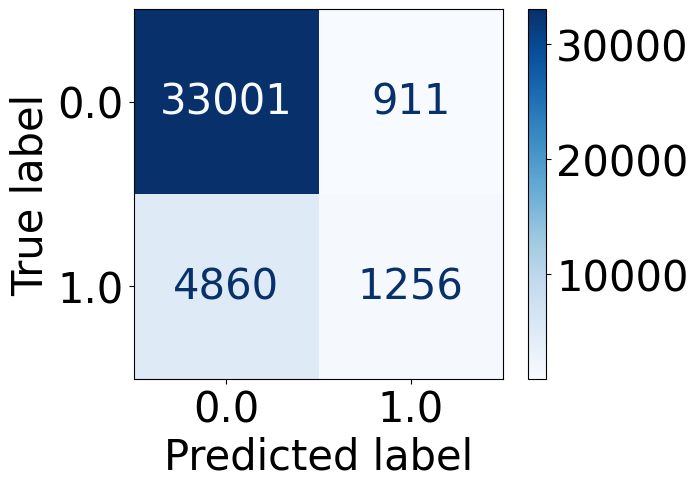

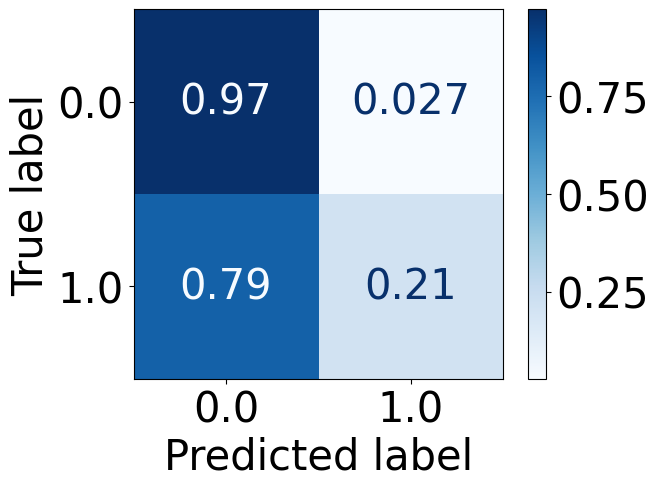

In [44]:
plt.rcParams['font.size'] = 30

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr, pred_prob_test_2021_lr)

Class 1 Recall: 0.2053629823413996
Class 1 Precision: 0.5796031379787725
Class 1 Area Under Precision-Recall Curve: 0.4507508031425717
Class 1 F1-Score: 0.3032717614390921
Class 0 Recall: 0.9731363529134229
Class 0 Precision: 0.871635720134175
Class 0 Area Under Precision-Recall Curve: 0.7152760233747096
Class 0 F1-Score: 0.9195937190865645
Overall Accuracy: 0.8558259218547017
Balanced Accuracy: 0.5892496676274113
Area Under ROC Curve: 0.8234227349832158
Matthews Correlation Coefficient: 0.283805983401172
0.2053629823413996
0.5796031379787725
0.4507508031425717
0.3032717614390921
0.9731363529134229
0.871635720134175
0.7152760233747096
0.9195937190865645
0.8558259218547017
0.5892496676274113
0.8234227349832158
0.283805983401172


#### Performance across different subgroups

In [ ]:
test = df_test_2021.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr.predict(X_test_group)
  pred_prob_test_group = lr.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.2262682850918145
Class 1 Precision: 0.5896188158961881
Class 1 Area Under Precision-Recall Curve: 0.4688966380371337
Class 1 F1-Score: 0.32703553756185333
Class 0 Recall: 0.9682380264892348
Class 0 Precision: 0.861202612919435
Class 0 Area Under Precision-Recall Curve: 0.6961844314993644
Class 0 F1-Score: 0.9115891495774481
Overall Accuracy: 0.8437108232344338
Balanced Accuracy: 0.5972531557905247
Area Under ROC Curve: 0.8152012853907421
Matthews Correlation Coefficient: 0.2961209437048069
0.2262682850918145
0.5896188158961881
0.4688966380371337
0.32703553756185333
0.9682380264892348
0.861202612919435
0.6961844314993644
0.9115891495774481
0.8437108232344338
0.5972531557905247
0.8152012853907421
0.2961209437048069
Class 1 Recall: 0.18222528418877024
Class 1 Precision: 0.5663811563169164
Class 1 Area Under Precision-Recall Curve: 0.42972769671648925
Class 1 F1-Score: 0.2757362522804274
Class 0 Recall: 0.9774762249040654
Class 0 Precision: 0.8810025062656641
Class 0 Area

In [ ]:
test = df_test_2021.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()

  pred_test_group = lr.predict(X_test_group)
  pred_prob_test_group = lr.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.17176638020690788
Class 1 Precision: 0.5758854835749679
Class 1 Area Under Precision-Recall Curve: 0.4273018031211411
Class 1 F1-Score: 0.2646091576018214
Class 0 Recall: 0.978855391371975
Class 0 Precision: 0.8760922081644351
Class 0 Area Under Precision-Recall Curve: 0.7314747708734853
Class 0 F1-Score: 0.9246272849055789
Overall Accuracy: 0.8632686337838261
Balanced Accuracy: 0.5753108857894415
Area Under ROC Curve: 0.817351274015905
Matthews Correlation Coefficient: 0.2609169995303546
0.17176638020690788
0.5758854835749679
0.4273018031211411
0.2646091576018214
0.978855391371975
0.8760922081644351
0.7314747708734853
0.9246272849055789
0.8632686337838261
0.5753108857894415
0.817351274015905
0.2609169995303546
============================  Black ============================ 
Class 1 Recall: 0.29817212490479816
Class 1 Precision: 0.5608882521489972
Class 1 Area Under Precision-Recall Curve: 0.5011123769

In [ ]:
test = df_test_2021.copy()

age_list = test.Age.unique()
age_list

array([ 7,  9, 10,  6, 11,  4,  3, 13,  5,  8, 12])

In [ ]:
test = df_test_2021.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr.predict(X_test_group)
  pred_prob_test_group = lr.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.011583011583011582
Class 1 Precision: 0.375
Class 1 Area Under Precision-Recall Curve: 0.16003257429530796
Class 1 F1-Score: 0.022471910112359553
Class 0 Recall: 0.9994178600535569
Class 0 Precision: 0.9710407239819004
Class 0 Area Under Precision-Recall Curve: 0.9305483403064778
Class 0 F1-Score: 0.9850249584026622
Overall Accuracy: 0.970501808318264
Balanced Accuracy: 0.5055004358182843
Area Under ROC Curve: 0.8092920773675228
Matthews Correlation Coefficient: 0.061698862109038154
0.011583011583011582
0.375
0.16003257429530796
0.022471910112359553
0.9994178600535569
0.9710407239819004
0.9305483403064778
0.9850249584026622
0.970501808318264
0.5055004358182843
0.8092920773675228
0.061698862109038154
============================  35-39 ============================ 
Class 1 Recall: 0.049586776859504134
Class 1 Precision: 0.6486486486486487
Class 1 Area Under Precision-Recall Curve: 0.2721559865775869
Clas

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_2021 = MLPClassifier()

mlp_2021 = LogisticRegression(solver='liblinear')
mlp_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_mlp_2021 = mlp_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_mlp_2021 = mlp_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_mlp_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_mlp_2021))

accuracy 0.8558259218547017
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.58      0.21      0.30      6116

    accuracy                           0.86     40028
   macro avg       0.73      0.59      0.61     40028
weighted avg       0.83      0.86      0.83     40028



#### Performance over subgroups

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_mlp_2021, pred_prob_test_2021_mlp_2021)

Class 1 Recall: 0.2053629823413996
Class 1 Precision: 0.5796031379787725
Class 1 Area Under Precision-Recall Curve: 0.4507508031425717
Class 1 F1-Score: 0.3032717614390921
Class 0 Recall: 0.9731363529134229
Class 0 Precision: 0.871635720134175
Class 0 Area Under Precision-Recall Curve: 0.7152760233747096
Class 0 F1-Score: 0.9195937190865645
Overall Accuracy: 0.8558259218547017
Balanced Accuracy: 0.5892496676274113
Area Under ROC Curve: 0.8234227349832158
Matthews Correlation Coefficient: 0.283805983401172
0.2053629823413996
0.5796031379787725
0.4507508031425717
0.3032717614390921
0.9731363529134229
0.871635720134175
0.7152760233747096
0.9195937190865645
0.8558259218547017
0.5892496676274113
0.8234227349832158
0.283805983401172


In [ ]:
test = df_test_2021.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_2021.predict(X_test_group)
  pred_prob_test_group = mlp_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.2262682850918145
Class 1 Precision: 0.5896188158961881
Class 1 Area Under Precision-Recall Curve: 0.4688966380371337
Class 1 F1-Score: 0.32703553756185333
Class 0 Recall: 0.9682380264892348
Class 0 Precision: 0.861202612919435
Class 0 Area Under Precision-Recall Curve: 0.6961844314993644
Class 0 F1-Score: 0.9115891495774481
Overall Accuracy: 0.8437108232344338
Balanced Accuracy: 0.5972531557905247
Area Under ROC Curve: 0.8152012853907421
Matthews Correlation Coefficient: 0.2961209437048069
0.2262682850918145
0.5896188158961881
0.4688966380371337
0.32703553756185333
0.9682380264892348
0.861202612919435
0.6961844314993644
0.9115891495774481
0.8437108232344338
0.5972531557905247
0.8152012853907421
0.2961209437048069
Class 1 Recall: 0.18222528418877024
Class 1 Precision: 0.5663811563169164
Class 1 Area Under Precision-Recall Curve: 0.42972769671648925
Class 1 F1-Score: 0.2757362522804274
Class 0 Recall: 0.9774762249040654
Class 0 Precision: 0.8810025062656641
Class 0 Area

In [ ]:
test = df_test_2021.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_2021.predict(X_test_group)
  pred_prob_test_group = mlp_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.17347622237106497
Class 1 Precision: 0.5679824561403509
Class 1 Area Under Precision-Recall Curve: 0.42384376035060567
Class 1 F1-Score: 0.2657773217034377
Class 0 Recall: 0.9783278327832783
Class 0 Precision: 0.8781475264145354
Class 0 Area Under Precision-Recall Curve: 0.7338691997569736
Class 0 F1-Score: 0.9255346828329083
Overall Accuracy: 0.8647831427761504
Balanced Accuracy: 0.5759020275771716
Area Under ROC Curve: 0.8211371274807022
Matthews Correlation Coefficient: 0.26023900644939485
0.17347622237106497
0.5679824561403509
0.42384376035060567
0.2657773217034377
0.9783278327832783
0.8781475264145354
0.7338691997569736
0.9255346828329083
0.8647831427761504
0.5759020275771716
0.8211371274807022
0.26023900644939485
============================  Black ============================ 
Class 1 Recall: 0.3613312202852615
Class 1 Precision: 0.6162162162162163
Class 1 Area Under Precision-Recall Curve: 0.544

In [ ]:
test = df_test_2021.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_2021.predict(X_test_group)
  pred_prob_test_group = mlp_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.046153846153846156
Class 1 Precision: 0.6
Class 1 Area Under Precision-Recall Curve: 0.2010764493206778
Class 1 F1-Score: 0.08571428571428573
Class 0 Recall: 0.9991208791208791
Class 0 Precision: 0.9734475374732334
Class 0 Area Under Precision-Recall Curve: 0.9307796442274693
Class 0 F1-Score: 0.9861171366594361
Overall Accuracy: 0.9726495726495726
Balanced Accuracy: 0.5226373626373626
Area Under ROC Curve: 0.8297886728655959
Matthews Correlation Coefficient: 0.16112938812820077
0.046153846153846156
0.6
0.2010764493206778
0.08571428571428573
0.9991208791208791
0.9734475374732334
0.9307796442274693
0.9861171366594361
0.9726495726495726
0.5226373626373626
0.8297886728655959
0.16112938812820077
============================  35-39 ============================ 
Class 1 Recall: 0.019230769230769232
Class 1 Precision: 0.25
Class 1 Area Under Precision-Recall Curve: 0.19607273793436025
Class 1 F1-Score: 0.03571

## Undersampling - Balanced Diabetes

### Train and test

In [45]:
#Separate the 0(No Diabetes) and 1(Diabetes)
#Get the 1s
is1 = df_train_2021['Diabetes'] == 1
brfss_2021_1 = df_train_2021[is1]
print(brfss_2021_1.shape)

is0 = df_train_2021['Diabetes'] == 0
brfss_2021_0 = df_train_2021[is0]
print(brfss_2021_0.shape)

brfss_2021_0_rand = brfss_2021_0.take(np.random.permutation(len(brfss_2021_0))[:brfss_2021_1.shape[0]])
print(brfss_2021_0_rand.shape)

#Append the 39977 1s to the 39977 randomly selected 0s
df_train_2021_balanced = brfss_2021_0_rand.append(brfss_2021_1, ignore_index = True)

#See the classes are perfectly balanced now
df_train_2021_balanced.groupby(['Diabetes']).size()


(24724, 50)
(135384, 50)
(24724, 50)


<ipython-input-45-363c6ba69832>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2021_balanced = brfss_2021_0_rand.append(brfss_2021_1, ignore_index = True)


Diabetes
0.0    24724
1.0    24724
dtype: int64

In [46]:
X_train_2021_balanced = df_train_2021_balanced.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_balanced = df_train_2021_balanced['Diabetes']
X_train_2021_balanced.shape, X_test_2021.shape

((49448, 48), (40028, 48))

In [47]:
from sklearn.linear_model import LogisticRegression

lr_balanced = LogisticRegression(solver='liblinear')
lr_balanced.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_lr_balanced = lr_balanced.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_balanced = lr_balanced.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_balanced))

accuracy 0.7335864894573798
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     33912
         1.0       0.34      0.76      0.47      6116

    accuracy                           0.73     40028
   macro avg       0.64      0.75      0.64     40028
weighted avg       0.85      0.73      0.77     40028



In [ ]:
conf_matrix = confusion_matrix(y_test_2021, pred_test_2021_lr_balanced)
conf_matrix

array([[24696,  9216],
       [ 1454,  4662]])

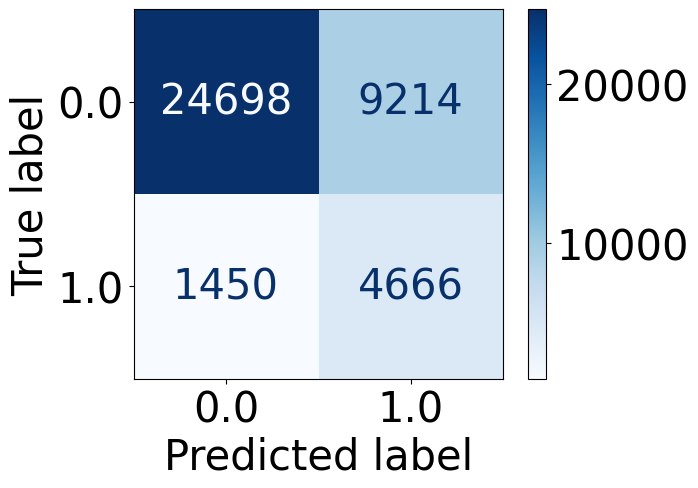

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
# Calculate AUROC
auroc = roc_auc_score(y_test_2021, pred_prob_test_2021_lr_balanced)

print("AUROC:", auroc)

AUROC: 0.8234555016669929


### Performance over subgroups

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_balanced, pred_prob_test_2021_lr_balanced)

Class 1 Recall: 0.7656965336821452
Class 1 Precision: 0.33481089583184387
Class 1 Area Under Precision-Recall Curve: 0.4485605673065076
Class 1 F1-Score: 0.4659006118489777
Class 0 Recall: 0.7256428402925218
Class 0 Precision: 0.9449713912676164
Class 0 Area Under Precision-Recall Curve: 0.7155259651861691
Class 0 F1-Score: 0.8209097126082098
Overall Accuracy: 0.7317627660637553
Balanced Accuracy: 0.7456696869873335
Area Under ROC Curve: 0.8234555016669929
Matthews Correlation Coefficient: 0.37076684559524653
0.7656965336821452
0.33481089583184387
0.4485605673065076
0.4659006118489777
0.7256428402925218
0.9449713912676164
0.7155259651861691
0.8209097126082098
0.7317627660637553
0.7456696869873335
0.8234555016669929
0.37076684559524653


In [ ]:
test = df_train_2021_balanced.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced.predict(X_test_group)
  pred_prob_test_group = lr_balanced.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.7780527414739773
Class 1 Precision: 0.7371776084407972
Class 1 Area Under Precision-Recall Curve: 0.8068363141176736
Class 1 F1-Score: 0.757063847398322
Class 0 Recall: 0.69096235030585
Class 0 Precision: 0.736455463728191
Class 0 Area Under Precision-Recall Curve: 0.317509758391401
Class 0 F1-Score: 0.7129839534160112
Overall Accuracy: 0.7368571195696471
Balanced Accuracy: 0.7345075458899136
Area Under ROC Curve: 0.8113800191121179
Matthews Correlation Coefficient: 0.4713184261338607
0.7780527414739773
0.7371776084407972
0.8068363141176736
0.757063847398322
0.69096235030585
0.736455463728191
0.317509758391401
0.7129839534160112
0.7368571195696471
0.7345075458899136
0.8113800191121179
0.4713184261338607
Class 1 Recall: 0.7401848554227084
Class 1 Precision: 0.7314395843807608
Class 1 Area Under Precision-Recall Curve: 0.7847475529005412
Class 1 F1-Score: 0.7357862350908249
Class 0 Recall: 0.7556605931234276
Class 0 Precision: 0.7638717632552404
Class 0 Area Under Preci

In [ ]:
test = df_test_2021.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced.predict(X_test_group)
  pred_prob_test_group = lr_balanced.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.7868036103330222
Class 1 Precision: 0.33860166086257704
Class 1 Area Under Precision-Recall Curve: 0.4672753971514427
Class 1 F1-Score: 0.47345257046539946
Class 0 Recall: 0.6900382901261691
Class 0 Precision: 0.9413426956670663
Class 0 Area Under Precision-Recall Curve: 0.6963976724240295
Class 0 F1-Score: 0.7963345285957477
Overall Accuracy: 0.7062787296280819
Balanced Accuracy: 0.7384209502295956
Area Under ROC Curve: 0.8153479261825181
Matthews Correlation Coefficient: 0.3653617371734765
0.7868036103330222
0.33860166086257704
0.4672753971514427
0.47345257046539946
0.6900382901261691
0.9413426956670663
0.6963976724240295
0.7963345285957477
0.7062787296280819
0.7384209502295956
0.8153479261825181
0.3653617371734765
Class 1 Recall: 0.7344126765415088
Class 1 Precision: 0.33131313131313134
Class 1 Area Under Precision-Recall Curve: 0.4272006897611026
Class 1 F1-Score: 0.45662882844292146
Class 0 Recall: 0.760691841388132
Class 0 Precision: 0.9466399058758391
Class 0 A

In [ ]:
test = df_train_2021_balanced.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced.predict(X_test_group)
  pred_prob_test_group = lr_balanced.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7378619519404456
Class 1 Precision: 0.7241471931238249
Class 1 Area Under Precision-Recall Curve: 0.7834080361504454
Class 1 F1-Score: 0.7309402450927232
Class 0 Recall: 0.7423869964380675
Class 0 Precision: 0.7555010976668198
Class 0 Area Under Precision-Recall Curve: 0.35653092424915805
Class 0 F1-Score: 0.7488866396761132
Overall Accuracy: 0.7402230249725146
Balanced Accuracy: 0.7401244741892565
Area Under ROC Curve: 0.8197285156739307
Matthews Correlation Coefficient: 0.4799485256189025
0.7378619519404456
0.7241471931238249
0.7834080361504454
0.7309402450927232
0.7423869964380675
0.7555010976668198
0.35653092424915805
0.7488866396761132
0.7402230249725146
0.7401244741892565
0.8197285156739307
0.4799485256189025
============================  Black ============================ 
Class 1 Recall: 0.8575780654988576
Class 1 Precision: 0.7649456521739131
Class 1 Area Under Precision-Recall Curve: 0.8278799

In [ ]:
test = df_test_2021.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced.predict(X_test_group)
  pred_prob_test_group = lr_balanced.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7378879214110292
Class 1 Precision: 0.32134175984443364
Class 1 Area Under Precision-Recall Curve: 0.42165305623264315
Class 1 F1-Score: 0.447710647520997
Class 0 Recall: 0.744041070773744
Class 0 Precision: 0.945303764442788
Class 0 Area Under Precision-Recall Curve: 0.7342041024729863
Class 0 F1-Score: 0.832683547420692
Overall Accuracy: 0.7431730133232543
Balanced Accuracy: 0.7409644960923867
Area Under ROC Curve: 0.8209178750724667
Matthews Correlation Coefficient: 0.35847483703925603
0.7378879214110292
0.32134175984443364
0.42165305623264315
0.447710647520997
0.744041070773744
0.945303764442788
0.7342041024729863
0.832683547420692
0.7431730133232543
0.7409644960923867
0.8209178750724667
0.35847483703925603
============================  Black ============================ 
Class 1 Recall: 0.866877971473851
Class 1 Precision: 0.3658862876254181
Class 1 Area Under Precision-Recall Curve: 0.543964970730

In [ ]:
test = df_train_2021_balanced.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced.predict(X_test_group)
  pred_prob_test_group = lr_balanced.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.305019305019305
Class 1 Precision: 0.5563380281690141
Class 1 Area Under Precision-Recall Curve: 0.44894440323894685
Class 1 F1-Score: 0.39401496259351626
Class 0 Recall: 0.9618413082980012
Class 0 Precision: 0.8981900452488688
Class 0 Area Under Precision-Recall Curve: 0.739771623266396
Class 0 F1-Score: 0.9289265867212635
Overall Accuracy: 0.8727748691099476
Balanced Accuracy: 0.6334303066586531
Area Under ROC Curve: 0.8142882867292317
Matthews Correlation Coefficient: 0.34827523661930054
0.305019305019305
0.5563380281690141
0.44894440323894685
0.39401496259351626
0.9618413082980012
0.8981900452488688
0.739771623266396
0.9289265867212635
0.8727748691099476
0.6334303066586531
0.8142882867292317
0.34827523661930054
============================  35-39 ============================ 
Class 1 Recall: 0.44214876033057854
Class 1 Precision: 0.6524390243902439
Class 1 Area Under Precision-Recall Curve: 0.620607

In [ ]:
test = df_test_2021.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced.predict(X_test_group)
  pred_prob_test_group = lr_balanced.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.3230769230769231
Class 1 Precision: 0.1640625
Class 1 Area Under Precision-Recall Curve: 0.19624989343640553
Class 1 F1-Score: 0.21761658031088085
Class 0 Recall: 0.952967032967033
Class 0 Precision: 0.9801084990958409
Class 0 Area Under Precision-Recall Curve: 0.9313565085498097
Class 0 F1-Score: 0.9663472253175841
Overall Accuracy: 0.9354700854700855
Balanced Accuracy: 0.638021978021978
Area Under ROC Curve: 0.8272392223161454
Matthews Correlation Coefficient: 0.19949319020263706
0.3230769230769231
0.1640625
0.19624989343640553
0.21761658031088085
0.952967032967033
0.9801084990958409
0.9313565085498097
0.9663472253175841
0.9354700854700855
0.638021978021978
0.8272392223161454
0.19949319020263706
============================  35-39 ============================ 
Class 1 Recall: 0.47115384615384615
Class 1 Precision: 0.2076271186440678
Class 1 Area Under Precision-Recall Curve: 0.19013652320853464
Class 

### Oversampling minority subgroups
Age 3: 30-34, 4: 35-39, 5: 40-44, 6: 45-49, 7: 50-54

In [ ]:
df_train_2021_AGE_3 = df_train_2021_balanced[ (df_train_2021_balanced['Age'] == 3)]
df_train_2021_AGE_4 = df_train_2021_balanced[ (df_train_2021_balanced['Age'] == 4)]
df_train_2021_AGE_5 = df_train_2021_balanced[ (df_train_2021_balanced['Age'] == 5)]
df_train_2021_AGE_6 = df_train_2021_balanced[ (df_train_2021_balanced['Age'] == 6)]
df_train_2021_AGE_7 = df_train_2021_balanced[ (df_train_2021_balanced['Age'] == 7)]

l = [df_train_2021_AGE_3, df_train_2021_AGE_4, df_train_2021_AGE_5, df_train_2021_AGE_6, df_train_2021_AGE_7]

In [ ]:
df_train_2021_AGE_3.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       3      1527
1.0       3       259
dtype: int64

In [ ]:

from imblearn.over_sampling import RandomOverSampler
X_train = df_train_2021_AGE_3.drop(['Diabetes'], axis=1)
y_train = df_train_2021_AGE_3['Diabetes']
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
df_train_2021_AGE_3_oversampled = pd.concat([X_resampled, y_resampled], axis=1)
df_train_2021_AGE_3_oversampled.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       3      1527
1.0       3      1527
dtype: int64

In [ ]:
X_train = df_train_2021_AGE_4.drop(['Diabetes'], axis=1)
y_train = df_train_2021_AGE_4['Diabetes']
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
df_train_2021_AGE_4_oversampled = pd.concat([X_resampled, y_resampled], axis=1)
df_train_2021_AGE_4_oversampled.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       4      1955
1.0       4      1955
dtype: int64

In [ ]:
X_train = df_train_2021_AGE_5.drop(['Diabetes'], axis=1)
y_train = df_train_2021_AGE_5['Diabetes']
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
df_train_2021_AGE_5_oversampled = pd.concat([X_resampled, y_resampled], axis=1)
df_train_2021_AGE_5_oversampled.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       5      2147
1.0       5      2147
dtype: int64

In [ ]:
X_train = df_train_2021_AGE_6.drop(['Diabetes'], axis=1)
y_train = df_train_2021_AGE_6['Diabetes']
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
df_train_2021_AGE_6_oversampled = pd.concat([X_resampled, y_resampled], axis=1)
df_train_2021_AGE_6_oversampled.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       6      2134
1.0       6      2134
dtype: int64

In [ ]:
X_train = df_train_2021_AGE_7.drop(['Diabetes'], axis=1)
y_train = df_train_2021_AGE_7['Diabetes']
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
df_train_2021_AGE_7_oversampled = pd.concat([X_resampled, y_resampled], axis=1)
df_train_2021_AGE_7_oversampled.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       7      2487
1.0       7      2487
dtype: int64

In [ ]:
df_train_2021_bal_over_minority = df_train_2021_balanced.copy()
for i in range(3, 8):
  df_train_2021_bal_over_minority = df_train_2021_bal_over_minority[df_train_2021_balanced.Age != i]

<ipython-input-101-c565a282382a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_2021_bal_over_minority = df_train_2021_bal_over_minority[df_train_2021_balanced.Age != i]


In [ ]:
df_train_2021_bal_over_minority.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       8      2632
          9      2948
          10     2874
          11     2635
          12     1682
          13     1703
1.0       8      2873
          9      3608
          10     4144
          11     4187
          12     2769
          13     2242
dtype: int64

In [ ]:
df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_3_oversampled, ignore_index = True)
df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_4_oversampled, ignore_index = True)
df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_5_oversampled, ignore_index = True)
df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_6_oversampled, ignore_index = True)
df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_7_oversampled, ignore_index = True)

<ipython-input-103-6499e13b57f1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_3_oversampled, ignore_index = True)
<ipython-input-103-6499e13b57f1>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_4_oversampled, ignore_index = True)
<ipython-input-103-6499e13b57f1>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2021_bal_over_minority = df_train_2021_bal_over_minority.append(df_train_2021_AGE_5_oversampled, ignore_index = True)
<ipython-input-103-6499e13b57f1>:4: FutureWarning: The frame.append method is deprecated and will be remov

In [ ]:
df_train_2021_bal_over_minority.groupby(['Diabetes', 'Age']).size()

Diabetes  Age
0.0       3      1527
          4      1955
          5      2147
          6      2134
          7      2487
          8      2632
          9      2948
          10     2874
          11     2635
          12     1682
          13     1703
1.0       3      1527
          4      1955
          5      2147
          6      2134
          7      2487
          8      2873
          9      3608
          10     4144
          11     4187
          12     2769
          13     2242
dtype: int64

### Train and test balanced - oversampled minority group

In [ ]:
X_train_2021_balanced_over_minority = df_train_2021_bal_over_minority.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_balanced_over_minority = df_train_2021_bal_over_minority['Diabetes']

#### LR

accuracy 0.6863445588088338
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     33912
         1.0       0.30      0.80      0.44      6116

    accuracy                           0.69     40028
   macro avg       0.62      0.73      0.61     40028
weighted avg       0.85      0.69      0.73     40028



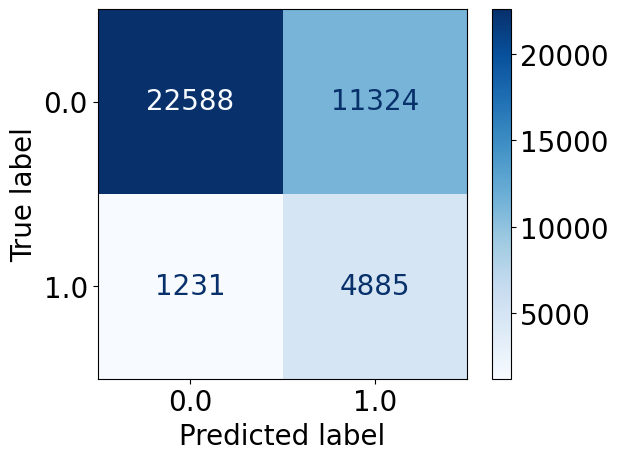

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_balanced_over_minority = LogisticRegression(solver='liblinear')
lr_balanced_over_minority.fit(X_train_2021_balanced_over_minority, y_train_2021_balanced_over_minority)

pred_prob_test_2021_lr_balanced_over_minority = lr_balanced_over_minority.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_balanced_over_minority = lr_balanced_over_minority.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_balanced_over_minority))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_balanced_over_minority))

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_balanced_over_minority,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_balanced_over_minority,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_balanced_over_minority, pred_prob_test_2021_lr_balanced_over_minority)

Class 1 Recall: 0.8001962066710269
Class 1 Precision: 0.3026218154835518
Class 1 Area Under Precision-Recall Curve: 0.4422909081382978
Class 1 F1-Score: 0.4391600861450108
Class 0 Recall: 0.6674333569238028
Class 0 Precision: 0.948775989268947
Class 0 Area Under Precision-Recall Curve: 0.7180277002573797
Class 0 F1-Score: 0.7836172275308129
Overall Accuracy: 0.6877185969821126
Balanced Accuracy: 0.7338147817974148
Area Under ROC Curve: 0.8139400152335188
Matthews Correlation Coefficient: 0.34287176279931425
0.8001962066710269
0.3026218154835518
0.4422909081382978
0.4391600861450108
0.6674333569238028
0.948775989268947
0.7180277002573797
0.7836172275308129
0.6877185969821126
0.7338147817974148
0.8139400152335188
0.34287176279931425


In [ ]:
test = df_train_2021_balanced.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = lr_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.8070528188075168
Class 1 Precision: 0.7053257637199243
Class 1 Area Under Precision-Recall Curve: 0.7906289228540045
Class 1 F1-Score: 0.7527680600137051
Class 0 Recall: 0.625783194575573
Class 0 Precision: 0.7450439403229103
Class 0 Area Under Precision-Recall Curve: 0.32379862791950087
Class 0 F1-Score: 0.6802257778607081
Overall Accuracy: 0.7211374176226507
Balanced Accuracy: 0.7164180066915449
Area Under ROC Curve: 0.7913820276123946
Matthews Correlation Coefficient: 0.44151582898739034
0.8070528188075168
0.7053257637199243
0.7906289228540045
0.7527680600137051
0.625783194575573
0.7450439403229103
0.32379862791950087
0.6802257778607081
0.7211374176226507
0.7164180066915449
0.7913820276123946
0.44151582898739034
Class 1 Recall: 0.7936063766641228
Class 1 Precision: 0.7103605313092979
Class 1 Area Under Precision-Recall Curve: 0.7906898608685067
Class 1 F1-Score: 0.7496795898750401
Class 0 Recall: 0.7081006654937658
Class 0 Precision: 0.7918056624754084
Class 0 Area

In [ ]:
test = df_test_2021.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = lr_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.8163709928415811
Class 1 Precision: 0.3071788265604872
Class 1 Area Under Precision-Recall Curve: 0.45040791595475793
Class 1 F1-Score: 0.44639210347174946
Class 0 Recall: 0.6286485468583265
Class 0 Precision: 0.9443658651579444
Class 0 Area Under Precision-Recall Curve: 0.7010752515845996
Class 0 F1-Score: 0.7548236358154959
Overall Accuracy: 0.6601546176347681
Balanced Accuracy: 0.7225097698499539
Area Under ROC Curve: 0.8012067017225292
Matthews Correlation Coefficient: 0.3345777980118997
0.8163709928415811
0.3071788265604872
0.45040791595475793
0.44639210347174946
0.6286485468583265
0.9443658651579444
0.7010752515845996
0.7548236358154959
0.6601546176347681
0.7225097698499539
0.8012067017225292
0.3345777980118997
Class 1 Recall: 0.7791939373062349
Class 1 Precision: 0.29491525423728815
Class 1 Area Under Precision-Recall Curve: 0.4276614612614782
Class 1 F1-Score: 0.42788234181405466
Class 0 Recall: 0.699238084644903
Class 0 Precision: 0.951490843045255
Class 0 Ar

In [ ]:
test = df_train_2021_balanced.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = lr_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7739339865345668
Class 1 Precision: 0.7017569982132221
Class 1 Area Under Precision-Recall Curve: 0.7802139184642833
Class 1 F1-Score: 0.7360803810812923
Class 0 Recall: 0.6986005918643727
Class 0 Precision: 0.7712925019381991
Class 0 Area Under Precision-Recall Curve: 0.35852199450003686
Class 0 F1-Score: 0.7331490985656007
Overall Accuracy: 0.7346228341098257
Balanced Accuracy: 0.7362672891994697
Area Under ROC Curve: 0.8118686141712039
Matthews Correlation Coefficient: 0.4727919691744784
0.7739339865345668
0.7017569982132221
0.7802139184642833
0.7360803810812923
0.6986005918643727
0.7712925019381991
0.35852199450003686
0.7331490985656007
0.7346228341098257
0.7362672891994697
0.8118686141712039
0.4727919691744784
============================  Black ============================ 
Class 1 Recall: 0.900990099009901
Class 1 Precision: 0.7444933920704846
Class 1 Area Under Precision-Recall Curve: 0.83926796

In [ ]:
test = df_test_2021.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = lr_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7722705961152043
Class 1 Precision: 0.295312900196363
Class 1 Area Under Precision-Recall Curve: 0.41764422184089
Class 1 F1-Score: 0.42724802371541504
Class 0 Recall: 0.6973230656398973
Class 0 Precision: 0.9490916350568975
Class 0 Area Under Precision-Recall Curve: 0.7359020827568052
Class 0 F1-Score: 0.8039572147296326
Overall Accuracy: 0.7078963116948566
Balanced Accuracy: 0.7347968308775508
Area Under ROC Curve: 0.8134866757495129
Matthews Correlation Coefficient: 0.3387784241346141
0.7722705961152043
0.295312900196363
0.41764422184089
0.42724802371541504
0.6973230656398973
0.9490916350568975
0.7359020827568052
0.8039572147296326
0.7078963116948566
0.7347968308775508
0.8134866757495129
0.3387784241346141
============================  Black ============================ 
Class 1 Recall: 0.8811410459587956
Class 1 Precision: 0.31899024670109005
Class 1 Area Under Precision-Recall Curve: 0.519673113709

In [ ]:
test = df_train_2021_balanced.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = lr_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.6911196911196911
Class 1 Precision: 0.3675564681724846
Class 1 Area Under Precision-Recall Curve: 0.4724315698648164
Class 1 F1-Score: 0.4798927613941019
Class 0 Recall: 0.8010335917312662
Class 0 Precision: 0.9393939393939394
Class 0 Area Under Precision-Recall Curve: 0.7281711330924077
Class 0 F1-Score: 0.8647140864714088
Overall Accuracy: 0.7852794687327062
Balanced Accuracy: 0.7460766414254787
Area Under ROC Curve: 0.8115241487334511
Matthews Correlation Coefficient: 0.38867293545634857
0.6911196911196911
0.3675564681724846
0.4724315698648164
0.4798927613941019
0.8010335917312662
0.9393939393939394
0.7281711330924077
0.8647140864714088
0.7852794687327062
0.7460766414254787
0.8115241487334511
0.38867293545634857
============================  35-39 ============================ 
Class 1 Recall: 0.78099173553719
Class 1 Precision: 0.45652173913043476
Class 1 Area Under Precision-Recall Curve: 0.60014849

In [ ]:
test = df_test_2021.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = lr_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.7076923076923077
Class 1 Precision: 0.08745247148288973
Class 1 Area Under Precision-Recall Curve: 0.19476988578654653
Class 1 F1-Score: 0.155668358714044
Class 0 Recall: 0.789010989010989
Class 0 Precision: 0.9895259095920618
Class 0 Area Under Precision-Recall Curve: 0.931452573425491
Class 0 F1-Score: 0.8779652726828076
Overall Accuracy: 0.7867521367521367
Balanced Accuracy: 0.7483516483516484
Area Under ROC Curve: 0.8268064243448859
Matthews Correlation Coefficient: 0.19553878299409316
0.7076923076923077
0.08745247148288973
0.19476988578654653
0.155668358714044
0.789010989010989
0.9895259095920618
0.931452573425491
0.8779652726828076
0.7867521367521367
0.7483516483516484
0.8268064243448859
0.19553878299409316
============================  35-39 ============================ 
Class 1 Recall: 0.7307692307692307
Class 1 Precision: 0.11343283582089553
Class 1 Area Under Precision-Recall Curve: 0.19133966

#### MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy 0.6814479864095133
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     33912
         1.0       0.30      0.79      0.43      6116

    accuracy                           0.68     40028
   macro avg       0.62      0.72      0.60     40028
weighted avg       0.85      0.68      0.73     40028



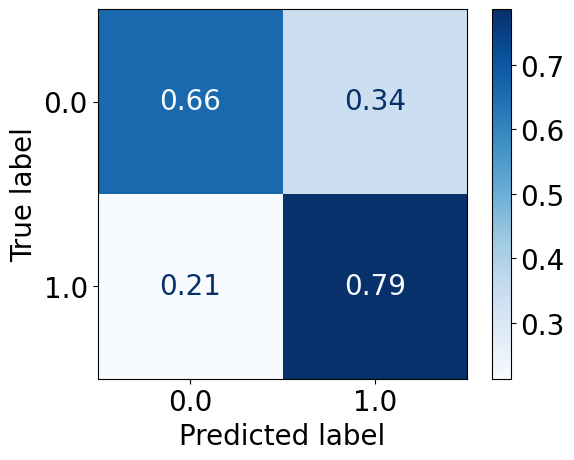

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_balanced_over_minority = MLPClassifier()
mlp_balanced_over_minority.fit(X_train_2021_balanced_over_minority, y_train_2021_balanced_over_minority)

pred_prob_test_2021_mlp_balanced_over_minority = mlp_balanced_over_minority.predict_proba(X_test_2021)[:, 1]
pred_test_2021_mlp_balanced_over_minority = mlp_balanced_over_minority.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_mlp_balanced_over_minority))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_mlp_balanced_over_minority))

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_mlp_balanced_over_minority,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_mlp_balanced_over_minority,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_mlp_balanced_over_minority, pred_prob_test_2021_mlp_balanced_over_minority)

Class 1 Recall: 0.7244931327665141
Class 1 Precision: 0.3191443388072602
Class 1 Area Under Precision-Recall Curve: 0.37139539997271664
Class 1 F1-Score: 0.4431
Class 0 Recall: 0.7212491153573957
Class 0 Precision: 0.9355492656058751
Class 0 Area Under Precision-Recall Curve: 0.7317220560356364
Class 0 F1-Score: 0.8145397628879713
Overall Accuracy: 0.7217447786549416
Balanced Accuracy: 0.7228711240619549
Area Under ROC Curve: 0.7949704630235206
Matthews Correlation Coefficient: 0.33693871818758475
0.7244931327665141
0.3191443388072602
0.37139539997271664
0.4431
0.7212491153573957
0.9355492656058751
0.7317220560356364
0.8145397628879713
0.7217447786549416
0.7228711240619549
0.7949704630235206
0.33693871818758475


In [ ]:
test = df_train_2021_balanced.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.7881061016162709
Class 1 Precision: 0.7692481884057971
Class 1 Area Under Precision-Recall Curve: 0.8485040188643206
Class 1 F1-Score: 0.778562970319722
Class 0 Recall: 0.7376190884902584
Class 0 Precision: 0.7582495147344274
Class 0 Area Under Precision-Recall Curve: 0.30889251572132226
Class 0 F1-Score: 0.7477920382858385
Overall Accuracy: 0.76417704011065
Balanced Accuracy: 0.7628625950532646
Area Under ROC Curve: 0.8464610108699654
Matthews Correlation Coefficient: 0.5266107008636951
0.7881061016162709
0.7692481884057971
0.8485040188643206
0.778562970319722
0.7376190884902584
0.7582495147344274
0.30889251572132226
0.7477920382858385
0.76417704011065
0.7628625950532646
0.8464610108699654
0.5266107008636951
Class 1 Recall: 0.7524802849147799
Class 1 Precision: 0.7773981603153745
Class 1 Area Under Precision-Recall Curve: 0.8491699835490158
Class 1 F1-Score: 0.7647362978283351
Class 0 Recall: 0.805629924271399
Class 0 Precision: 0.7829901122593116
Class 0 Area Under 

In [ ]:
test = df_test_2021.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.8073451602863367
Class 1 Precision: 0.3022957697238084
Class 1 Area Under Precision-Recall Curve: 0.3999259132024382
Class 1 F1-Score: 0.43988468712904866
Class 0 Recall: 0.6241918272550373
Class 0 Precision: 0.9413992237053868
Class 0 Area Under Precision-Recall Curve: 0.7103787751283352
Class 0 F1-Score: 0.7506605269117537
Overall Accuracy: 0.6549310488926035
Balanced Accuracy: 0.715768493770687
Area Under ROC Curve: 0.7901890081805674
Matthews Correlation Coefficient: 0.3242890737341452
0.8073451602863367
0.3022957697238084
0.3999259132024382
0.43988468712904866
0.6241918272550373
0.9413992237053868
0.7103787751283352
0.7506605269117537
0.6549310488926035
0.715768493770687
0.7901890081805674
0.3242890737341452
Class 1 Recall: 0.7630037891836031
Class 1 Precision: 0.2887122002085506
Class 1 Area Under Precision-Recall Curve: 0.36403086464310475
Class 1 F1-Score: 0.4189125295508274
Class 0 Recall: 0.6965129859295923
Class 0 Precision: 0.9479261277626401
Class 0 Area 

In [ ]:
test = df_train_2021_balanced.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7319502983195577
Class 1 Precision: 0.7632420091324201
Class 1 Area Under Precision-Recall Curve: 0.8266137588404405
Class 1 F1-Score: 0.7472687138506245
Class 0 Recall: 0.7919446255705472
Class 0 Precision: 0.7632698443391666
Class 0 Area Under Precision-Recall Curve: 0.34784341237418703
Class 0 F1-Score: 0.777342884572779
Overall Accuracy: 0.7632570800397843
Balanced Accuracy: 0.7619474619450525
Area Under ROC Curve: 0.8491319183700594
Matthews Correlation Coefficient: 0.525201758757275
0.7319502983195577
0.7632420091324201
0.8266137588404405
0.7472687138506245
0.7919446255705472
0.7632698443391666
0.34784341237418703
0.777342884572779
0.7632570800397843
0.7619474619450525
0.8491319183700594
0.525201758757275
============================  Black ============================ 
Class 1 Recall: 0.8823305407463823
Class 1 Precision: 0.7953999313422588
Class 1 Area Under Precision-Recall Curve: 0.89764031719

In [ ]:
test = df_test_2021.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

============================  White ============================ 
Class 1 Recall: 0.7649028801071668
Class 1 Precision: 0.2866945606694561
Class 1 Area Under Precision-Recall Curve: 0.3660809342979029
Class 1 F1-Score: 0.4170673808509343
Class 0 Recall: 0.6874220755408874
Class 0 Precision: 0.9468154957321077
Class 0 Area Under Precision-Recall Curve: 0.745320638937998
Class 0 F1-Score: 0.7965327497928573
Overall Accuracy: 0.698352704022174
Balanced Accuracy: 0.7261624778240271
Area Under ROC Curve: 0.7999414699228351
Matthews Correlation Coefficient: 0.32499603983004466
0.7649028801071668
0.2866945606694561
0.3660809342979029
0.4170673808509343
0.6874220755408874
0.9468154957321077
0.745320638937998
0.7965327497928573
0.698352704022174
0.7261624778240271
0.7999414699228351
0.32499603983004466
============================  Black ============================ 
Class 1 Recall: 0.8938193343898574
Class 1 Precision: 0.32582322357019067
Class 1 Area Under Precision-Recall Curve: 0.4416462861

In [ ]:
test = df_train_2021_balanced.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()

  pred_test_group = mlp_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.8841698841698842
Class 1 Precision: 0.6106666666666667
Class 1 Area Under Precision-Recall Curve: 0.8337098350482858
Class 1 F1-Score: 0.722397476340694
Class 0 Recall: 0.9056847545219638
Class 0 Precision: 0.979050279329609
Class 0 Area Under Precision-Recall Curve: 0.68163833011781
Class 0 F1-Score: 0.9409395973154364
Overall Accuracy: 0.902600996126176
Balanced Accuracy: 0.894927319345924
Area Under ROC Curve: 0.9648593776500753
Matthews Correlation Coefficient: 0.6824885825494433
0.8841698841698842
0.6106666666666667
0.8337098350482858
0.722397476340694
0.9056847545219638
0.979050279329609
0.68163833011781
0.9409395973154364
0.902600996126176
0.894927319345924
0.9648593776500753
0.6824885825494433
============================  35-39 ============================ 
Class 1 Recall: 0.8925619834710744
Class 1 Precision: 0.6343612334801763
Class 1 Area Under Precision-Recall Curve: 0.8306616399110557
Clas

In [ ]:
test = df_test_2021.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()

  pred_test_group = mlp_balanced_over_minority.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_over_minority.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.6923076923076923
Class 1 Precision: 0.0891089108910891
Class 1 Area Under Precision-Recall Curve: 0.1409876290791641
Class 1 F1-Score: 0.15789473684210525
Class 0 Recall: 0.7978021978021979
Class 0 Precision: 0.989100817438692
Class 0 Area Under Precision-Recall Curve: 0.9381981233104536
Class 0 F1-Score: 0.8832116788321167
Overall Accuracy: 0.7948717948717948
Balanced Accuracy: 0.7450549450549451
Area Under ROC Curve: 0.799526627218935
Matthews Correlation Coefficient: 0.19578396603714368
0.6923076923076923
0.0891089108910891
0.1409876290791641
0.15789473684210525
0.7978021978021979
0.989100817438692
0.9381981233104536
0.8832116788321167
0.7948717948717948
0.7450549450549451
0.799526627218935
0.19578396603714368
============================  35-39 ============================ 
Class 1 Recall: 0.5769230769230769
Class 1 Precision: 0.09273570324574962
Class 1 Area Under Precision-Recall Curve: 0.19673420

## Random Oversampling

### Train and test

In [49]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop(['Diabetes'], axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Oversample the minority class
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_train_2021_oversampled = pd.concat([X_resampled, y_resampled], axis=1)

# Now resampled_trainset contains the oversampled data
df_train_2021_oversampled.shape

(270768, 50)

In [ ]:
df_train_2021_oversampled.groupby(['Diabetes']).size(), df_train_2021.groupby(['Diabetes']).size()

(Diabetes
 0.0    135384
 1.0    135384
 dtype: int64,
 Diabetes
 0.0    135384
 1.0     24724
 dtype: int64)

In [50]:
X_train_2021_oversampled = df_train_2021_oversampled.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_oversampled = df_train_2021_oversampled['Diabetes']
X_train_2021_oversampled.shape, X_test_2021.shape

((270768, 48), (40028, 48))

In [51]:
lr_oversampled = LogisticRegression(solver='liblinear')
lr_oversampled.fit(X_train_2021_oversampled, y_train_2021_oversampled)

pred_prob_test_2021_lr_oversampled = lr_oversampled.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_oversampled = lr_oversampled.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_oversampled))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_oversampled))

accuracy 0.7333866293594484
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     33912
         1.0       0.34      0.76      0.47      6116

    accuracy                           0.73     40028
   macro avg       0.64      0.75      0.64     40028
weighted avg       0.85      0.73      0.77     40028



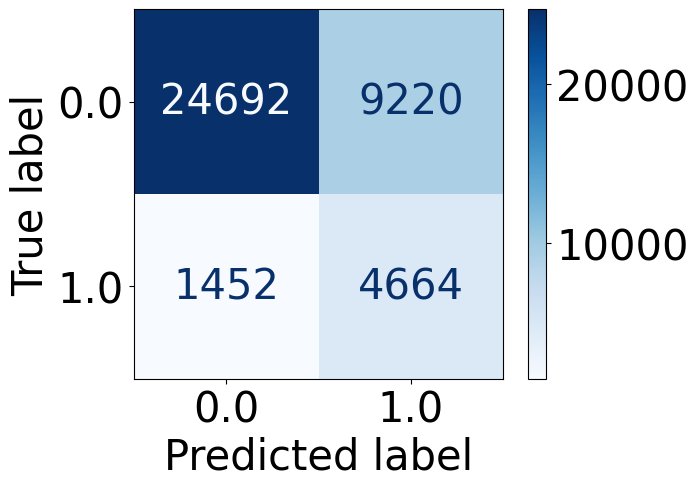

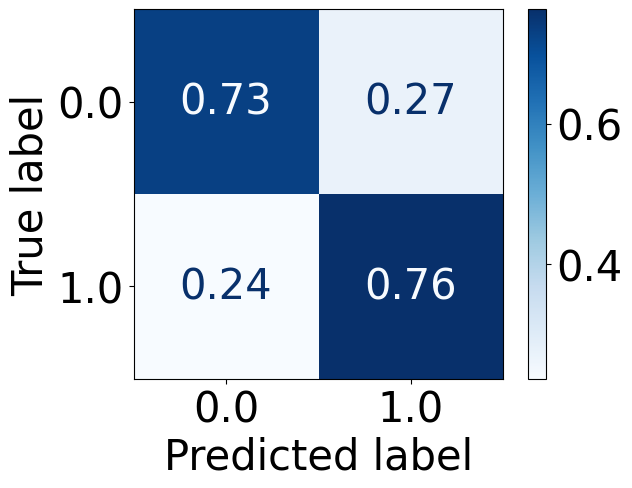

In [53]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_oversampled,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_oversampled,cmap=plt.cm.Blues, normalize="true")

In [ ]:
# Calculate AUROC
auroc = roc_auc_score(y_test_2021, pred_prob_test_2021_lr_oversampled)

print("AUROC:", auroc)

AUROC: 0.8236350000293144


### Performance over subgroups

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_balanced, pred_prob_test_2021_lr_oversampled)

Class 1 Recall: 0.7656965336821452
Class 1 Precision: 0.33481089583184387
Class 1 Area Under Precision-Recall Curve: 0.44915839003435265
Class 1 F1-Score: 0.4659006118489777
Class 0 Recall: 0.7256428402925218
Class 0 Precision: 0.9449713912676164
Class 0 Area Under Precision-Recall Curve: 0.7154255403205335
Class 0 F1-Score: 0.8209097126082098
Overall Accuracy: 0.7317627660637553
Balanced Accuracy: 0.7456696869873335
Area Under ROC Curve: 0.8236350000293144
Matthews Correlation Coefficient: 0.37076684559524653
0.7656965336821452
0.33481089583184387
0.44915839003435265
0.4659006118489777
0.7256428402925218
0.9449713912676164
0.7154255403205335
0.8209097126082098
0.7317627660637553
0.7456696869873335
0.8236350000293144
0.37076684559524653


In [ ]:
test = df_train_2021_oversampled.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_oversampled.predict(X_test_group)
  pred_prob_test_group = lr_oversampled.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.7755730125493613
Class 1 Precision: 0.734834363016617
Class 1 Area Under Precision-Recall Curve: 0.8031417562615066
Class 1 F1-Score: 0.7546542871402885
Class 0 Recall: 0.6884045499350679
Class 0 Precision: 0.7336913020277481
Class 0 Area Under Precision-Recall Curve: 0.3186677558872919
Class 0 F1-Score: 0.7103268459247182
Overall Accuracy: 0.7343268775171761
Balanced Accuracy: 0.7319887812422146
Area Under ROC Curve: 0.807628531014512
Matthews Correlation Coefficient: 0.4662460681106927
0.7755730125493613
0.734834363016617
0.8031417562615066
0.7546542871402885
0.6884045499350679
0.7336913020277481
0.3186677558872919
0.7103268459247182
0.7343268775171761
0.7319887812422146
0.807628531014512
0.4662460681106927
Class 1 Recall: 0.738933437135072
Class 1 Precision: 0.7331005931784479
Class 1 Area Under Precision-Recall Curve: 0.7866857263760259
Class 1 F1-Score: 0.7360054590147409
Class 0 Recall: 0.758251598550461
Class 0 Precision: 0.7637119503945885
Class 0 Area Under P

In [ ]:
test = df_train_2021_oversampled.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_oversampled.predict(X_test_group)
  pred_prob_test_group = lr_oversampled.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7357925922970263
Class 1 Precision: 0.7236081816844068
Class 1 Area Under Precision-Recall Curve: 0.7813818978952589
Class 1 F1-Score: 0.7296495236964715
Class 0 Recall: 0.7422205956356649
Class 0 Precision: 0.7538635962344458
Class 0 Area Under Precision-Recall Curve: 0.3569661484507965
Class 0 F1-Score: 0.7479967911775824
Overall Accuracy: 0.7391453741970584
Balanced Accuracy: 0.7390065939663456
Area Under ROC Curve: 0.8175415901551113
Matthews Correlation Coefficient: 0.47774240623047126
0.7357925922970263
0.7236081816844068
0.7813818978952589
0.7296495236964715
0.7422205956356649
0.7538635962344458
0.3569661484507965
0.7479967911775824
0.7391453741970584
0.7390065939663456
0.8175415901551113
0.47774240623047126
============================  Black ============================ 
Class 1 Recall: 0.8628287632904309
Class 1 Precision: 0.7686316051844466
Class 1 Area Under Precision-Recall Curve: 0.8371042

In [ ]:
test = df_train_2021_oversampled.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = lr_oversampled.predict(X_test_group)
  pred_prob_test_group = lr_oversampled.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.30058651026392963
Class 1 Precision: 0.5631868131868132
Class 1 Area Under Precision-Recall Curve: 0.45123885143924314
Class 1 F1-Score: 0.39196940726577445
Class 0 Recall: 0.9629758994062173
Class 0 Precision: 0.8965853658536586
Class 0 Area Under Precision-Recall Curve: 0.7387660507354322
Class 0 F1-Score: 0.9285954866958572
Overall Accuracy: 0.8721993368833517
Balanced Accuracy: 0.6317812048350735
Area Under ROC Curve: 0.8072893139933126
Matthews Correlation Coefficient: 0.34810725848106205
0.30058651026392963
0.5631868131868132
0.45123885143924314
0.39196940726577445
0.9629758994062173
0.8965853658536586
0.7387660507354322
0.9285954866958572
0.8721993368833517
0.6317812048350735
0.8072893139933126
0.34810725848106205
============================  35-39 ============================ 
Class 1 Recall: 0.44624669935873257
Class 1 Precision: 0.6489303346132749
Class 1 Area Under Precision-Recall Curve: 0.

## SMOTE

### Train and test

Note: The SMOTE requires all the column values to be in number (not string). So the race is reverse mapped to numbers for this case.

In [54]:
race_dict = {1: 'White', 2: 'Black', 3: 'American Indian', 4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',  7: 'Multiracial', 8: 'Hispanic'}
race_dict_rev = {v: k for k, v in race_dict.items()}

df_train_2021['Race'] = df_train_2021['Race'].replace(race_dict_rev)
df_train_2021

Blood pressure  Cholesterol  BMI category  Stroke  Heart disease  \
99749              0.0          0.0           4.0     0.0            0.0   
85033              0.0          0.0           2.0     0.0            0.0   
19523              0.0          1.0           4.0     0.0            0.0   
172614             0.0          1.0           3.0     0.0            0.0   
27291              1.0          1.0           2.0     0.0            0.0   
...                ...          ...           ...     ...            ...   
73349              0.0          0.0           4.0     0.0            0.0   
109259             1.0          1.0           3.0     1.0            0.0   
50057              1.0          0.0           4.0     1.0            0.0   
5192               1.0          0.0           2.0     0.0            0.0   
128037             0.0          0.0           4.0     0.0            0.0   

        Consume fruits  Consume vegitables  Alcoholic  Health insurance  \
99749                1                   1          0                 1   
85033                0                   1          1                 1   
19523                1                   1          1                 1   
172614               0                   1          0                 1   
27291                1                   1          1                 1   
...                ...                 ...        ...               ...   
73349                1                   1          1                 1   
109259               1                   1          1                 1   
50057                0                   1          1                 1   
5192                 0                   0          0                 1   
128037               1                   1          0                 1   

        Unaffordable healthcare  ...  Employment status_Self-employed  \
99749                       0.0  ...                                0   
85033                       0.0  ...                                0   
19523                       0.0  ...                                0   
172614                      0.0  ...                                0   
27291                       0.0  ...                                0   
...                         ...  ...                              ...   
73349                       0.0  ...                                0   
109259                      0.0  ...                                0   
50057                       1.0  ...                                0   
5192                        0.0  ...                                0   
128037                      0.0  ...                                0   

        Employment status_Student  Employment status_Unable to work  \
99749                           0                                 1   
85033                           0                                 0   
19523                           0                                 0   
172614                          0                                 1   
27291                           0                                 0   
...                           ...                               ...   
73349                           0                                 0   
109259                          0                                 0   
50057                           0                                 0   
5192                            0                                 0   
128037                          0                                 0   

        Marital status_Divorced  Marital status_Married  \
99749                         0                       1   
85033                         0                       0   
19523                         0                       1   
172614                        0                       1   
27291                         1                       0   
...                         ...                     ...   
73349                         0                    

In [ ]:
df_train_2021['Race'] = df_train_2021['Race'].replace(race_dict_rev)
df_train_2021

Blood pressure  Cholesterol  BMI category  Stroke  Heart disease  \
99749              0.0          0.0           4.0     0.0            0.0   
85033              0.0          0.0           2.0     0.0            0.0   
19523              0.0          1.0           4.0     0.0            0.0   
172614             0.0          1.0           3.0     0.0            0.0   
27291              1.0          1.0           2.0     0.0            0.0   
...                ...          ...           ...     ...            ...   
73349              0.0          0.0           4.0     0.0            0.0   
109259             1.0          1.0           3.0     1.0            0.0   
50057              1.0          0.0           4.0     1.0            0.0   
5192               1.0          0.0           2.0     0.0            0.0   
128037             0.0          0.0           4.0     0.0            0.0   

        Consume fruits  Consume vegitables  Alcoholic  Health insurance  \
99749                1                   1          0                 1   
85033                0                   1          1                 1   
19523                1                   1          1                 1   
172614               0                   1          0                 1   
27291                1                   1          1                 1   
...                ...                 ...        ...               ...   
73349                1                   1          1                 1   
109259               1                   1          1                 1   
50057                0                   1          1                 1   
5192                 0                   0          0                 1   
128037               1                   1          0                 1   

        Unaffordable healthcare  ...  Employment status_Self-employed  \
99749                       0.0  ...                                0   
85033                       0.0  ...                                0   
19523                       0.0  ...                                0   
172614                      0.0  ...                                0   
27291                       0.0  ...                                0   
...                         ...  ...                              ...   
73349                       0.0  ...                                0   
109259                      0.0  ...                                0   
50057                       1.0  ...                                0   
5192                        0.0  ...                                0   
128037                      0.0  ...                                0   

        Employment status_Student  Employment status_Unable to work  \
99749                           0                                 1   
85033                           0                                 0   
19523                           0                                 0   
172614                          0                                 1   
27291                           0                                 0   
...                           ...                               ...   
73349                           0                                 0   
109259                          0                                 0   
50057                           0                                 0   
5192                            0                                 0   
128037                          0                                 0   

        Marital status_Divorced  Marital status_Married  \
99749                         0                       1   
85033                         0                       0   
19523                         0                       1   
172614                        0                       1   
27291                         1                       0   
...                         ...                     ...   
73349                         0                    

In [55]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop('Diabetes', axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto')

# Oversample the minority class using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_train_2021_SMOTE = pd.concat([X_resampled, y_resampled], axis=1)

# Now resampled_trainset contains the oversampled data using SMOTE
df_train_2021_SMOTE.shape, df_train_2021_SMOTE.groupby(['Diabetes']).size()

((270768, 50),
 Diabetes
 0.0    135384
 1.0    135384
 dtype: int64)

In [56]:
X_train_2021_SMOTE = df_train_2021_SMOTE.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_SMOTE = df_train_2021_SMOTE['Diabetes']
X_train_2021_SMOTE.shape, X_test_2021.shape

((270768, 48), (40028, 48))

In [57]:
lr_SMOTE = LogisticRegression(solver='liblinear')
lr_SMOTE.fit(X_train_2021_SMOTE, y_train_2021_SMOTE)

pred_prob_test_2021_lr_SMOTE = lr_SMOTE.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_SMOTE = lr_SMOTE.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_SMOTE))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_SMOTE))

accuracy 0.7823523533526532
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     33912
         1.0       0.37      0.61      0.46      6116

    accuracy                           0.78     40028
   macro avg       0.65      0.71      0.66     40028
weighted avg       0.84      0.78      0.80     40028



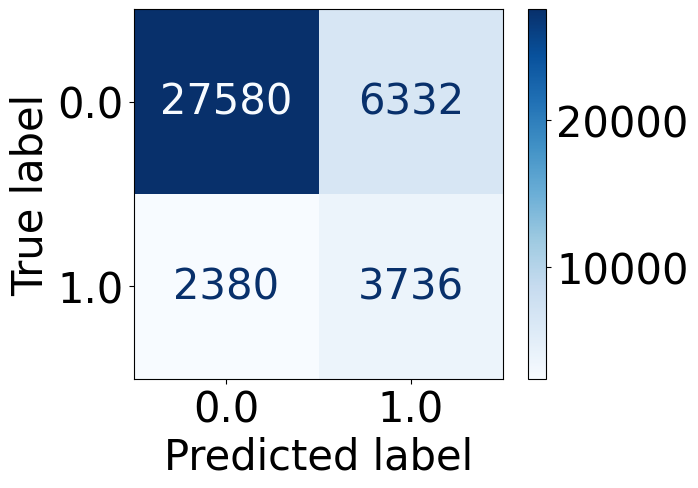

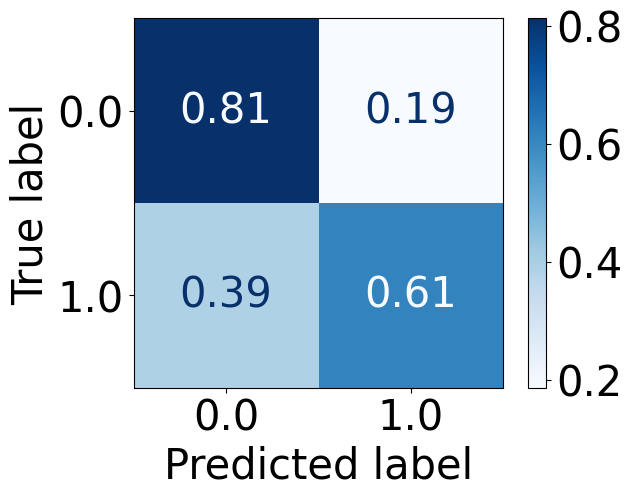

In [58]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_SMOTE,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_SMOTE,cmap=plt.cm.Blues, normalize="true")

### Performance over subgroups

## ADASYN (Adaptive Synthetic Sampling)

### Train and test

In [59]:
race_dict = {1: 'White', 2: 'Black', 3: 'American Indian', 4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',  7: 'Multiracial', 8: 'Hispanic'}
race_dict_rev = {v: k for k, v in race_dict.items()}

df_train_2021['Race'] = df_train_2021['Race'].replace(race_dict_rev)
df_train_2021

Blood pressure  Cholesterol  BMI category  Stroke  Heart disease  \
99749              0.0          0.0           4.0     0.0            0.0   
85033              0.0          0.0           2.0     0.0            0.0   
19523              0.0          1.0           4.0     0.0            0.0   
172614             0.0          1.0           3.0     0.0            0.0   
27291              1.0          1.0           2.0     0.0            0.0   
...                ...          ...           ...     ...            ...   
73349              0.0          0.0           4.0     0.0            0.0   
109259             1.0          1.0           3.0     1.0            0.0   
50057              1.0          0.0           4.0     1.0            0.0   
5192               1.0          0.0           2.0     0.0            0.0   
128037             0.0          0.0           4.0     0.0            0.0   

        Consume fruits  Consume vegitables  Alcoholic  Health insurance  \
99749                1                   1          0                 1   
85033                0                   1          1                 1   
19523                1                   1          1                 1   
172614               0                   1          0                 1   
27291                1                   1          1                 1   
...                ...                 ...        ...               ...   
73349                1                   1          1                 1   
109259               1                   1          1                 1   
50057                0                   1          1                 1   
5192                 0                   0          0                 1   
128037               1                   1          0                 1   

        Unaffordable healthcare  ...  Employment status_Self-employed  \
99749                       0.0  ...                                0   
85033                       0.0  ...                                0   
19523                       0.0  ...                                0   
172614                      0.0  ...                                0   
27291                       0.0  ...                                0   
...                         ...  ...                              ...   
73349                       0.0  ...                                0   
109259                      0.0  ...                                0   
50057                       1.0  ...                                0   
5192                        0.0  ...                                0   
128037                      0.0  ...                                0   

        Employment status_Student  Employment status_Unable to work  \
99749                           0                                 1   
85033                           0                                 0   
19523                           0                                 0   
172614                          0                                 1   
27291                           0                                 0   
...                           ...                               ...   
73349                           0                                 0   
109259                          0                                 0   
50057                           0                                 0   
5192                            0                                 0   
128037                          0                                 0   

        Marital status_Divorced  Marital status_Married  \
99749                         0                       1   
85033                         0                       0   
19523                         0                       1   
172614                        0                       1   
27291                         1                       0   
...                         ...                     ...   
73349                         0                    

In [60]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop('Diabetes', axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of ADASYN
adasyn = ADASYN(sampling_strategy='auto')

# Oversample the minority class using ADASYN
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
resampled_trainset = pd.concat([X_resampled, y_resampled], axis=1)



In [61]:
df_train_2021_ADASYN = resampled_trainset
# Now resampled_trainset contains the oversampled data using ADASYN
df_train_2021.shape, df_train_2021_ADASYN.shape, df_train_2021_ADASYN.groupby(['Diabetes']).size()

((160108, 50),
 (270190, 50),
 Diabetes
 0.0    135384
 1.0    134806
 dtype: int64)

In [62]:
X_train_2021_ADASYN = df_train_2021_ADASYN.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_ADASYN = df_train_2021_ADASYN['Diabetes']
X_train_2021_ADASYN.shape, X_test_2021.shape

((270190, 48), (40028, 48))

In [63]:
lr_ADASYN = LogisticRegression(solver='liblinear')
lr_ADASYN.fit(X_train_2021_ADASYN, y_train_2021_ADASYN)

pred_prob_test_2021_lr_ADASYN = lr_ADASYN.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_ADASYN = lr_ADASYN.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_ADASYN))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_ADASYN))

accuracy 0.776606375537124
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     33912
         1.0       0.36      0.62      0.46      6116

    accuracy                           0.78     40028
   macro avg       0.64      0.71      0.66     40028
weighted avg       0.84      0.78      0.80     40028



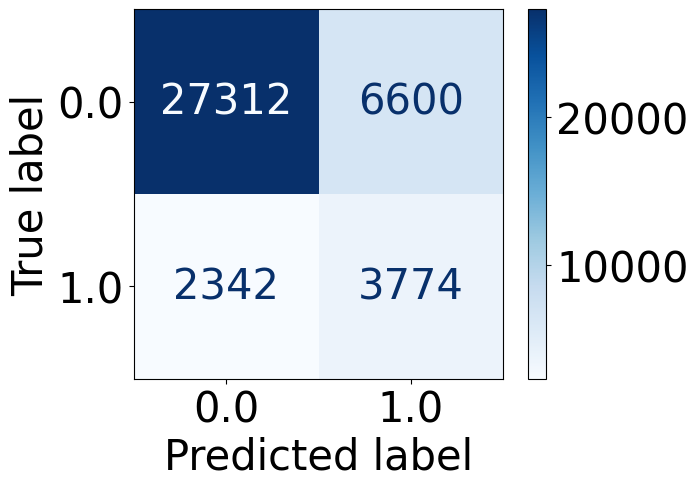

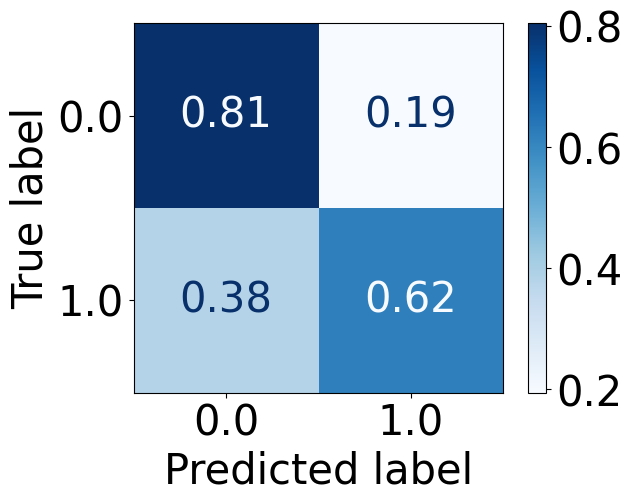

In [64]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_ADASYN,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_ADASYN,cmap=plt.cm.Blues, normalize="true")

### Performance over subgroups

## TomekLinks
Note: Removing instances from the majority class that are close to instances in the minority class

### Train and test

In [65]:
import pandas as pd
from imblearn.under_sampling import TomekLinks

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop('Diabetes', axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of TomekLinks
tomek_links = TomekLinks(sampling_strategy='auto')

# Undersample the majority class using TomekLinks
X_resampled, y_resampled = tomek_links.fit_resample(X_train, y_train)

# Create a new DataFrame with the undersampled data
df_train_2021_TomekLinks = pd.concat([X_resampled, y_resampled], axis=1)

# Now undersampled_trainset contains the undersampled data using TomekLinks
df_train_2021.shape, df_train_2021_TomekLinks.shape, df_train_2021_TomekLinks.groupby(['Diabetes']).size()

((160108, 50),
 (155761, 50),
 Diabetes
 0.0    131037
 1.0     24724
 dtype: int64)

In [66]:
X_train_2021_TomekLinks = df_train_2021_TomekLinks.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_TomekLinks = df_train_2021_TomekLinks['Diabetes']
X_train_2021_TomekLinks.shape, X_test_2021.shape

((155761, 48), (40028, 48))

In [67]:
lr_TomekLinks = LogisticRegression(solver='liblinear')
lr_TomekLinks.fit(X_train_2021_TomekLinks, y_train_2021_TomekLinks)

pred_prob_test_2021_lr_TomekLinks = lr_TomekLinks.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_TomekLinks = lr_TomekLinks.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_TomekLinks))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_TomekLinks))

accuracy 0.8553512541221145
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     33912
         1.0       0.56      0.24      0.34      6116

    accuracy                           0.86     40028
   macro avg       0.72      0.60      0.63     40028
weighted avg       0.83      0.86      0.83     40028



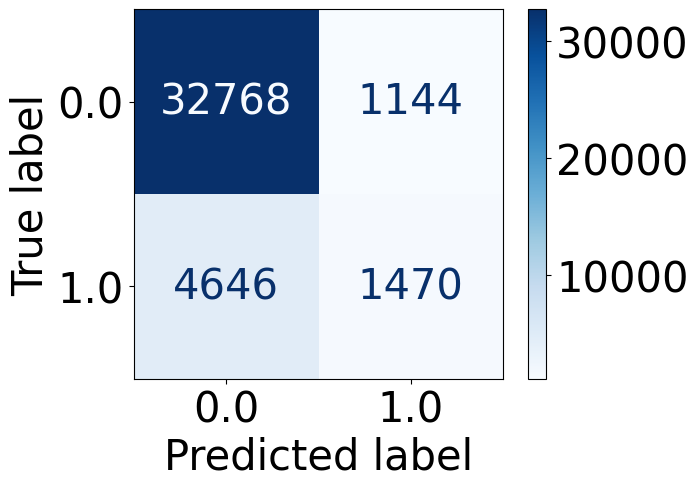

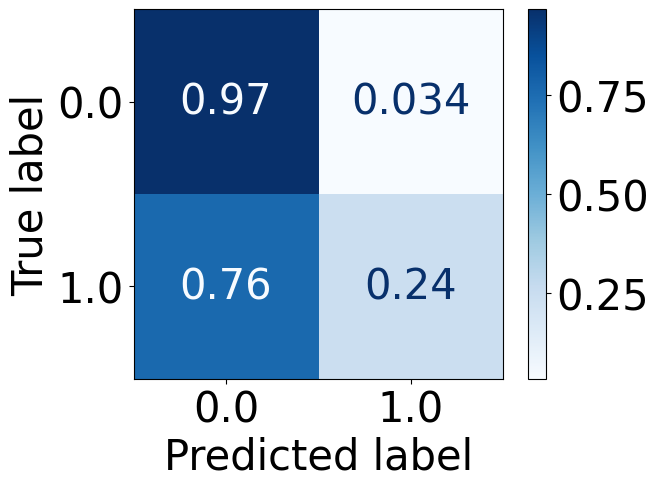

In [68]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_TomekLinks,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_TomekLinks,cmap=plt.cm.Blues, normalize="true")

### Performance over subgroups

## ENN (Edited Nearest Neighbors) - Undersampling
Removing instances from the majority class that are misclassified based on the nearest neighbors from both classes.


In [69]:

from imblearn.under_sampling import EditedNearestNeighbours

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop('Diabetes', axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of EditedNearestNeighbours with adjusted parameters
enn_sampler = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)

# Apply Edited Nearest Neighbors under-sampling
X_resampled, y_resampled = enn_sampler.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_train_2021_ENN = pd.concat([X_resampled, y_resampled], axis=1)



In [70]:
# Now resampled_trainset contains the resampled data using Edited Nearest Neighbors under-sampling
df_train_2021.shape, df_train_2021.groupby(['Diabetes']).size(), df_train_2021_ENN.shape, df_train_2021_ENN.groupby(['Diabetes']).size()

((160108, 50),
 Diabetes
 0.0    135384
 1.0     24724
 dtype: int64,
 (122593, 50),
 Diabetes
 0.0    97869
 1.0    24724
 dtype: int64)

In [71]:
X_train_2021_ENN = df_train_2021_ENN.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_ENN = df_train_2021_ENN['Diabetes']
X_train_2021_ENN.shape, X_test_2021.shape

((122593, 48), (40028, 48))

In [72]:
lr_ENN = LogisticRegression(solver='liblinear')
lr_ENN.fit(X_train_2021_ENN, y_train_2021_ENN)

pred_prob_test_2021_lr_ENN = lr_ENN.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_ENN = lr_ENN.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_ENN))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_ENN))

accuracy 0.8200259818127311
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     33912
         1.0       0.43      0.53      0.47      6116

    accuracy                           0.82     40028
   macro avg       0.67      0.70      0.68     40028
weighted avg       0.84      0.82      0.83     40028



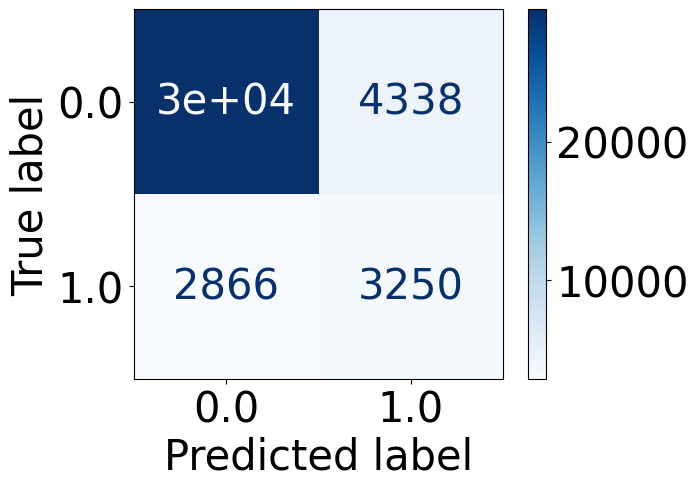

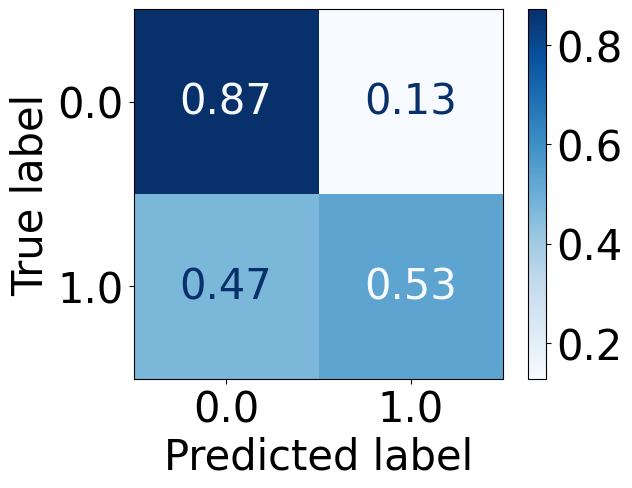

In [73]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_ENN,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_ENN,cmap=plt.cm.Blues, normalize="true")

## Near Miss

### Train and test

In [74]:
import pandas as pd
from imblearn.under_sampling import NearMiss

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop('Diabetes', axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of NearMiss with adjusted parameters
nearmiss_sampler = NearMiss(sampling_strategy='auto', version=1)

# Apply NearMiss under-sampling
X_resampled, y_resampled = nearmiss_sampler.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_train_2021_NearMiss = pd.concat([X_resampled, y_resampled], axis=1)



In [75]:
# Now resampled_trainset contains the resampled data using NearMiss under-sampling
df_train_2021.shape, df_train_2021.groupby(['Diabetes']).size(), df_train_2021_NearMiss.shape, df_train_2021_NearMiss.groupby(['Diabetes']).size()

((160108, 50),
 Diabetes
 0.0    135384
 1.0     24724
 dtype: int64,
 (49448, 50),
 Diabetes
 0.0    24724
 1.0    24724
 dtype: int64)

In [76]:
X_train_2021_NearMiss = df_train_2021_NearMiss.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_NearMiss = df_train_2021_NearMiss['Diabetes']
X_train_2021_NearMiss.shape, X_test_2021.shape

((49448, 48), (40028, 48))

In [77]:
lr_NearMiss = LogisticRegression(solver='liblinear')
lr_NearMiss.fit(X_train_2021_ENN, y_train_2021_ENN)

pred_prob_test_2021_lr_NearMiss = lr_NearMiss.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_NearMiss = lr_NearMiss.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_NearMiss))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_NearMiss))

accuracy 0.8200259818127311
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     33912
         1.0       0.43      0.53      0.47      6116

    accuracy                           0.82     40028
   macro avg       0.67      0.70      0.68     40028
weighted avg       0.84      0.82      0.83     40028



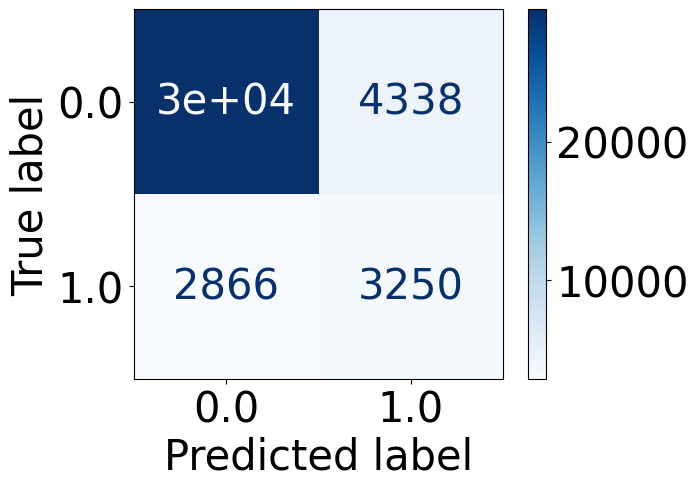

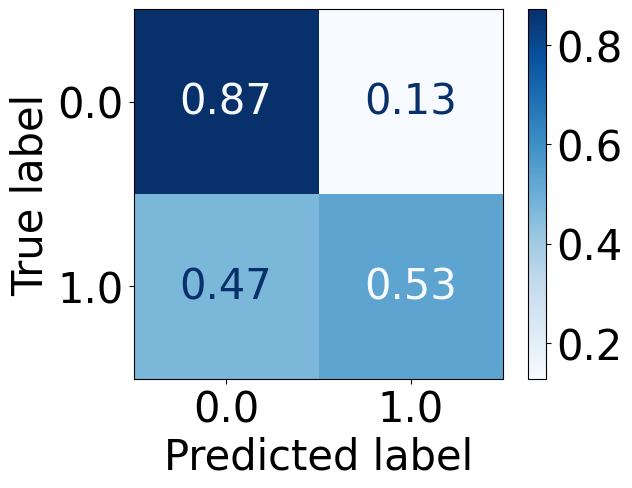

In [78]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_ENN,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_ENN,cmap=plt.cm.Blues, normalize="true")

### Performance over subgroups

## Combined - Random SMOTE

### Train and test

In [79]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have your trainset DataFrame with 'Diabetes' column as labels
# X_train: Features, y_train: Labels
X_train = df_train_2021.drop('Diabetes', axis=1)
y_train = df_train_2021['Diabetes']

# Create an instance of SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Create an instance of RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Combine SMOTE and RandomUnderSampler using SMOTEENN
random_smote_sampler = SMOTEENN(sampling_strategy='auto', smote=smote, random_state=42)

# Apply Random-SMOTE under-sampling and over-sampling
X_resampled, y_resampled = random_smote_sampler.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_train_2021_combined = pd.concat([X_resampled, y_resampled], axis=1)


In [80]:
# Now resampled_trainset contains the resampled data using Random-SMOTE
df_train_2021.shape, df_train_2021.groupby(['Diabetes']).size(), df_train_2021_combined.shape, df_train_2021_combined.groupby(['Diabetes']).size()

((160108, 50),
 Diabetes
 0.0    135384
 1.0     24724
 dtype: int64,
 (204234, 50),
 Diabetes
 0.0     76253
 1.0    127981
 dtype: int64)

In [81]:
X_train_2021_combined = df_train_2021_combined.drop(['Diabetes', 'Race'],axis=1)
y_train_2021_combined = df_train_2021_combined['Diabetes']
X_train_2021_combined.shape, X_test_2021.shape

((204234, 48), (40028, 48))

In [82]:
lr_combined = LogisticRegression(solver='liblinear')
lr_combined.fit(X_train_2021_ENN, y_train_2021_ENN)

pred_prob_test_2021_lr_combined = lr_combined.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_combined = lr_combined.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_combined))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_combined))

accuracy 0.8200259818127311
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     33912
         1.0       0.43      0.53      0.47      6116

    accuracy                           0.82     40028
   macro avg       0.67      0.70      0.68     40028
weighted avg       0.84      0.82      0.83     40028



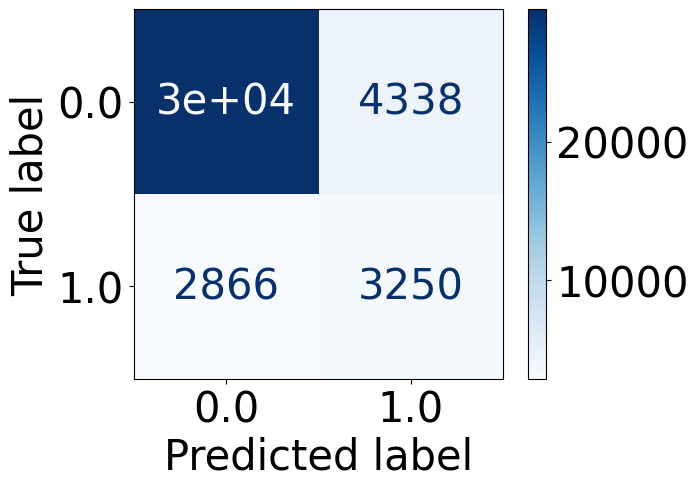

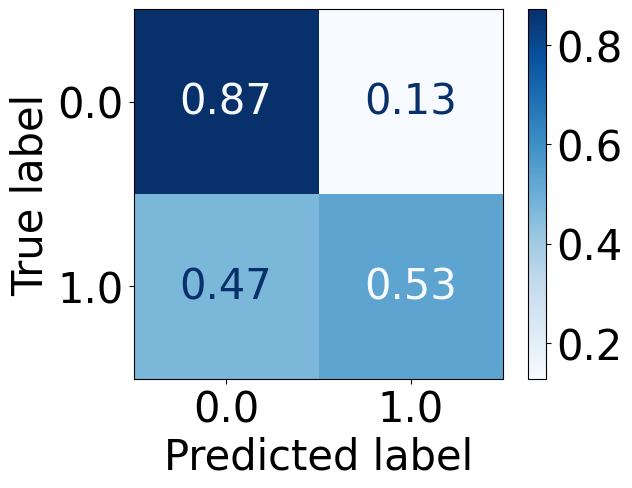

In [83]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_combined,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_combined,cmap=plt.cm.Blues, normalize="true")

### Performance over subgroups

## Cost-sensitive learning

### Train and test

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your dataset and create X_train, X_test, y_train, y_test
# X_train: Features for training, y_train: Labels for training
# X_test: Features for testing, y_test: Labels for testing

X_train_2021= df_train_2021.drop(['Diabetes', 'Race'],axis=1)
y_train_2021 = df_train_2021['Diabetes']

# Create a LogisticRegression classifier with class_weight parameter
# Set class_weight='balanced' to automatically adjust class weights
# Alternatively, you can set class_weight manually based on your preference
clf = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_2021, y_train_2021)

# Predict on the test data
y_pred = clf.predict(X_test_2021)

# Print classification report
print(classification_report(y_test_2021, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     33912
         1.0       0.34      0.76      0.47      6116

    accuracy                           0.73     40028
   macro avg       0.64      0.74      0.64     40028
weighted avg       0.85      0.73      0.77     40028



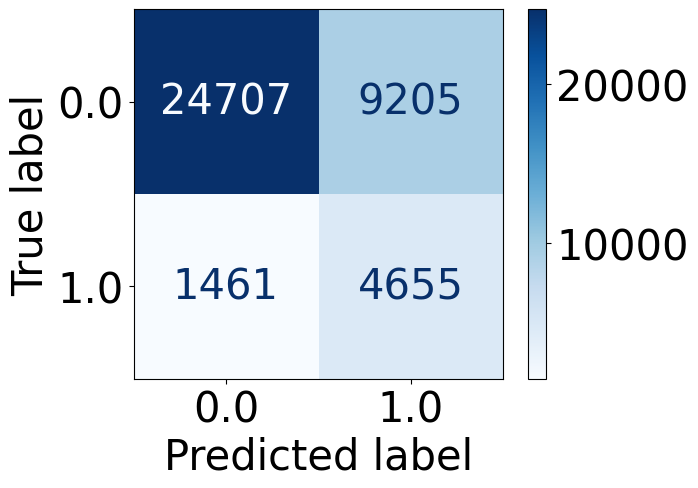

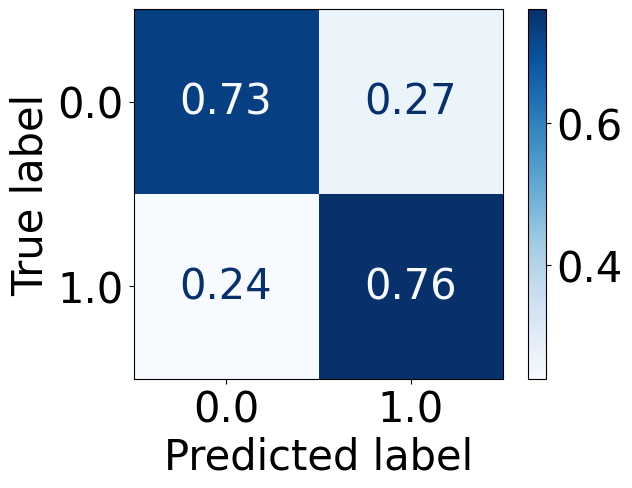

In [85]:
plt.rcParams['font.size'] = 30
ConfusionMatrixDisplay.from_predictions(y_test_2021, y_pred,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, y_pred,cmap=plt.cm.Blues, normalize="true")

In [ ]:
# Define class weights
class_weights = {0: 1, 1: 5}  # 1 for majority class, 5 for minority class

# Create a LogisticRegression classifier with custom class weights
clf = LogisticRegression(class_weight=class_weights, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_2021, y_train_2021)

# Predict on the test data
y_pred = clf.predict(X_test_2021)

# Print classification report
print(classification_report(y_test_2021, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     33912
         1.0       0.35      0.74      0.47      6116

    accuracy                           0.75     40028
   macro avg       0.64      0.74      0.65     40028
weighted avg       0.85      0.75      0.78     40028



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


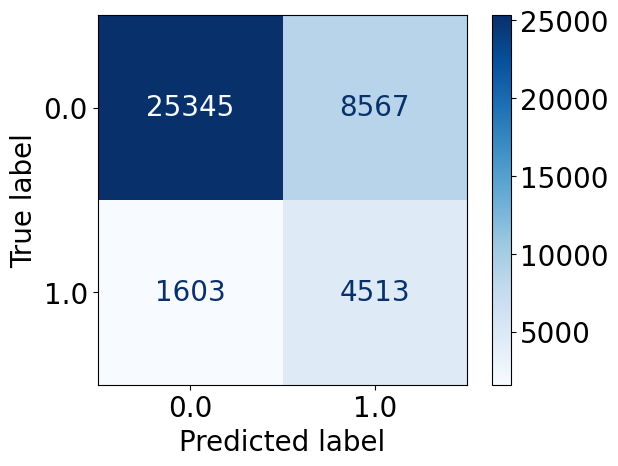

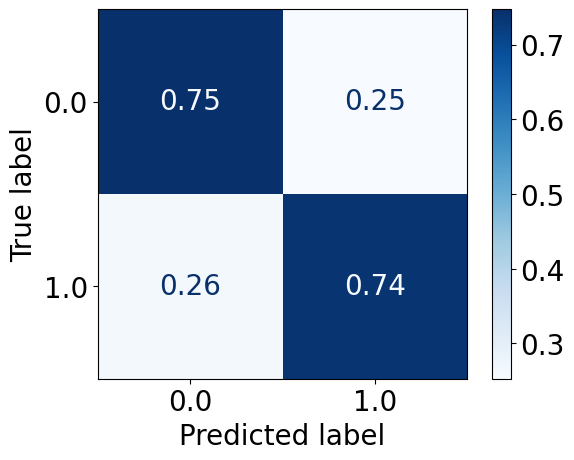

In [ ]:
plt.rcParams['font.size'] = 20
ConfusionMatrixDisplay.from_predictions(y_test_2021, y_pred,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, y_pred,cmap=plt.cm.Blues, normalize="true")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     33912
         1.0       0.37      0.67      0.48      6116

    accuracy                           0.78     40028
   macro avg       0.65      0.73      0.67     40028
weighted avg       0.85      0.78      0.80     40028



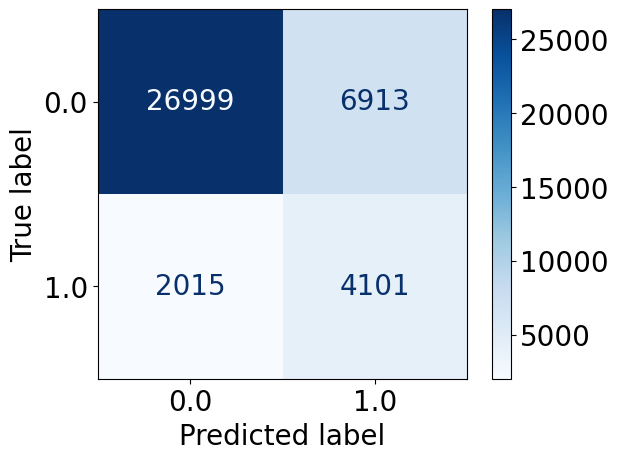

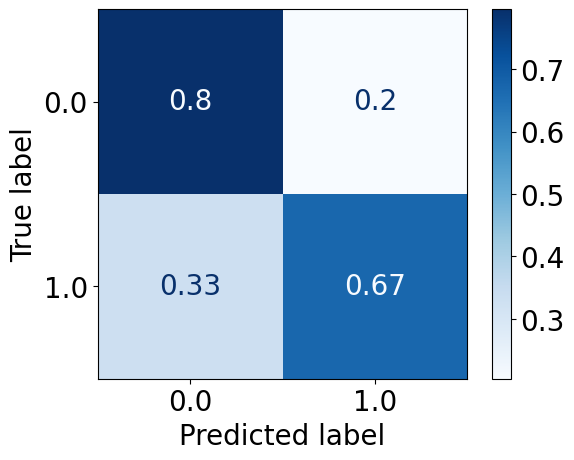

In [ ]:
# Define class weights
class_weights = {0: 1, 1: 4}  # 1 for majority class, 5 for minority class

# Create a LogisticRegression classifier with custom class weights
clf = LogisticRegression(class_weight=class_weights, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_2021, y_train_2021)

# Predict on the test data
y_pred = clf.predict(X_test_2021)

# Print classification report
print(classification_report(y_test_2021, y_pred))

plt.rcParams['font.size'] = 20
ConfusionMatrixDisplay.from_predictions(y_test_2021, y_pred,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, y_pred,cmap=plt.cm.Blues, normalize="true")

# Multi year analysis


## Train on 2021 (Imbalanced) and test on other years

### Train on 2021 and test on 2021

#### LR

accuracy 0.8558259218547017
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.58      0.21      0.30      6116

    accuracy                           0.86     40028
   macro avg       0.73      0.59      0.61     40028
weighted avg       0.83      0.86      0.83     40028



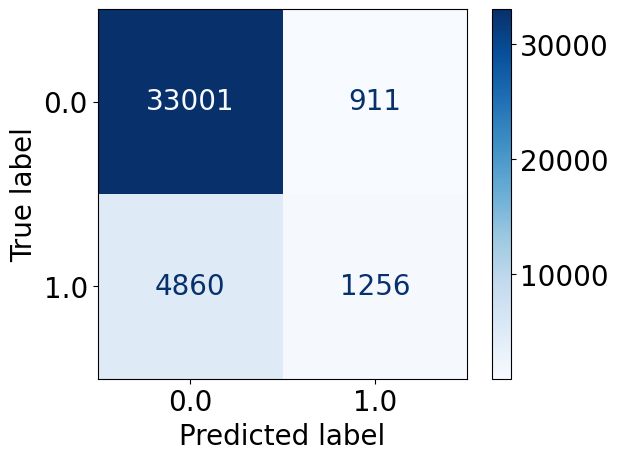

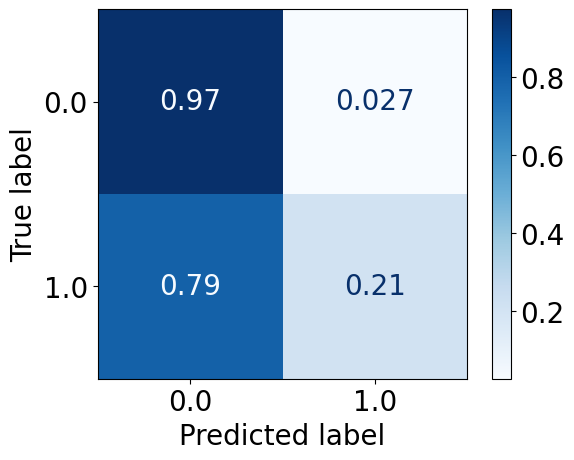

In [ ]:
lr_2021 = LogisticRegression(solver='liblinear')
lr_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_lr = lr_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr = lr_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr, pred_prob_test_2021_lr)

Class 1 Recall: 0.2053629823413996
Class 1 Precision: 0.5796031379787725
Class 1 Area Under Precision-Recall Curve: 0.4507508031425717
Class 1 F1-Score: 0.3032717614390921
Class 0 Recall: 0.9731363529134229
Class 0 Precision: 0.871635720134175
Class 0 Area Under Precision-Recall Curve: 0.7152760233747096
Class 0 F1-Score: 0.9195937190865645
Overall Accuracy: 0.8558259218547017
Balanced Accuracy: 0.5892496676274113
Area Under ROC Curve: 0.8234227349832158
Matthews Correlation Coefficient: 0.283805983401172
0.2053629823413996
0.5796031379787725
0.4507508031425717
0.3032717614390921
0.9731363529134229
0.871635720134175
0.7152760233747096
0.9195937190865645
0.8558259218547017
0.5892496676274113
0.8234227349832158
0.283805983401172


#### RF

accuracy 0.85212851004297
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.55      0.18      0.27      6116

    accuracy                           0.85     40028
   macro avg       0.71      0.58      0.60     40028
weighted avg       0.82      0.85      0.82     40028



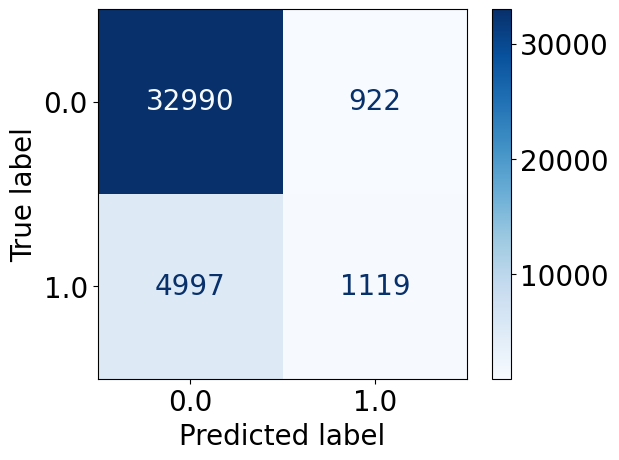

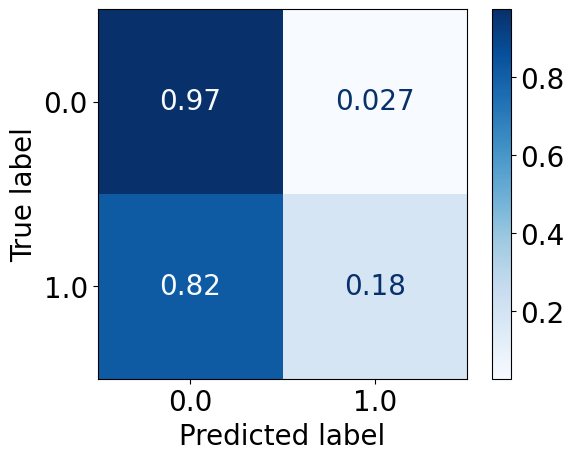

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_2021 = RandomForestClassifier()
rf_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_rf = rf_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_rf = rf_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_rf))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_rf))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_rf,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_rf,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_rf, pred_prob_test_2021_rf)

Class 1 Recall: 0.1829627207325049
Class 1 Precision: 0.5482606565409113
Class 1 Area Under Precision-Recall Curve: 0.40947052577934157
Class 1 F1-Score: 0.27436557557925706
Class 0 Recall: 0.9728119839584808
Class 0 Precision: 0.8684549977623924
Class 0 Area Under Precision-Recall Curve: 0.7282019763438848
Class 0 F1-Score: 0.9176761846479089
Overall Accuracy: 0.85212851004297
Balanced Accuracy: 0.5778873523454928
Area Under ROC Curve: 0.802528258227234
Matthews Correlation Coefficient: 0.25478178504203947
0.1829627207325049
0.5482606565409113
0.40947052577934157
0.27436557557925706
0.9728119839584808
0.8684549977623924
0.7282019763438848
0.9176761846479089
0.85212851004297
0.5778873523454928
0.802528258227234
0.25478178504203947


#### SVM

In [ ]:
from sklearn.svm import SVC
svm_2021 = SVC(probability=True, kernel='rbf', max_iter = 100)
svm_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_svm = svm_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_svm = svm_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_svm))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_svm))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_svm,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_svm,cmap=plt.cm.Blues, normalize="true")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy 0.723393624462876
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82     33912
         1.0       0.29      0.55      0.38      6116

    accuracy                           0.72     40028
   macro avg       0.59      0.65      0.60     40028
weighted avg       0.81      0.72      0.75     40028



In [ ]:
performace_metrix(y_test_2021, pred_test_2021_svm, pred_prob_test_2021_svm)

Class 1 Recall: 0.5470896010464356
Class 1 Precision: 0.28725961538461536
Class 1 Area Under Precision-Recall Curve: 0.2981258725983937
Class 1 F1-Score: 0.3767169556406215
Class 0 Recall: 0.7551899032790752
Class 0 Precision: 0.9023960535588442
Class 0 Area Under Precision-Recall Curve: 0.7577194689564379
Class 0 F1-Score: 0.8222564695305977
Overall Accuracy: 0.723393624462876
Balanced Accuracy: 0.6511397521627553
Area Under ROC Curve: 0.7284595649093542
Matthews Correlation Coefficient: 0.23943479613613422
0.5470896010464356
0.28725961538461536
0.2981258725983937
0.3767169556406215
0.7551899032790752
0.9023960535588442
0.7577194689564379
0.8222564695305977
0.723393624462876
0.6511397521627553
0.7284595649093542
0.23943479613613422


#### KNN

accuracy 0.8385630058958728
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     33912
         1.0       0.44      0.20      0.27      6116

    accuracy                           0.84     40028
   macro avg       0.65      0.58      0.59     40028
weighted avg       0.80      0.84      0.81     40028



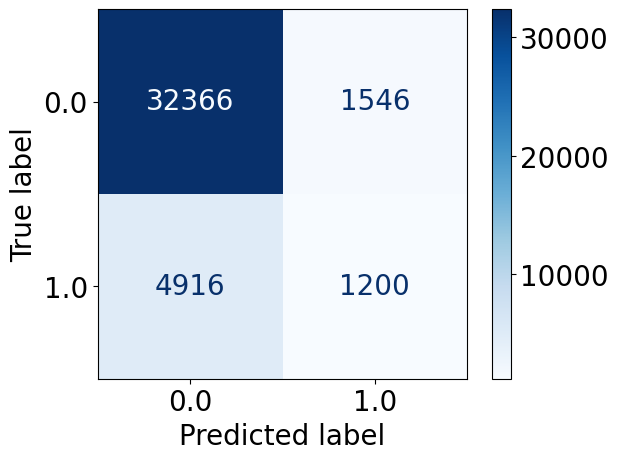

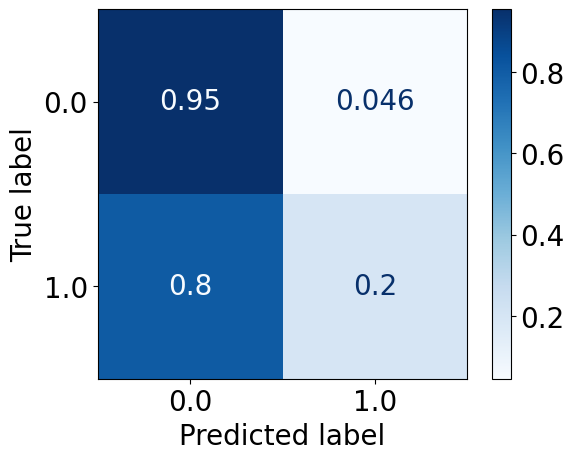

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_2021 = KNeighborsClassifier(n_neighbors=5)
knn_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_knn = knn_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_knn = knn_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_knn))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_knn))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_knn,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_knn,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_knn, pred_prob_test_2021_knn)

Class 1 Recall: 0.1962066710268149
Class 1 Precision: 0.43699927166788055
Class 1 Area Under Precision-Recall Curve: 0.299207842470238
Class 1 F1-Score: 0.2708192281651997
Class 0 Recall: 0.954411417787214
Class 0 Precision: 0.868140121238131
Class 0 Area Under Precision-Recall Curve: 0.7871629279277313
Class 0 F1-Score: 0.909233924207096
Overall Accuracy: 0.8385630058958728
Balanced Accuracy: 0.5753090444070145
Area Under ROC Curve: 0.720919196894945
Matthews Correlation Coefficient: 0.2143816974029651
0.1962066710268149
0.43699927166788055
0.299207842470238
0.2708192281651997
0.954411417787214
0.868140121238131
0.7871629279277313
0.909233924207096
0.8385630058958728
0.5753090444070145
0.720919196894945
0.2143816974029651


#### MLP

accuracy 0.8547766563405617
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.56      0.23      0.33      6116

    accuracy                           0.85     40028
   macro avg       0.72      0.60      0.62     40028
weighted avg       0.83      0.85      0.83     40028



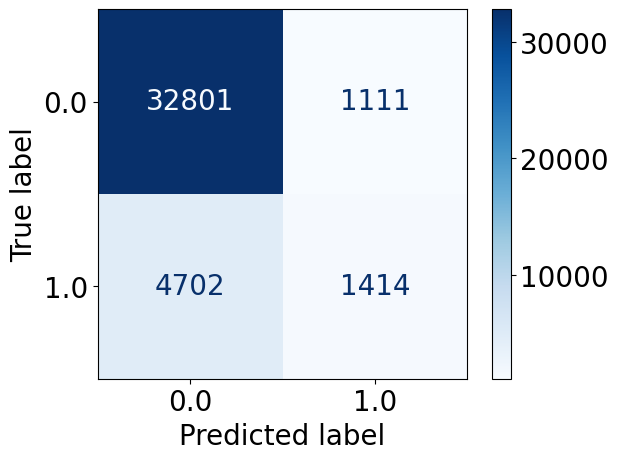

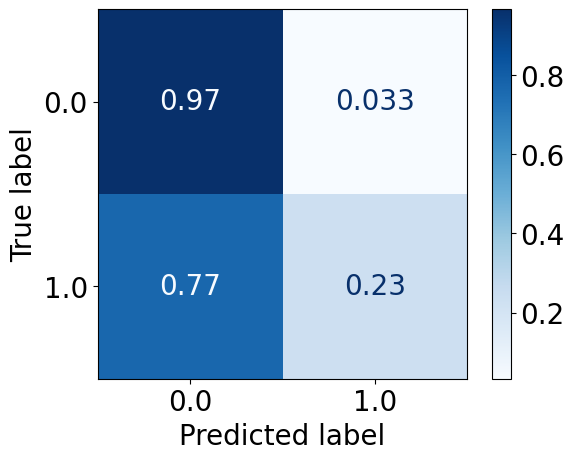

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_2021= MLPClassifier()
mlp_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_mlp = mlp_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_mlp = mlp_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_mlp))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_mlp))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_mlp,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_mlp,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_mlp, pred_prob_test_2021_mlp)

Class 1 Recall: 0.23119686069326356
Class 1 Precision: 0.56
Class 1 Area Under Precision-Recall Curve: 0.4362794333230925
Class 1 F1-Score: 0.3272769355398681
Class 0 Recall: 0.9672387355508375
Class 0 Precision: 0.8746233634642562
Class 0 Area Under Precision-Recall Curve: 0.7177046438843466
Class 0 F1-Score: 0.9186025344815514
Overall Accuracy: 0.8547766563405617
Balanced Accuracy: 0.5992177981220506
Area Under ROC Curve: 0.8186972883573087
Matthews Correlation Coefficient: 0.29367455843270845
0.23119686069326356
0.56
0.4362794333230925
0.3272769355398681
0.9672387355508375
0.8746233634642562
0.7177046438843466
0.9186025344815514
0.8547766563405617
0.5992177981220506
0.8186972883573087
0.29367455843270845


### Test on 2019

#### LR

accuracy 0.8536573799644339
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     35675
         1.0       0.56      0.22      0.32      6500

    accuracy                           0.85     42175
   macro avg       0.72      0.59      0.62     42175
weighted avg       0.82      0.85      0.83     42175



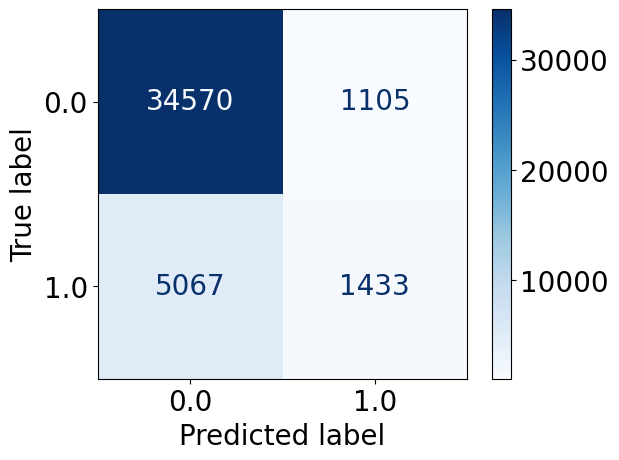

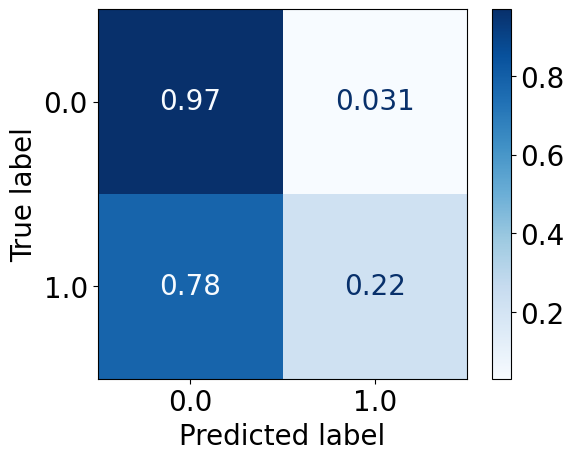

In [ ]:
pred_prob_test_2019_lr_2021 = lr_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_lr_2021 = lr_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_lr_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_lr_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_lr_2021, pred_prob_test_2019_lr_2021)

Class 1 Recall: 0.22046153846153846
Class 1 Precision: 0.5646178092986603
Class 1 Area Under Precision-Recall Curve: 0.4513267780756198
Class 1 F1-Score: 0.3171055543261783
Class 0 Recall: 0.9690259285213735
Class 0 Precision: 0.8721648964351489
Class 0 Area Under Precision-Recall Curve: 0.71365884930005
Class 0 F1-Score: 0.9180475886976843
Overall Accuracy: 0.8536573799644339
Balanced Accuracy: 0.5947437334914559
Area Under ROC Curve: 0.8230189380626382
Matthews Correlation Coefficient: 0.28768880501584027
0.22046153846153846
0.5646178092986603
0.4513267780756198
0.3171055543261783
0.9690259285213735
0.8721648964351489
0.71365884930005
0.9180475886976843
0.8536573799644339
0.5947437334914559
0.8230189380626382
0.28768880501584027


#### RF

accuracy 0.8502904564315352
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     35675
         1.0       0.54      0.18      0.27      6500

    accuracy                           0.85     42175
   macro avg       0.70      0.58      0.59     42175
weighted avg       0.82      0.85      0.82     42175



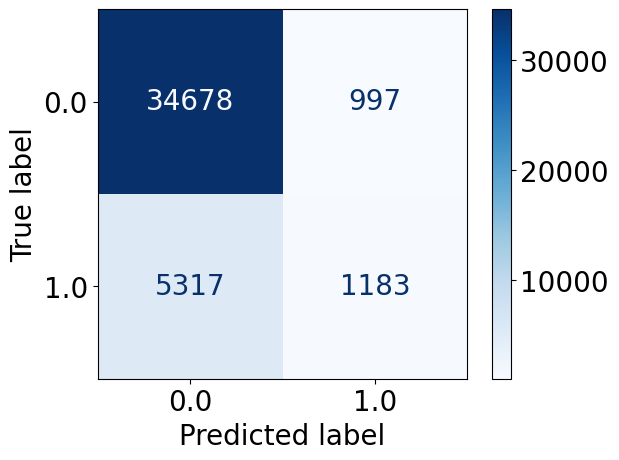

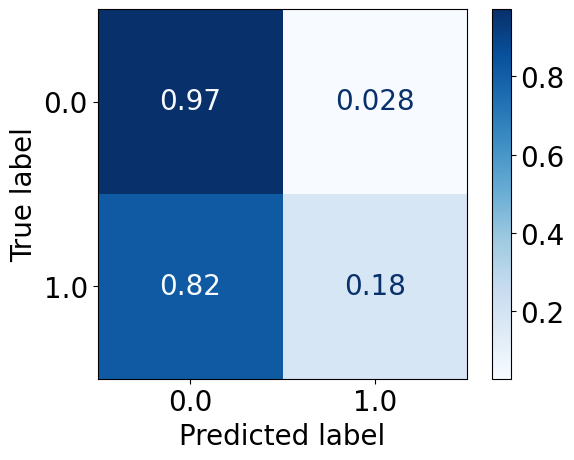

In [ ]:
pred_prob_test_2019_rf_2021 = rf_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_rf_2021 = rf_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_rf_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_rf_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_rf_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_rf_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_rf_2021, pred_prob_test_2019_rf_2021)

Class 1 Recall: 0.182
Class 1 Precision: 0.5426605504587156
Class 1 Area Under Precision-Recall Curve: 0.4108681944557388
Class 1 F1-Score: 0.2725806451612903
Class 0 Recall: 0.9720532585844429
Class 0 Precision: 0.8670583822977872
Class 0 Area Under Precision-Recall Curve: 0.7249800938973293
Class 0 F1-Score: 0.9165587419056429
Overall Accuracy: 0.8502904564315352
Balanced Accuracy: 0.5770266292922215
Area Under ROC Curve: 0.8050738159667943
Matthews Correlation Coefficient: 0.25123402774082876
0.182
0.5426605504587156
0.4108681944557388
0.2725806451612903
0.9720532585844429
0.8670583822977872
0.7249800938973293
0.9165587419056429
0.8502904564315352
0.5770266292922215
0.8050738159667943
0.25123402774082876


#### SVM

accuracy 0.7366212211025489
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83     35675
         1.0       0.29      0.49      0.36      6500

    accuracy                           0.74     42175
   macro avg       0.59      0.64      0.60     42175
weighted avg       0.80      0.74      0.76     42175



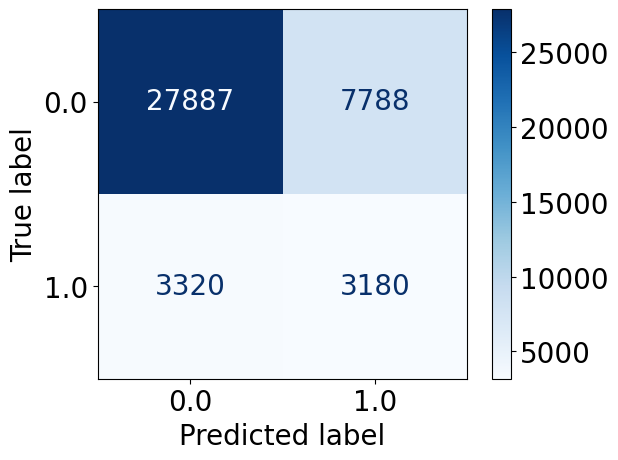

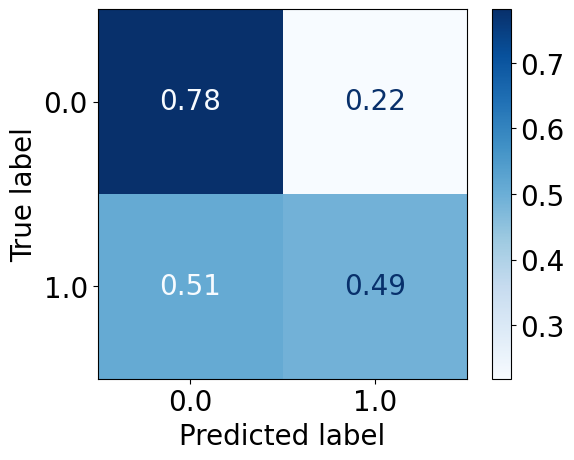

In [ ]:
pred_prob_test_2019_svm_2021 = svm_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_svm_2021 = svm_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_svm_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_svm_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_svm_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_svm_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_svm_2021, pred_prob_test_2019_svm_2021)

Class 1 Recall: 0.48923076923076925
Class 1 Precision: 0.2899343544857768
Class 1 Area Under Precision-Recall Curve: 0.28615473267983504
Class 1 F1-Score: 0.36409434394321044
Class 0 Recall: 0.7816958654519972
Class 0 Precision: 0.8936136123305669
Class 0 Area Under Precision-Recall Curve: 0.7614174831022416
Class 0 F1-Score: 0.8339164498669298
Overall Accuracy: 0.7366212211025489
Balanced Accuracy: 0.6354633173413833
Area Under ROC Curve: 0.7161007320360089
Matthews Correlation Coefficient: 0.22299783172133328
0.48923076923076925
0.2899343544857768
0.28615473267983504
0.36409434394321044
0.7816958654519972
0.8936136123305669
0.7614174831022416
0.8339164498669298
0.7366212211025489
0.6354633173413833
0.7161007320360089
0.22299783172133328


#### KNN

accuracy 0.8317486662714878
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     35675
         1.0       0.41      0.21      0.28      6500

    accuracy                           0.83     42175
   macro avg       0.64      0.58      0.59     42175
weighted avg       0.80      0.83      0.81     42175



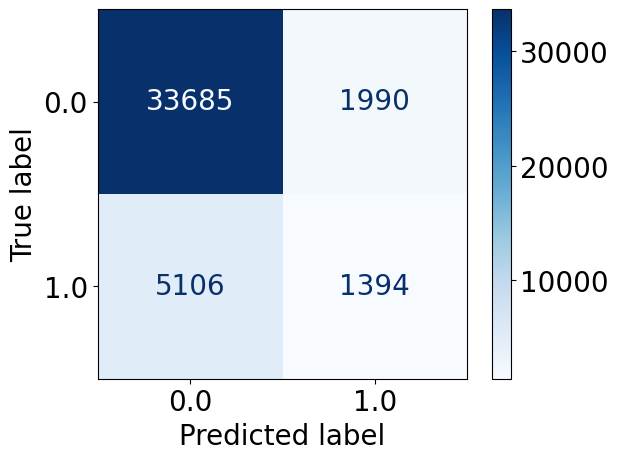

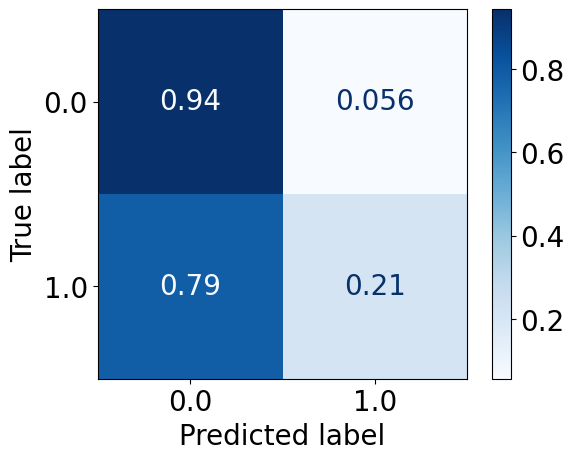

In [ ]:
pred_prob_test_2019_knn_2021 = knn_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_knn_2021 = knn_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_knn_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_knn_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_knn_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_knn_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_knn_2021, pred_prob_test_2019_knn_2021)

Class 1 Recall: 0.21446153846153845
Class 1 Precision: 0.4119385342789598
Class 1 Area Under Precision-Recall Curve: 0.2879842365909992
Class 1 F1-Score: 0.2820720356131121
Class 0 Recall: 0.9442186405045551
Class 0 Precision: 0.8683715294784873
Class 0 Area Under Precision-Recall Curve: 0.7865095968638111
Class 0 F1-Score: 0.9047081889721484
Overall Accuracy: 0.8317486662714878
Balanced Accuracy: 0.5793400894830467
Area Under ROC Curve: 0.7098754309740715
Matthews Correlation Coefficient: 0.21090199402335857
0.21446153846153845
0.4119385342789598
0.2879842365909992
0.2820720356131121
0.9442186405045551
0.8683715294784873
0.7865095968638111
0.9047081889721484
0.8317486662714878
0.5793400894830467
0.7098754309740715
0.21090199402335857


#### MLP

accuracy 0.8476111440426793
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     35675
         1.0       0.51      0.24      0.33      6500

    accuracy                           0.85     42175
   macro avg       0.69      0.60      0.62     42175
weighted avg       0.82      0.85      0.82     42175



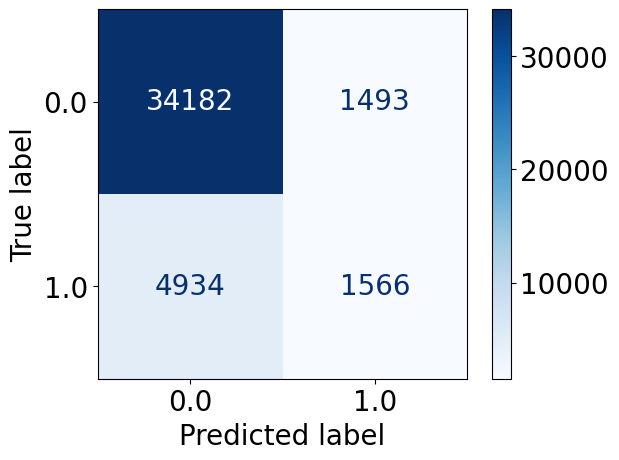

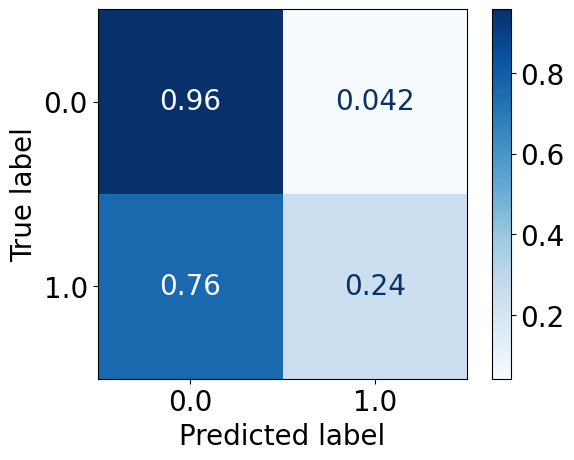

In [ ]:
pred_prob_test_2019_mlp_2021 = mlp_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_mlp_2021 = mlp_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_mlp_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_mlp_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_mlp_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_mlp_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_mlp_2021, pred_prob_test_2019_mlp_2021)

Class 1 Recall: 0.24092307692307693
Class 1 Precision: 0.5119320039228507
Class 1 Area Under Precision-Recall Curve: 0.41253146479766234
Class 1 F1-Score: 0.3276493357045716
Class 0 Recall: 0.9581499649614577
Class 0 Precision: 0.8738623581143267
Class 0 Area Under Precision-Recall Curve: 0.7212320948272943
Class 0 F1-Score: 0.9140672005990026
Overall Accuracy: 0.8476111440426793
Balanced Accuracy: 0.5995365209422673
Area Under ROC Curve: 0.8071790846854617
Matthews Correlation Coefficient: 0.2771303974533365
0.24092307692307693
0.5119320039228507
0.41253146479766234
0.3276493357045716
0.9581499649614577
0.8738623581143267
0.7212320948272943
0.9140672005990026
0.8476111440426793
0.5995365209422673
0.8071790846854617
0.2771303974533365


### Test on 2017

#### LR

accuracy 0.8562129929030362
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     40340
         1.0       0.58      0.22      0.32      7286

    accuracy                           0.86     47626
   macro avg       0.73      0.59      0.62     47626
weighted avg       0.83      0.86      0.83     47626



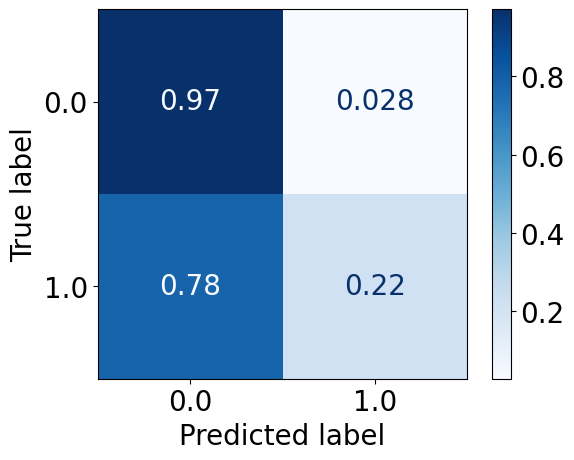

In [ ]:
pred_prob_test_2017_lr_2021 = lr_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_lr_2021 = lr_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_lr_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_lr_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_lr_2021, pred_prob_test_2017_lr_2021)

Class 1 Recall: 0.21767773812791655
Class 1 Precision: 0.5801024140453548
Class 1 Area Under Precision-Recall Curve: 0.45858829696761627
Class 1 F1-Score: 0.316566866267465
Class 0 Recall: 0.9715418939018344
Class 0 Precision: 0.8730286019780807
Class 0 Area Under Precision-Recall Curve: 0.7136599985344328
Class 0 F1-Score: 0.9196545898254177
Overall Accuracy: 0.8562129929030362
Balanced Accuracy: 0.5946098160148755
Area Under ROC Curve: 0.8259692473296225
Matthews Correlation Coefficient: 0.2928161267984085
0.21767773812791655
0.5801024140453548
0.45858829696761627
0.316566866267465
0.9715418939018344
0.8730286019780807
0.7136599985344328
0.9196545898254177
0.8562129929030362
0.5946098160148755
0.8259692473296225
0.2928161267984085


#### RF

accuracy 0.8518456305379415
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     40340
         1.0       0.55      0.18      0.27      7286

    accuracy                           0.85     47626
   macro avg       0.71      0.58      0.60     47626
weighted avg       0.82      0.85      0.82     47626



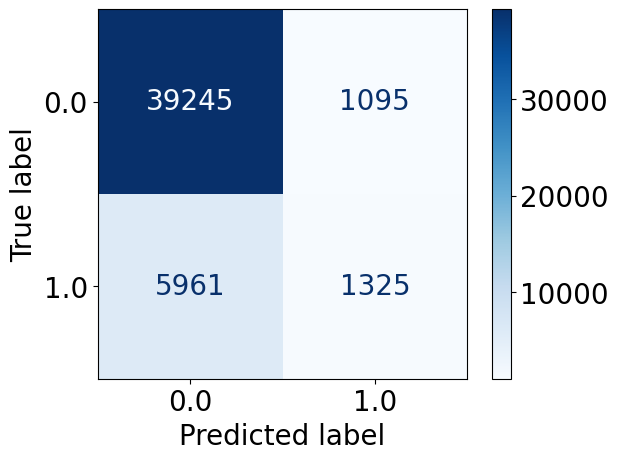

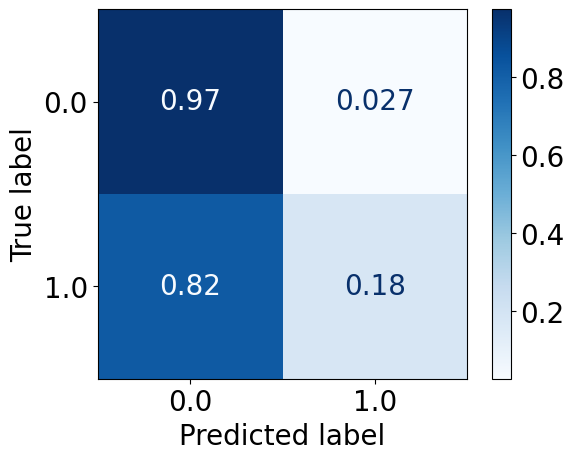

In [ ]:
pred_prob_test_2017_rf_2021 = rf_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_rf_2021 = rf_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_rf_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_rf_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_rf_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_rf_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_rf_2021, pred_prob_test_2017_rf_2021)

Class 1 Recall: 0.18185561350535273
Class 1 Precision: 0.5475206611570248
Class 1 Area Under Precision-Recall Curve: 0.4216278169589296
Class 1 F1-Score: 0.2730269936121986
Class 0 Recall: 0.9728557263262271
Class 0 Precision: 0.86813697296819
Class 0 Area Under Precision-Recall Curve: 0.7246335739466886
Class 0 F1-Score: 0.9175180604587007
Overall Accuracy: 0.8518456305379415
Balanced Accuracy: 0.5773556699157899
Area Under ROC Curve: 0.8085928780496169
Matthews Correlation Coefficient: 0.25358814934207113
0.18185561350535273
0.5475206611570248
0.4216278169589296
0.2730269936121986
0.9728557263262271
0.86813697296819
0.7246335739466886
0.9175180604587007
0.8518456305379415
0.5773556699157899
0.8085928780496169
0.25358814934207113


#### SVM

accuracy 0.7455801452987864
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     40340
         1.0       0.30      0.48      0.36      7286

    accuracy                           0.75     47626
   macro avg       0.59      0.64      0.60     47626
weighted avg       0.80      0.75      0.77     47626



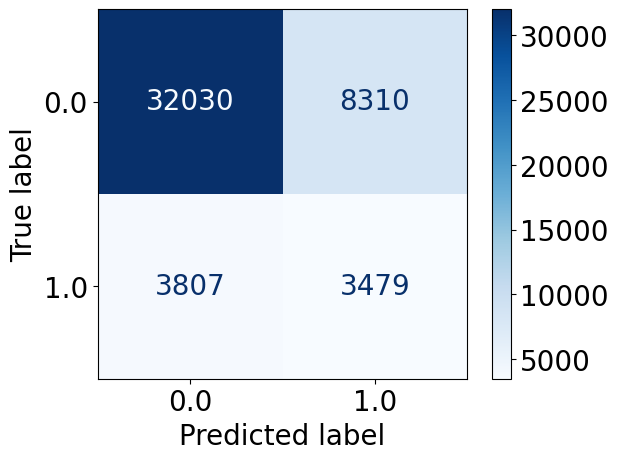

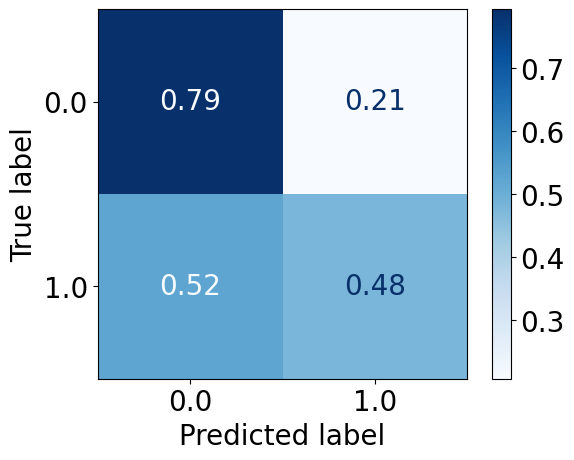

In [ ]:
pred_prob_test_2017_svm_2021 = svm_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_svm_2021 = svm_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_svm_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_svm_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_svm_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_svm_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_svm_2021, pred_prob_test_2017_svm_2021)

Class 1 Recall: 0.47749107878122427
Class 1 Precision: 0.2951056069217067
Class 1 Area Under Precision-Recall Curve: 0.29280981782215443
Class 1 F1-Score: 0.3647706422018349
Class 0 Recall: 0.7940009915716411
Class 0 Precision: 0.8937690096827301
Class 0 Area Under Precision-Recall Curve: 0.7598620988068179
Class 0 F1-Score: 0.8409362405975556
Overall Accuracy: 0.7455801452987864
Balanced Accuracy: 0.6357460351764327
Area Under ROC Curve: 0.7215349412644185
Matthews Correlation Coefficient: 0.22644637488606925
0.47749107878122427
0.2951056069217067
0.29280981782215443
0.3647706422018349
0.7940009915716411
0.8937690096827301
0.7598620988068179
0.8409362405975556
0.7455801452987864
0.6357460351764327
0.7215349412644185
0.22644637488606925


#### KNN

accuracy 0.8351110737832277
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     40340
         1.0       0.42      0.21      0.28      7286

    accuracy                           0.84     47626
   macro avg       0.65      0.58      0.60     47626
weighted avg       0.80      0.84      0.81     47626



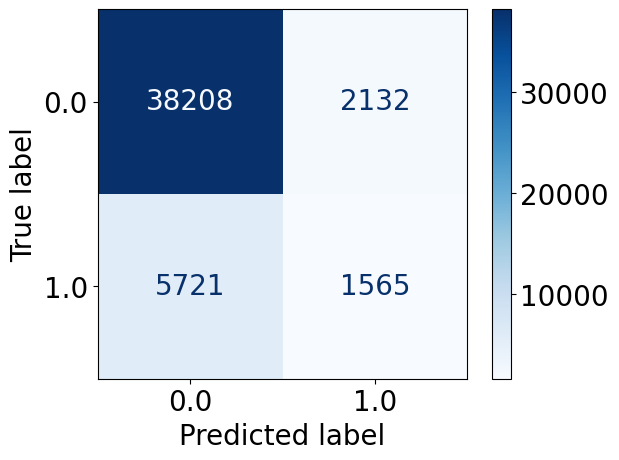

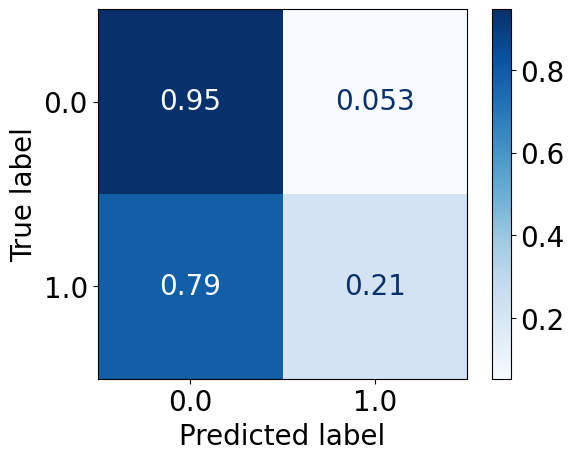

In [ ]:
pred_prob_test_2017_knn_2021 = knn_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_knn_2021 = knn_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_knn_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_knn_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_knn_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_knn_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_knn_2021, pred_prob_test_2017_knn_2021)

Class 1 Recall: 0.21479549821575625
Class 1 Precision: 0.4233162023262104
Class 1 Area Under Precision-Recall Curve: 0.2957071248343888
Class 1 F1-Score: 0.28498588728034235
Class 0 Recall: 0.9471492315319782
Class 0 Precision: 0.8697671242231783
Class 0 Area Under Precision-Recall Curve: 0.7865811250619564
Class 0 F1-Score: 0.906810333574624
Overall Accuracy: 0.8351110737832277
Balanced Accuracy: 0.5809723648738672
Area Under ROC Curve: 0.7167160116228638
Matthews Correlation Coefficient: 0.21786073558952232
0.21479549821575625
0.4233162023262104
0.2957071248343888
0.28498588728034235
0.9471492315319782
0.8697671242231783
0.7865811250619564
0.906810333574624
0.8351110737832277
0.5809723648738672
0.7167160116228638
0.21786073558952232


#### MLP

accuracy 0.849032041321967
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     40340
         1.0       0.51      0.23      0.32      7286

    accuracy                           0.85     47626
   macro avg       0.69      0.60      0.62     47626
weighted avg       0.82      0.85      0.82     47626



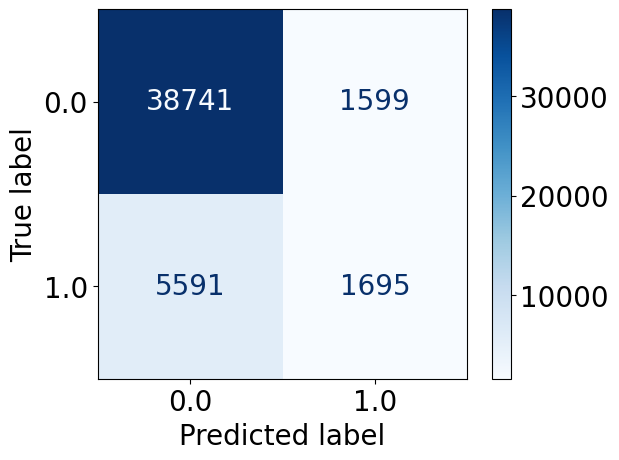

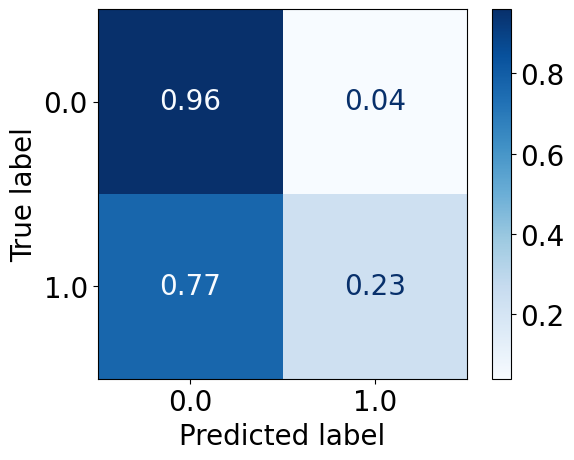

In [ ]:
pred_prob_test_2017_mlp_2021 = mlp_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_mlp_2021 = mlp_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_mlp_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_mlp_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_mlp_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_mlp_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_mlp_2021, pred_prob_test_2017_mlp_2021)

Class 1 Recall: 0.2326379357672248
Class 1 Precision: 0.5145719489981785
Class 1 Area Under Precision-Recall Curve: 0.4224983558195785
Class 1 F1-Score: 0.3204158790170132
Class 0 Recall: 0.9603619236489837
Class 0 Precision: 0.8738834250654155
Class 0 Area Under Precision-Recall Curve: 0.7204408937052572
Class 0 F1-Score: 0.915084089191232
Overall Accuracy: 0.849032041321967
Balanced Accuracy: 0.5964999297081042
Area Under ROC Curve: 0.8119484671943709
Matthews Correlation Coefficient: 0.2738098474922776
0.2326379357672248
0.5145719489981785
0.4224983558195785
0.3204158790170132
0.9603619236489837
0.8738834250654155
0.7204408937052572
0.915084089191232
0.849032041321967
0.5964999297081042
0.8119484671943709
0.2738098474922776


### Test on 2015

#### LR

accuracy 0.8562321339443714
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     37411
         1.0       0.57      0.21      0.30      6667

    accuracy                           0.86     44078
   macro avg       0.72      0.59      0.61     44078
weighted avg       0.83      0.86      0.83     44078



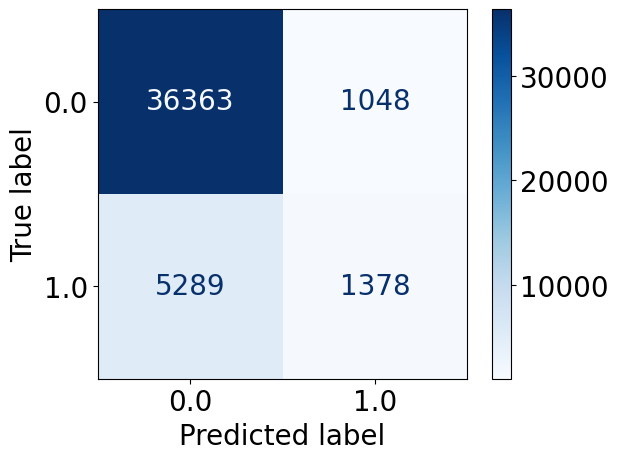

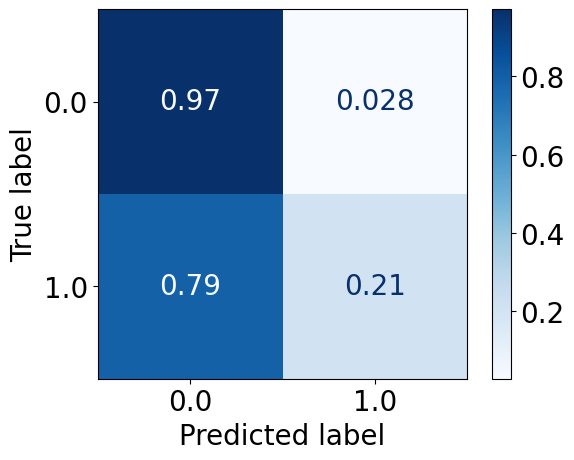

In [ ]:
pred_prob_test_2015_lr_2021 = lr_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_lr_2021 = lr_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_lr_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_lr_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_lr_2021, pred_prob_test_2015_lr_2021)

Class 1 Recall: 0.20668966551672416
Class 1 Precision: 0.5680131904369332
Class 1 Area Under Precision-Recall Curve: 0.44733113244550254
Class 1 F1-Score: 0.30309028923347625
Class 0 Recall: 0.9719868487877897
Class 0 Precision: 0.8730193027945837
Class 0 Area Under Precision-Recall Curve: 0.7178678763342189
Class 0 F1-Score: 0.9198487282293867
Overall Accuracy: 0.8562321339443714
Balanced Accuracy: 0.589338257152257
Area Under ROC Curve: 0.8225278760386378
Matthews Correlation Coefficient: 0.2807172039359835
0.20668966551672416
0.5680131904369332
0.44733113244550254
0.30309028923347625
0.9719868487877897
0.8730193027945837
0.7178678763342189
0.9198487282293867
0.8562321339443714
0.589338257152257
0.8225278760386378
0.2807172039359835


#### RF

accuracy 0.8526248922364899
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     37411
         1.0       0.54      0.19      0.28      6667

    accuracy                           0.85     44078
   macro avg       0.70      0.58      0.60     44078
weighted avg       0.82      0.85      0.82     44078



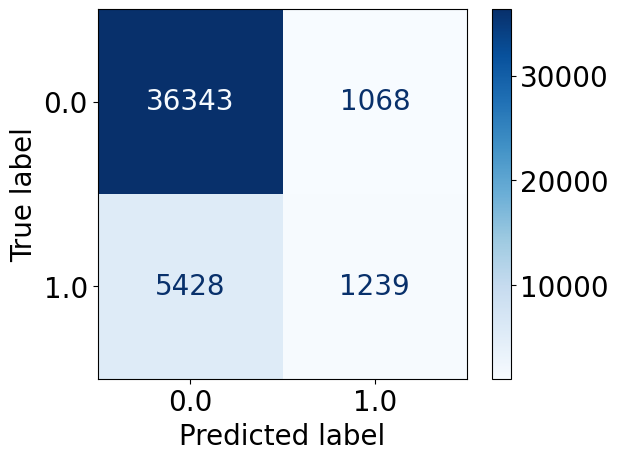

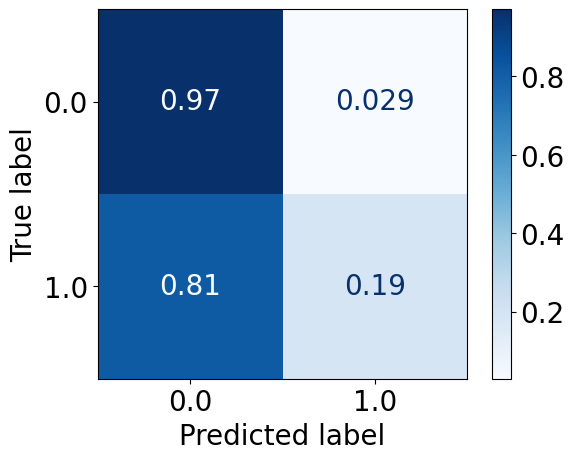

In [ ]:
pred_prob_test_2015_rf_2021 = rf_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_rf_2021 = rf_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_rf_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_rf_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_rf_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_rf_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_rf_2021, pred_prob_test_2015_rf_2021)

Class 1 Recall: 0.18584070796460178
Class 1 Precision: 0.5370611183355006
Class 1 Area Under Precision-Recall Curve: 0.40957529769743
Class 1 F1-Score: 0.2761310452418097
Class 0 Recall: 0.9714522466654193
Class 0 Precision: 0.8700533863206531
Class 0 Area Under Precision-Recall Curve: 0.7301441050450077
Class 0 F1-Score: 0.9179611527872497
Overall Accuracy: 0.8526248922364899
Balanced Accuracy: 0.5786464773150105
Area Under ROC Curve: 0.8018766479013195
Matthews Correlation Coefficient: 0.2530538348061611
0.18584070796460178
0.5370611183355006
0.40957529769743
0.2761310452418097
0.9714522466654193
0.8700533863206531
0.7301441050450077
0.9179611527872497
0.8526248922364899
0.5786464773150105
0.8018766479013195
0.2530538348061611


#### SVM

accuracy 0.7163664413085893
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82     37411
         1.0       0.28      0.57      0.38      6667

    accuracy                           0.72     44078
   macro avg       0.59      0.66      0.60     44078
weighted avg       0.81      0.72      0.75     44078



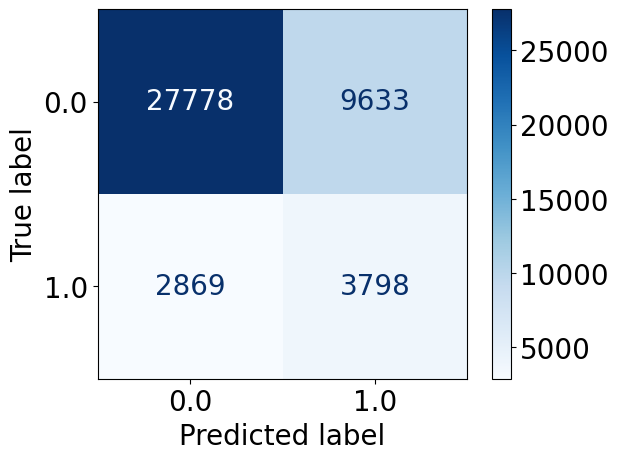

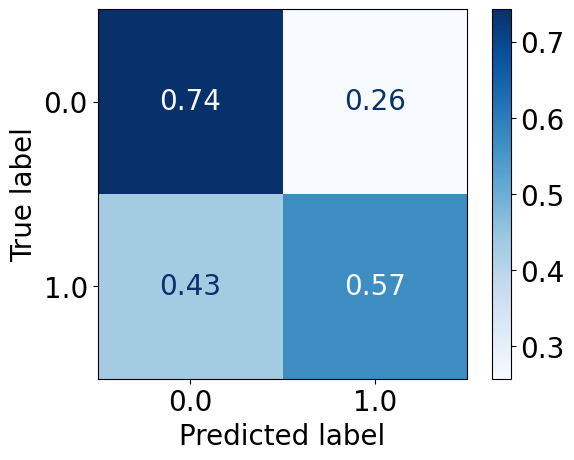

In [ ]:
pred_prob_test_2015_svm_2021 = svm_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_svm_2021 = svm_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_svm_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_svm_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_svm_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_svm_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_svm_2021, pred_prob_test_2015_svm_2021)

Class 1 Recall: 0.5696715164241788
Class 1 Precision: 0.28277864641501005
Class 1 Area Under Precision-Recall Curve: 0.2927913430071329
Class 1 F1-Score: 0.3779480545327893
Class 0 Recall: 0.7425088877602845
Class 0 Precision: 0.9063856168629882
Class 0 Area Under Precision-Recall Curve: 0.7604984119727378
Class 0 F1-Score: 0.8163037409268565
Overall Accuracy: 0.7163664413085893
Balanced Accuracy: 0.6560902020922317
Area Under ROC Curve: 0.7295331412360713
Matthews Correlation Coefficient: 0.24300900429280745
0.5696715164241788
0.28277864641501005
0.2927913430071329
0.3779480545327893
0.7425088877602845
0.9063856168629882
0.7604984119727378
0.8163037409268565
0.7163664413085893
0.6560902020922317
0.7295331412360713
0.24300900429280745


#### KNN

accuracy 0.8393756522528245
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     37411
         1.0       0.44      0.21      0.28      6667

    accuracy                           0.84     44078
   macro avg       0.65      0.58      0.60     44078
weighted avg       0.81      0.84      0.81     44078



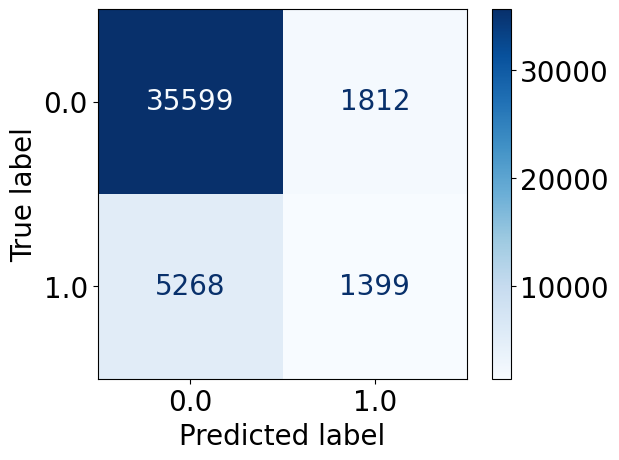

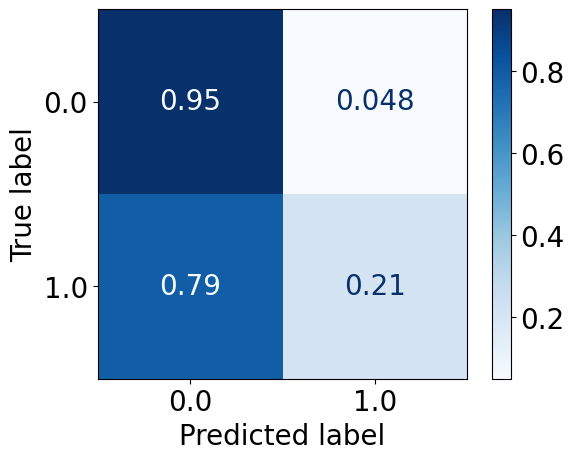

In [ ]:
pred_prob_test_2015_knn_2021 = knn_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_knn_2021 = knn_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_knn_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_knn_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_knn_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_knn_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_knn_2021, pred_prob_test_2015_knn_2021)

Class 1 Recall: 0.20983950802459878
Class 1 Precision: 0.4356898162566179
Class 1 Area Under Precision-Recall Curve: 0.2957372033188697
Class 1 F1-Score: 0.2832557197813323
Class 0 Recall: 0.9515650477132395
Class 0 Precision: 0.8710940367533707
Class 0 Area Under Precision-Recall Curve: 0.7891603983407813
Class 0 F1-Score: 0.9095531311479599
Overall Accuracy: 0.8393756522528245
Balanced Accuracy: 0.5807022778689191
Area Under ROC Curve: 0.7173394658165304
Matthews Correlation Coefficient: 0.22252260896955944
0.20983950802459878
0.4356898162566179
0.2957372033188697
0.2832557197813323
0.9515650477132395
0.8710940367533707
0.7891603983407813
0.9095531311479599
0.8393756522528245
0.5807022778689191
0.7173394658165304
0.22252260896955944


#### MLP

accuracy 0.8521711511411588
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     37411
         1.0       0.53      0.23      0.32      6667

    accuracy                           0.85     44078
   macro avg       0.70      0.60      0.62     44078
weighted avg       0.82      0.85      0.83     44078



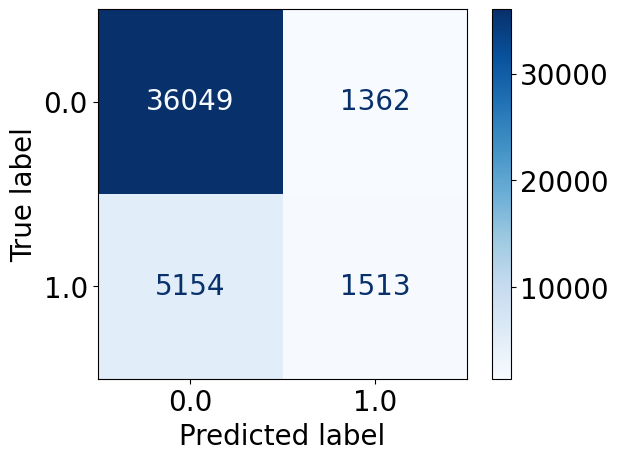

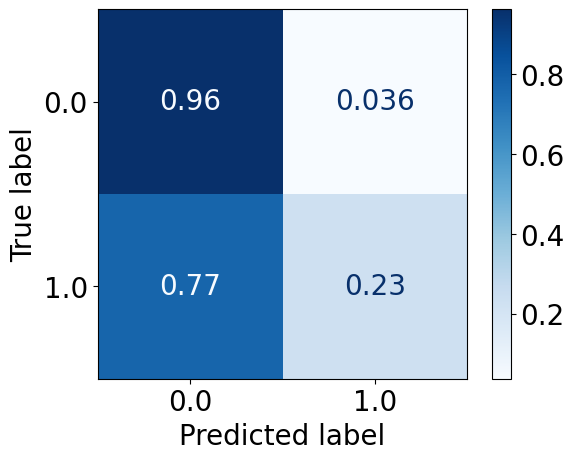

In [ ]:
pred_prob_test_2015_mlp_2021 = mlp_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_mlp_2021 = mlp_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_mlp_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_mlp_2021))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_mlp_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_mlp_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_mlp_2021, pred_prob_test_2015_mlp_2021)

Class 1 Recall: 0.22693865306734665
Class 1 Precision: 0.5262608695652173
Class 1 Area Under Precision-Recall Curve: 0.4182056911342247
Class 1 F1-Score: 0.31712429260113184
Class 0 Recall: 0.963593595466574
Class 0 Precision: 0.8749120209693468
Class 0 Area Under Precision-Recall Curve: 0.7231695941750107
Class 0 F1-Score: 0.9171140000508814
Overall Accuracy: 0.8521711511411588
Balanced Accuracy: 0.5952661242669604
Area Under ROC Curve: 0.8115892446536691
Matthews Correlation Coefficient: 0.2764712876311082
0.22693865306734665
0.5262608695652173
0.4182056911342247
0.31712429260113184
0.963593595466574
0.8749120209693468
0.7231695941750107
0.9171140000508814
0.8521711511411588
0.5952661242669604
0.8115892446536691
0.2764712876311082


## Train on balanced (undersampled) 2021 and test on other years

### Train on 2021 and test on 2021

#### LR

accuracy 0.7334865594084141
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     33912
         1.0       0.34      0.76      0.47      6116

    accuracy                           0.73     40028
   macro avg       0.64      0.74      0.64     40028
weighted avg       0.85      0.73      0.77     40028



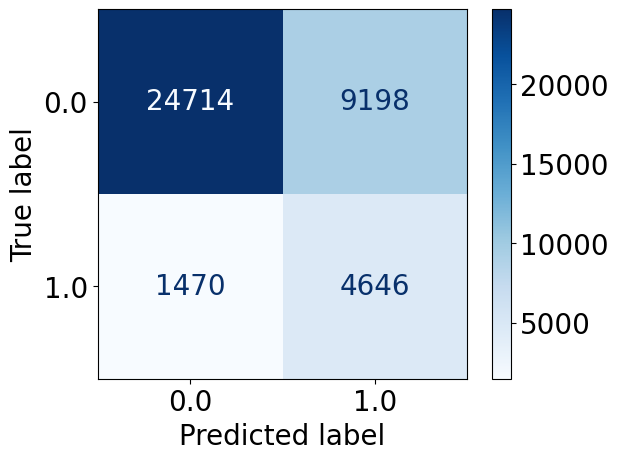

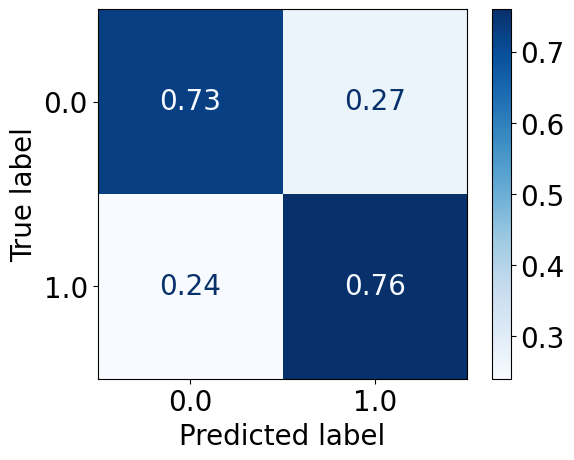

In [ ]:
lr_balanced_2021 = LogisticRegression(solver='liblinear')
lr_balanced_2021.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_lr_balanced_2021 = lr_balanced_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_balanced_2021 = lr_balanced_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_balanced_2021, pred_prob_test_2021_lr_balanced_2021)

Class 1 Recall: 0.7596468279921518
Class 1 Precision: 0.33559664836752384
Class 1 Area Under Precision-Recall Curve: 0.4491619364217376
Class 1 F1-Score: 0.4655310621242485
Class 0 Recall: 0.7287685774946921
Class 0 Precision: 0.943858845096242
Class 0 Area Under Precision-Recall Curve: 0.7154309094608715
Class 0 F1-Score: 0.8224840255591054
Overall Accuracy: 0.7334865594084141
Balanced Accuracy: 0.744207702743422
Area Under ROC Curve: 0.8235753536718975
Matthews Correlation Coefficient: 0.36944602874524346
0.7596468279921518
0.33559664836752384
0.4491619364217376
0.4655310621242485
0.7287685774946921
0.943858845096242
0.7154309094608715
0.8224840255591054
0.7334865594084141
0.744207702743422
0.8235753536718975
0.36944602874524346


#### RF

accuracy 0.7124013190766464
              precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     33912
         1.0       0.32      0.77      0.45      6116

    accuracy                           0.71     40028
   macro avg       0.63      0.74      0.63     40028
weighted avg       0.85      0.71      0.75     40028



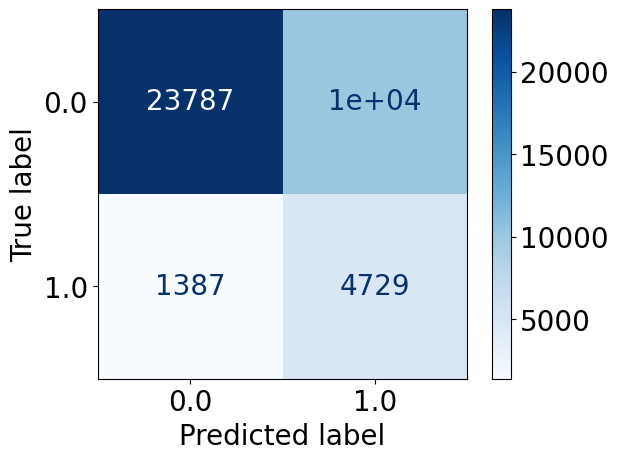

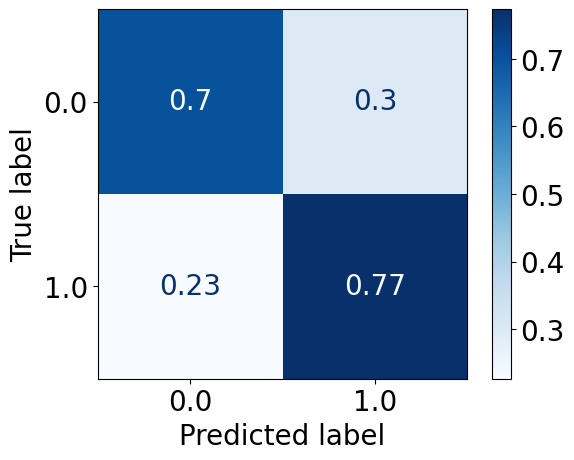

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_balanced_2021 = RandomForestClassifier()
rf_balanced_2021.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_rf_balanced_2021 = rf_balanced_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_rf_balanced_2021 = rf_balanced_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_rf_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_rf_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_rf_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_rf_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_rf_balanced_2021, pred_prob_test_2021_rf_balanced_2021)

Class 1 Recall: 0.7732177894048398
Class 1 Precision: 0.3183654234549616
Class 1 Area Under Precision-Recall Curve: 0.41797545088346455
Class 1 F1-Score: 0.4510252742012399
Class 0 Recall: 0.7014331210191083
Class 0 Precision: 0.9449034718360213
Class 0 Area Under Precision-Recall Curve: 0.7224291341015076
Class 0 F1-Score: 0.8051653521984903
Overall Accuracy: 0.7124013190766464
Balanced Accuracy: 0.737325455211974
Area Under ROC Curve: 0.8122708308936715
Matthews Correlation Coefficient: 0.3534979785460903
0.7732177894048398
0.3183654234549616
0.41797545088346455
0.4510252742012399
0.7014331210191083
0.9449034718360213
0.7224291341015076
0.8051653521984903
0.7124013190766464
0.737325455211974
0.8122708308936715
0.3534979785460903


#### SVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy 0.33129309483361646
              precision    recall  f1-score   support

         0.0       0.86      0.25      0.39     33912
         1.0       0.16      0.78      0.26      6116

    accuracy                           0.33     40028
   macro avg       0.51      0.52      0.33     40028
weighted avg       0.76      0.33      0.37     40028



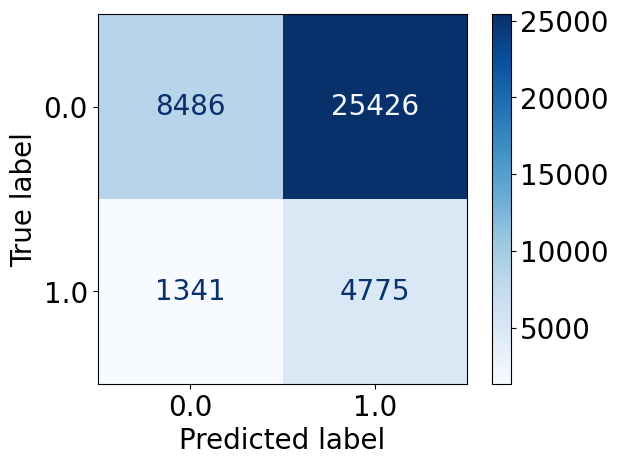

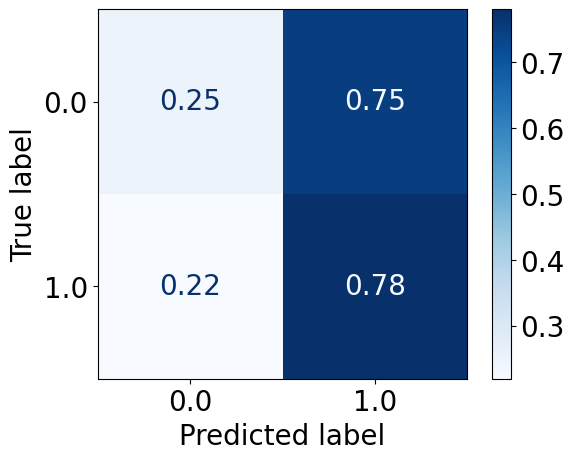

In [ ]:
from sklearn.svm import SVC

svm_balanced_2021 = SVC(probability=True, kernel='rbf', max_iter = 200)
svm_balanced_2021.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_svm_balanced_2021 = svm_balanced_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_svm_balanced_2021 = svm_balanced_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_svm_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_svm_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_svm_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_svm_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_svm_balanced_2021, pred_prob_test_2021_svm_balanced_2021)

Class 1 Recall: 0.7807390451275343
Class 1 Precision: 0.15810734743882654
Class 1 Area Under Precision-Recall Curve: 0.18312080731790964
Class 1 F1-Score: 0.26296224908445087
Class 0 Recall: 0.2502359046945034
Class 0 Precision: 0.8635392286557444
Class 0 Area Under Precision-Recall Curve: 0.8224810430441313
Class 0 F1-Score: 0.3880289901460939
Overall Accuracy: 0.33129309483361646
Balanced Accuracy: 0.5154874749110189
Area Under ROC Curve: 0.5444720222663791
Matthews Correlation Coefficient: 0.025894045808800444
0.7807390451275343
0.15810734743882654
0.18312080731790964
0.26296224908445087
0.2502359046945034
0.8635392286557444
0.8224810430441313
0.3880289901460939
0.33129309483361646
0.5154874749110189
0.5444720222663791
0.025894045808800444


#### KNN

accuracy 0.7718097331867693
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86     33912
         1.0       0.34      0.53      0.42      6116

    accuracy                           0.77     40028
   macro avg       0.62      0.67      0.64     40028
weighted avg       0.82      0.77      0.79     40028



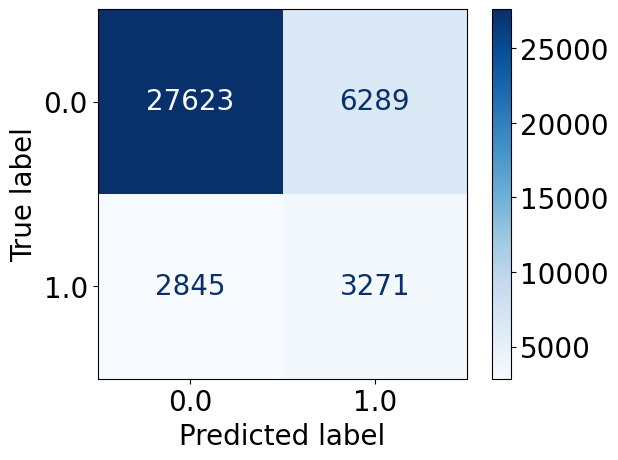

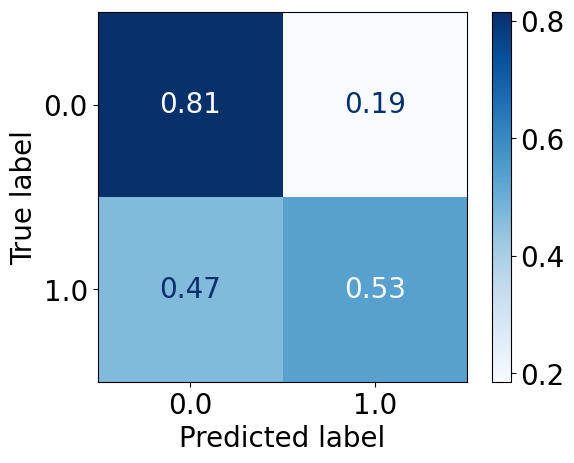

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_balanced_2021 = KNeighborsClassifier(n_neighbors=5)
knn_balanced_2021.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_knn_balanced_2021 = knn_balanced_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_knn_balanced_2021 = knn_balanced_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_knn_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_knn_balanced_2021))


ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_knn_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_knn_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_knn_balanced_2021, pred_prob_test_2021_knn_balanced_2021)

Class 1 Recall: 0.5348266841072596
Class 1 Precision: 0.3421548117154812
Class 1 Area Under Precision-Recall Curve: 0.31648718286092736
Class 1 F1-Score: 0.4173258484307221
Class 0 Recall: 0.8145494220334984
Class 0 Precision: 0.9066233425233031
Class 0 Area Under Precision-Recall Curve: 0.7704007621790431
Class 0 F1-Score: 0.8581236408822616
Overall Accuracy: 0.7718097331867693
Balanced Accuracy: 0.674688053070379
Area Under ROC Curve: 0.7495796308330676
Matthews Correlation Coefficient: 0.2948171345441635
0.5348266841072596
0.3421548117154812
0.31648718286092736
0.4173258484307221
0.8145494220334984
0.9066233425233031
0.7704007621790431
0.8581236408822616
0.7718097331867693
0.674688053070379
0.7495796308330676
0.2948171345441635


#### MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy 0.7159488358149295
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     33912
         1.0       0.32      0.74      0.44      6116

    accuracy                           0.72     40028
   macro avg       0.63      0.73      0.63     40028
weighted avg       0.84      0.72      0.75     40028



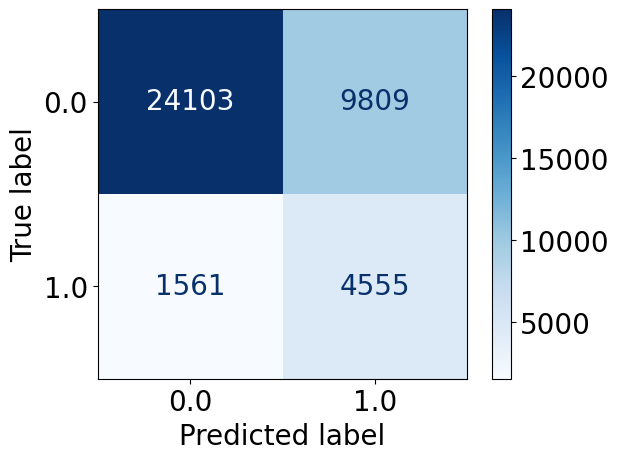

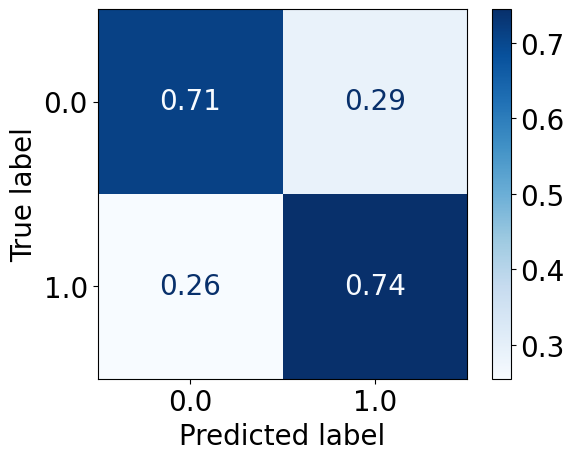

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_balanced_2021= MLPClassifier()
mlp_balanced_2021.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_mlp_balanced_2021 = mlp_balanced_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_mlp_balanced_2021 = mlp_balanced_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_mlp_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_mlp_balanced_2021))

plt.rcParams['font.size'] = 20
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_mlp_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_mlp_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_mlp_balanced_2021, pred_prob_test_2021_mlp_balanced_2021)

Class 1 Recall: 0.763407455853499
Class 1 Precision: 0.3177919956438878
Class 1 Area Under Precision-Recall Curve: 0.4053216247665401
Class 1 F1-Score: 0.44876970396001536
Class 0 Recall: 0.7044409058740269
Class 0 Precision: 0.9428875907799179
Class 0 Area Under Precision-Recall Curve: 0.7242334895962029
Class 0 F1-Score: 0.8064069673237915
Overall Accuracy: 0.7134505845907865
Balanced Accuracy: 0.7339241808637629
Area Under ROC Curve: 0.8059274183625499
Matthews Correlation Coefficient: 0.3492255967769065
0.763407455853499
0.3177919956438878
0.4053216247665401
0.44876970396001536
0.7044409058740269
0.9428875907799179
0.7242334895962029
0.8064069673237915
0.7134505845907865
0.7339241808637629
0.8059274183625499
0.3492255967769065


#### Feature Importance

##### Subgroup performance

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_mlp_balanced_2021, pred_prob_test_2021_mlp_balanced_2021)

Class 1 Recall: 0.7205689993459777
Class 1 Precision: 0.32969252637091345
Class 1 Area Under Precision-Recall Curve: 0.39554524964794013
Class 1 F1-Score: 0.45239439511368884
Class 0 Recall: 0.7357867421561689
Class 0 Precision: 0.9358988785116837
Class 0 Area Under Precision-Recall Curve: 0.7255480912806686
Class 0 F1-Score: 0.8238654185858385
Overall Accuracy: 0.7334615768961726
Balanced Accuracy: 0.7281778707510733
Area Under ROC Curve: 0.8071202442601024
Matthews Correlation Coefficient: 0.34814388191061824
0.7205689993459777
0.32969252637091345
0.39554524964794013
0.45239439511368884
0.7357867421561689
0.9358988785116837
0.7255480912806686
0.8238654185858385
0.7334615768961726
0.7281778707510733
0.8071202442601024
0.34814388191061824


In [ ]:
test = df_train_2021_balanced.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_2021.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.7859407625087
Class 1 Precision: 0.775150636869804
Class 1 Area Under Precision-Recall Curve: 0.8580251514394005
Class 1 F1-Score: 0.7805084094923586
Class 0 Recall: 0.746974508625869
Class 0 Precision: 0.7586958416877343
Class 0 Area Under Precision-Recall Curve: 0.30742562189092815
Class 0 F1-Score: 0.7527895510768965
Overall Accuracy: 0.7674721340818486
Balanced Accuracy: 0.7664576355672845
Area Under ROC Curve: 0.8527972037742617
Matthews Correlation Coefficient: 0.5333806716264898
0.7859407625087
0.775150636869804
0.8580251514394005
0.7805084094923586
0.746974508625869
0.7586958416877343
0.30742562189092815
0.7527895510768965
0.7674721340818486
0.7664576355672845
0.8527972037742617
0.5333806716264898
Class 1 Recall: 0.742983125582973
Class 1 Precision: 0.7911512415349887
Class 1 Area Under Precision-Recall Curve: 0.8575870594529214
Class 1 F1-Score: 0.76631100227392
Class 0 Recall: 0.8230704505469287
Class 0 Precision: 0.7802189833949678
Class 0 Area Under Precis

In [ ]:
test = df_test_2021.copy()

for i in range(1,3):
  test_group = test[test.Sex == i]

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()

  pred_test_group = mlp_balanced_2021.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)

Class 1 Recall: 0.7647058823529411
Class 1 Precision: 0.32269503546099293
Class 1 Area Under Precision-Recall Curve: 0.40586716584151616
Class 1 F1-Score: 0.4538653366583541
Class 0 Recall: 0.6762915071244743
Class 0 Precision: 0.9344319167389419
Class 0 Area Under Precision-Recall Curve: 0.7087521129016203
Class 0 F1-Score: 0.7846764502385201
Overall Accuracy: 0.6911303802758044
Balanced Accuracy: 0.7204986947387078
Area Under ROC Curve: 0.7943025695760837
Matthews Correlation Coefficient: 0.336737753577551
0.7647058823529411
0.32269503546099293
0.40586716584151616
0.4538653366583541
0.6762915071244743
0.9344319167389419
0.7087521129016203
0.7846764502385201
0.6911303802758044
0.7204986947387078
0.7943025695760837
0.336737753577551
Class 1 Recall: 0.7227006544953496
Class 1 Precision: 0.3108148148148148
Class 1 Area Under Precision-Recall Curve: 0.3859638407246647
Class 1 F1-Score: 0.43468351807728167
Class 0 Recall: 0.7412824648239809
Class 0 Precision: 0.943045139380218
Class 0 Area

In [ ]:
test = df_train_2021_balanced.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_2021.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7346871749958946
Class 1 Precision: 0.7693454086896709
Class 1 Area Under Precision-Recall Curve: 0.8360634796251487
Class 1 F1-Score: 0.7516169676606467
Class 0 Recall: 0.798164217284446
Class 0 Precision: 0.7665221579961464
Class 0 Area Under Precision-Recall Curve: 0.3463144560678306
Class 0 F1-Score: 0.7820232449566307
Overall Accuracy: 0.7678113385332147
Balanced Accuracy: 0.7664256961401703
Area Under ROC Curve: 0.8550670077930329
Matthews Correlation Coefficient: 0.5343573513917592
0.7346871749958946
0.7693454086896709
0.8360634796251487
0.7516169676606467
0.798164217284446
0.7665221579961464
0.3463144560678306
0.7820232449566307
0.7678113385332147
0.7664256961401703
0.8550670077930329
0.5343573513917592
============================  Black ============================ 
Class 1 Recall: 0.8701447067783702
Class 1 Precision: 0.8045774647887324
Class 1 Area Under Precision-Recall Curve: 0.90348675088

In [ ]:
test = df_test_2021.copy()

race_list = ['White', 'Black','American Indian', 'Asian', 'Native Hawaiian',
             'Other race', 'Multiracial', 'Hispanic']

for i in race_list:
  test_group = test[test.Race == i]
  print("============================ ", i , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_2021.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  White ============================ 
Class 1 Recall: 0.7267247153382451
Class 1 Precision: 0.304946599213041
Class 1 Area Under Precision-Recall Curve: 0.3814120002347199
Class 1 F1-Score: 0.4296178974460502
Class 0 Recall: 0.727942794279428
Class 0 Precision: 0.9419217081850534
Class 0 Area Under Precision-Recall Curve: 0.7419704909919059
Class 0 F1-Score: 0.8212224635432828
Overall Accuracy: 0.7277709534158556
Balanced Accuracy: 0.7273337548088366
Area Under ROC Curve: 0.8059973147720368
Matthews Correlation Coefficient: 0.3350268623979602
0.7267247153382451
0.304946599213041
0.3814120002347199
0.4296178974460502
0.727942794279428
0.9419217081850534
0.7419704909919059
0.8212224635432828
0.7277709534158556
0.7273337548088366
0.8059973147720368
0.3350268623979602
============================  Black ============================ 
Class 1 Recall: 0.8541996830427893
Class 1 Precision: 0.35909393737508327
Class 1 Area Under Precision-Recall Curve: 0.465972743451

In [ ]:
test = df_train_2021_balanced.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_2021.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.5057915057915058
Class 1 Precision: 0.7987804878048781
Class 1 Area Under Precision-Recall Curve: 0.7159789878795442
Class 1 F1-Score: 0.619385342789598
Class 0 Recall: 0.9786821705426356
Class 0 Precision: 0.9220937309799148
Class 0 Area Under Precision-Recall Curve: 0.6969567444223885
Class 0 F1-Score: 0.9495455969915387
Overall Accuracy: 0.9109020475926951
Balanced Accuracy: 0.7422368381670708
Area Under ROC Curve: 0.9036918978779444
Matthews Correlation Coefficient: 0.5909691895092085
0.5057915057915058
0.7987804878048781
0.7159789878795442
0.619385342789598
0.9786821705426356
0.9220937309799148
0.6969567444223885
0.9495455969915387
0.9109020475926951
0.7422368381670708
0.9036918978779444
0.5909691895092085
============================  35-39 ============================ 
Class 1 Recall: 0.5785123966942148
Class 1 Precision: 0.8259587020648967
Class 1 Area Under Precision-Recall Curve: 0.79675177805

In [ ]:
test = df_test_2021.copy()

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
             7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
             11: '70-74', 12: '75-79', 13: '80-99'}

for i in age_group.keys():
  test_group = test[test.Age == i]
  print("============================ ", age_group[i] , "============================ ")

  X_test_group = test_group.drop(['Diabetes', 'Race'],axis=1)
  y_test_group = test_group['Diabetes']
  y_test_group = y_test_group.to_numpy()


  pred_test_group = mlp_balanced_2021.predict(X_test_group)
  pred_prob_test_group = mlp_balanced_2021.predict_proba(X_test_group)[:, 1]

  performace_metrix(y_test_group, pred_test_group, pred_prob_test_group)


============================  30-34 ============================ 
Class 1 Recall: 0.38461538461538464
Class 1 Precision: 0.15060240963855423
Class 1 Area Under Precision-Recall Curve: 0.14867526793412525
Class 1 F1-Score: 0.21645021645021645
Class 0 Recall: 0.9380219780219781
Class 0 Precision: 0.9816007359705612
Class 0 Area Under Precision-Recall Curve: 0.9335329547371757
Class 0 F1-Score: 0.9593167003821084
Overall Accuracy: 0.9226495726495727
Balanced Accuracy: 0.6613186813186813
Area Under ROC Curve: 0.8257852916314455
Matthews Correlation Coefficient: 0.20652765972549106
0.38461538461538464
0.15060240963855423
0.14867526793412525
0.21645021645021645
0.9380219780219781
0.9816007359705612
0.9335329547371757
0.9593167003821084
0.9226495726495727
0.6613186813186813
0.8257852916314455
0.20652765972549106
============================  35-39 ============================ 
Class 1 Recall: 0.4326923076923077
Class 1 Precision: 0.1485148514851485
Class 1 Area Under Precision-Recall Curve: 0

### Test on 2019

#### LR

accuracy 0.7228215767634855
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     35675
         1.0       0.33      0.78      0.46      6500

    accuracy                           0.72     42175
   macro avg       0.64      0.74      0.64     42175
weighted avg       0.85      0.72      0.76     42175



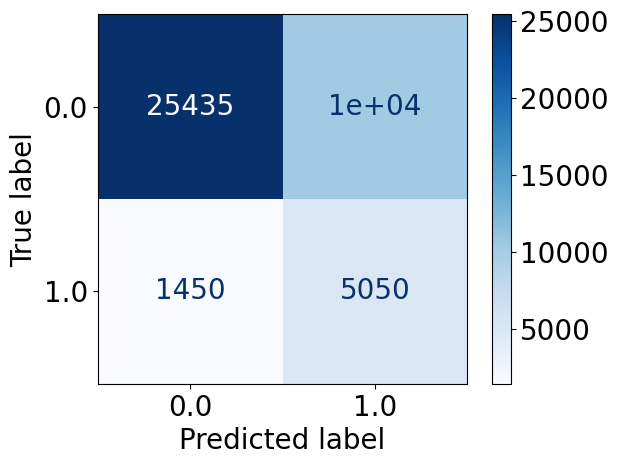

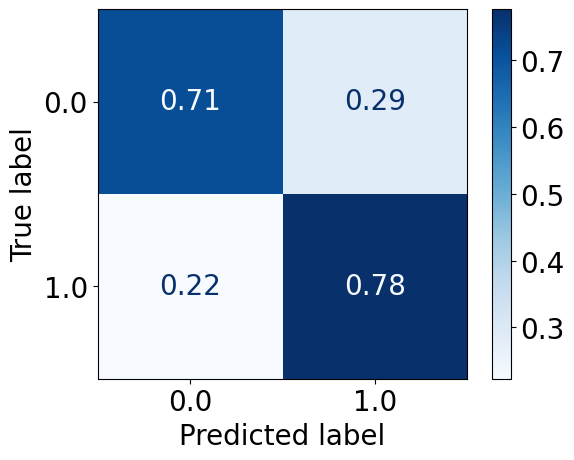

In [ ]:
pred_prob_test_2019_lr_balanced_2021 = lr_balanced_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_lr_balanced_2021 = lr_balanced_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_lr_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_lr_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_lr_balanced_2021, pred_prob_test_2019_lr_balanced_2021)

Class 1 Recall: 0.7769230769230769
Class 1 Precision: 0.3302812295618051
Class 1 Area Under Precision-Recall Curve: 0.4484897089029282
Class 1 F1-Score: 0.46351537402478205
Class 0 Recall: 0.7129642606867554
Class 0 Precision: 0.946066579877255
Class 0 Area Under Precision-Recall Curve: 0.7140716755314573
Class 0 F1-Score: 0.8131393861892584
Overall Accuracy: 0.7228215767634855
Balanced Accuracy: 0.7449436688049162
Area Under ROC Curve: 0.8226803169640451
Matthews Correlation Coefficient: 0.36793925126358895
0.7769230769230769
0.3302812295618051
0.4484897089029282
0.46351537402478205
0.7129642606867554
0.946066579877255
0.7140716755314573
0.8131393861892584
0.7228215767634855
0.7449436688049162
0.8226803169640451
0.36793925126358895


#### RF

accuracy 0.6980438648488441
              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     35675
         1.0       0.31      0.80      0.45      6500

    accuracy                           0.70     42175
   macro avg       0.63      0.74      0.62     42175
weighted avg       0.85      0.70      0.74     42175



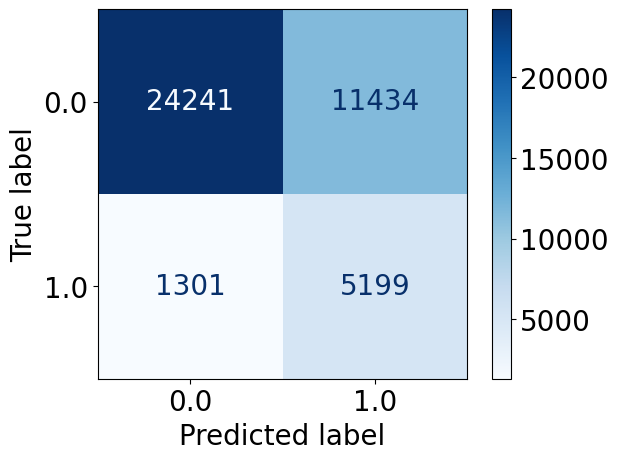

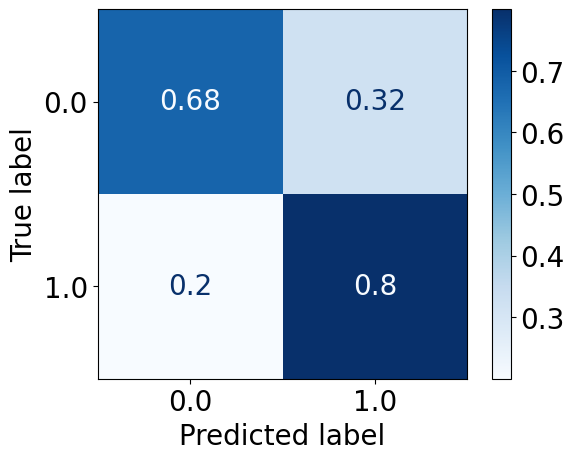

In [ ]:
pred_prob_test_2019_rf_balanced_2021 = rf_balanced_2021.predict_proba(X_test_2019)[:, 1]

pred_test_2019_rf_balanced_2021 = rf_balanced_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_rf_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_rf_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_rf_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_rf_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_rf_balanced_2021, pred_prob_test_2019_rf_balanced_2021)

Class 1 Recall: 0.7998461538461539
Class 1 Precision: 0.31257139421631697
Class 1 Area Under Precision-Recall Curve: 0.414432212904678
Class 1 F1-Score: 0.4494877447801842
Class 0 Recall: 0.6794954449894884
Class 0 Precision: 0.9490642862735886
Class 0 Area Under Precision-Recall Curve: 0.7215523792270384
Class 0 F1-Score: 0.7919695509417318
Overall Accuracy: 0.6980438648488441
Balanced Accuracy: 0.7396707994178211
Area Under ROC Curve: 0.8118887369953102
Matthews Correlation Coefficient: 0.3541367891062472
0.7998461538461539
0.31257139421631697
0.414432212904678
0.4494877447801842
0.6794954449894884
0.9490642862735886
0.7215523792270384
0.7919695509417318
0.6980438648488441
0.7396707994178211
0.8118887369953102
0.3541367891062472


#### SVM

accuracy 0.4105275637225845
              precision    recall  f1-score   support

         0.0       0.85      0.37      0.51     35675
         1.0       0.16      0.64      0.25      6500

    accuracy                           0.41     42175
   macro avg       0.50      0.50      0.38     42175
weighted avg       0.74      0.41      0.47     42175



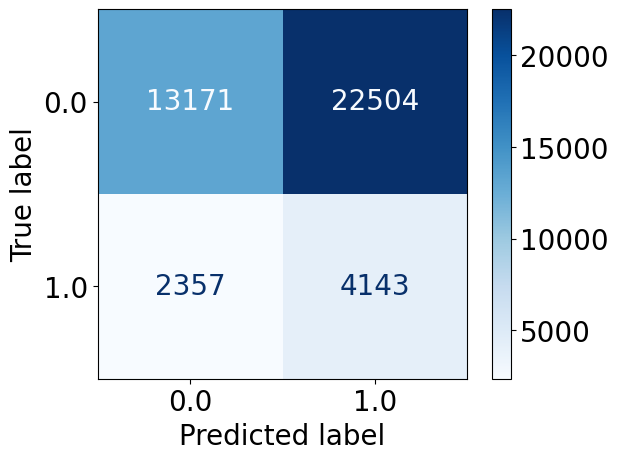

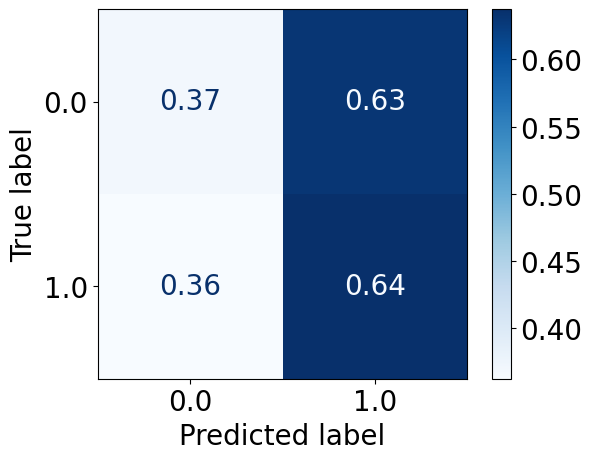

In [ ]:
pred_prob_test_2019_svm_balanced_2021 = svm_balanced_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_svm_balanced_2021 = svm_balanced_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_svm_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_svm_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_svm_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_svm_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_svm_balanced_2021, pred_prob_test_2019_svm_balanced_2021)

Class 1 Recall: 0.6373846153846154
Class 1 Precision: 0.15547716440875145
Class 1 Area Under Precision-Recall Curve: 0.1756159739432656
Class 1 F1-Score: 0.2499773735179654
Class 0 Recall: 0.36919411352487735
Class 0 Precision: 0.8482096857290057
Class 0 Area Under Precision-Recall Curve: 0.8296720144531345
Class 0 F1-Score: 0.5144620432396539
Overall Accuracy: 0.4105275637225845
Balanced Accuracy: 0.5032893644547464
Area Under ROC Curve: 0.5157659619427524
Matthews Correlation Coefficient: 0.004924914982639812
0.6373846153846154
0.15547716440875145
0.1756159739432656
0.2499773735179654
0.36919411352487735
0.8482096857290057
0.8296720144531345
0.5144620432396539
0.4105275637225845
0.5032893644547464
0.5157659619427524
0.004924914982639812


#### KNN

accuracy 0.736597510373444
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83     35675
         1.0       0.31      0.59      0.41      6500

    accuracy                           0.74     42175
   macro avg       0.61      0.68      0.62     42175
weighted avg       0.82      0.74      0.77     42175



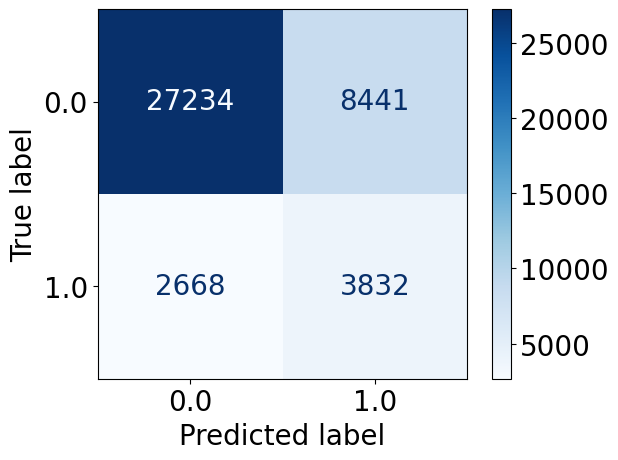

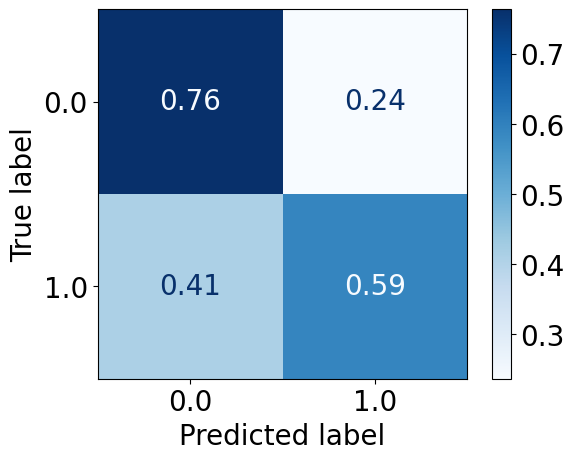

In [ ]:
pred_prob_test_2019_knn_balanced_2021 = knn_balanced_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_knn_balanced_2021 = knn_balanced_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_knn_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_knn_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_knn_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_knn_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_knn_balanced_2021, pred_prob_test_2019_knn_balanced_2021)

Class 1 Recall: 0.5895384615384616
Class 1 Precision: 0.3122300985904017
Class 1 Area Under Precision-Recall Curve: 0.300671781930901
Class 1 F1-Score: 0.4082458850476749
Class 0 Recall: 0.7633917309039944
Class 0 Precision: 0.9107751989833456
Class 0 Area Under Precision-Recall Curve: 0.7704586513790015
Class 0 F1-Score: 0.8305960931424127
Overall Accuracy: 0.736597510373444
Balanced Accuracy: 0.676465096221228
Area Under ROC Curve: 0.7408540132607406
Matthews Correlation Coefficient: 0.2805446534660566
0.5895384615384616
0.3122300985904017
0.300671781930901
0.4082458850476749
0.7633917309039944
0.9107751989833456
0.7704586513790015
0.8305960931424127
0.736597510373444
0.676465096221228
0.7408540132607406
0.2805446534660566


#### MLP

accuracy 0.6925666864256076
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     35675
         1.0       0.30      0.76      0.43      6500

    accuracy                           0.69     42175
   macro avg       0.62      0.72      0.61     42175
weighted avg       0.84      0.69      0.73     42175



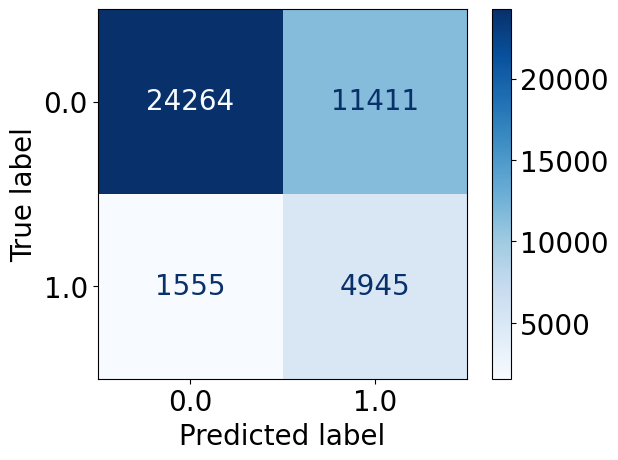

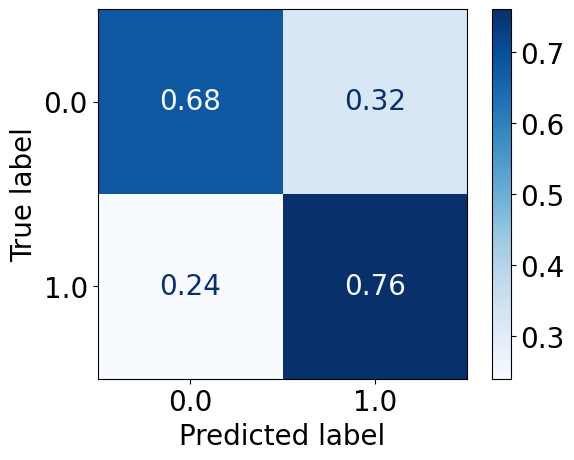

In [ ]:
pred_prob_test_2019_mlp_balanced_2021 = mlp_balanced_2021.predict_proba(X_test_2019)[:, 1]
pred_test_2019_mlp_balanced_2021 = mlp_balanced_2021.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_mlp_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_mlp_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_mlp_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_mlp_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_mlp_balanced_2021, pred_prob_test_2019_mlp_balanced_2021)

Class 1 Recall: 0.7607692307692308
Class 1 Precision: 0.30233553436047933
Class 1 Area Under Precision-Recall Curve: 0.36885078570109836
Class 1 F1-Score: 0.43270913545677286
Class 0 Recall: 0.6801401541695865
Class 0 Precision: 0.9397730353615554
Class 0 Area Under Precision-Recall Curve: 0.7310911363524575
Class 0 F1-Score: 0.7891501609913163
Overall Accuracy: 0.6925666864256076
Balanced Accuracy: 0.7204546924694086
Area Under ROC Curve: 0.7920938342946472
Matthews Correlation Coefficient: 0.3267230334160099
0.7607692307692308
0.30233553436047933
0.36885078570109836
0.43270913545677286
0.6801401541695865
0.9397730353615554
0.7310911363524575
0.7891501609913163
0.6925666864256076
0.7204546924694086
0.7920938342946472
0.3267230334160099


### Test on 2017

#### LR

accuracy 0.7358795615840087
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     40340
         1.0       0.34      0.77      0.47      7286

    accuracy                           0.74     47626
   macro avg       0.64      0.75      0.65     47626
weighted avg       0.85      0.74      0.77     47626



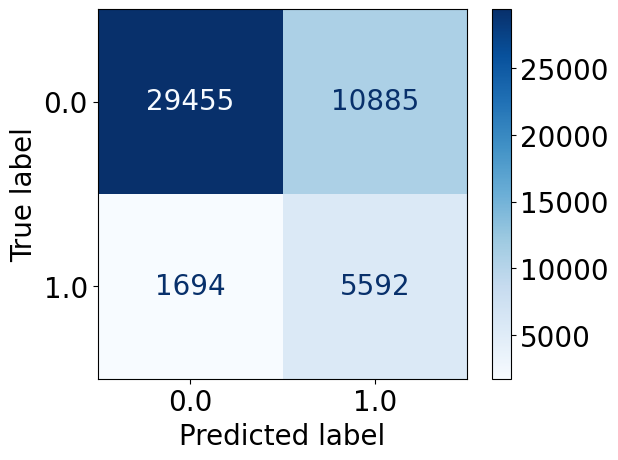

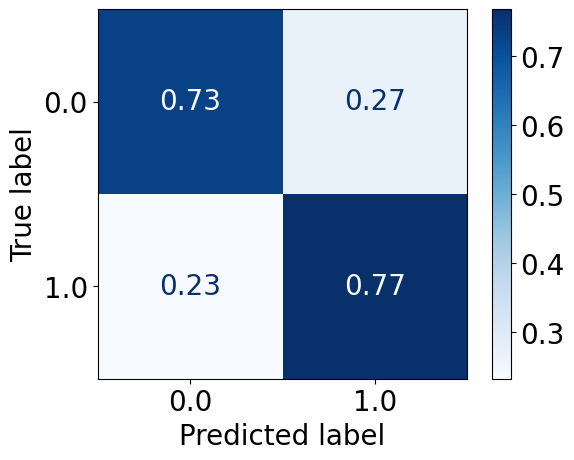

In [ ]:
pred_prob_test_2017_lr_balanced_2021 = lr_balanced_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_lr_balanced_2021 = lr_balanced_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_lr_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_lr_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_lr_balanced_2021, pred_prob_test_2017_lr_balanced_2021)

Class 1 Recall: 0.7674993137524019
Class 1 Precision: 0.33938216908417795
Class 1 Area Under Precision-Recall Curve: 0.4556889836805019
Class 1 F1-Score: 0.4706476454993057
Class 0 Recall: 0.7301685671789787
Class 0 Precision: 0.9456162316607275
Class 0 Area Under Precision-Recall Curve: 0.714006432599249
Class 0 F1-Score: 0.8240428597406595
Overall Accuracy: 0.7358795615840087
Balanced Accuracy: 0.7488339404656903
Area Under ROC Curve: 0.8258647995605838
Matthews Correlation Coefficient: 0.3766092805117121
0.7674993137524019
0.33938216908417795
0.4556889836805019
0.4706476454993057
0.7301685671789787
0.9456162316607275
0.714006432599249
0.8240428597406595
0.7358795615840087
0.7488339404656903
0.8258647995605838
0.3766092805117121


#### RF

accuracy 0.7066308318985428
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80     40340
         1.0       0.32      0.79      0.45      7286

    accuracy                           0.71     47626
   macro avg       0.63      0.74      0.63     47626
weighted avg       0.85      0.71      0.75     47626



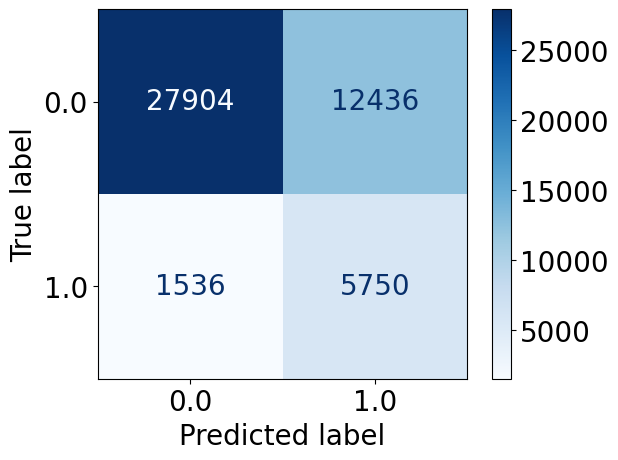

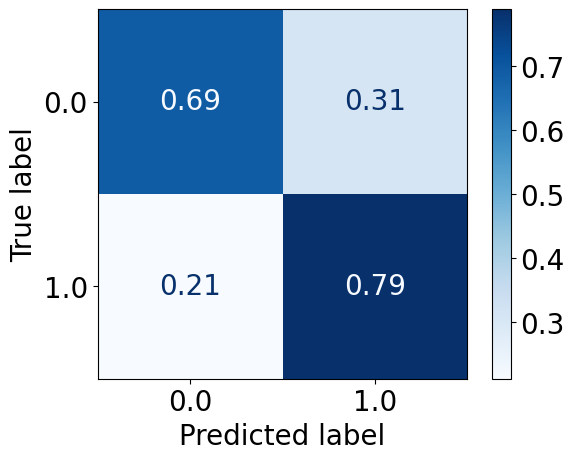

In [ ]:
pred_prob_test_2017_rf_balanced_2021 = rf_balanced_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_rf_balanced_2021 = rf_balanced_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_rf_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_rf_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_rf_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_rf_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_rf_balanced_2021, pred_prob_test_2017_rf_balanced_2021)

Class 1 Recall: 0.7891847378534175
Class 1 Precision: 0.3161772792257781
Class 1 Area Under Precision-Recall Curve: 0.42645496388928694
Class 1 F1-Score: 0.45147613065326636
Class 0 Recall: 0.6917203767972236
Class 0 Precision: 0.9478260869565217
Class 0 Area Under Precision-Recall Curve: 0.7207797784409757
Class 0 F1-Score: 0.7997707079392377
Overall Accuracy: 0.7066308318985428
Balanced Accuracy: 0.7404525573253206
Area Under ROC Curve: 0.8162755526011336
Matthews Correlation Coefficient: 0.3563152664173317
0.7891847378534175
0.3161772792257781
0.42645496388928694
0.45147613065326636
0.6917203767972236
0.9478260869565217
0.7207797784409757
0.7997707079392377
0.7066308318985428
0.7404525573253206
0.8162755526011336
0.3563152664173317


#### SVM

accuracy 0.4123587956158401
              precision    recall  f1-score   support

         0.0       0.85      0.37      0.52     40340
         1.0       0.15      0.63      0.25      7286

    accuracy                           0.41     47626
   macro avg       0.50      0.50      0.38     47626
weighted avg       0.74      0.41      0.48     47626



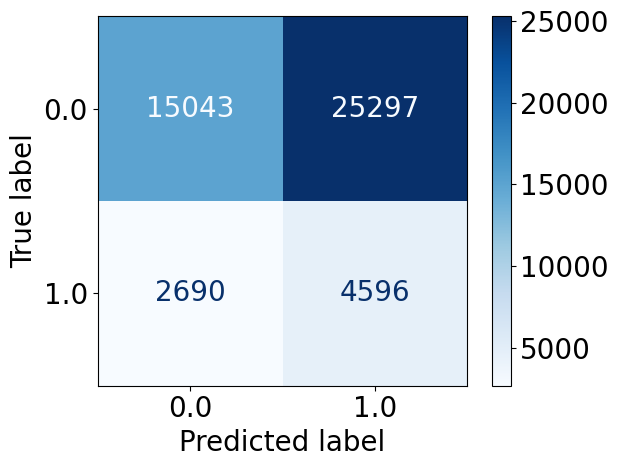

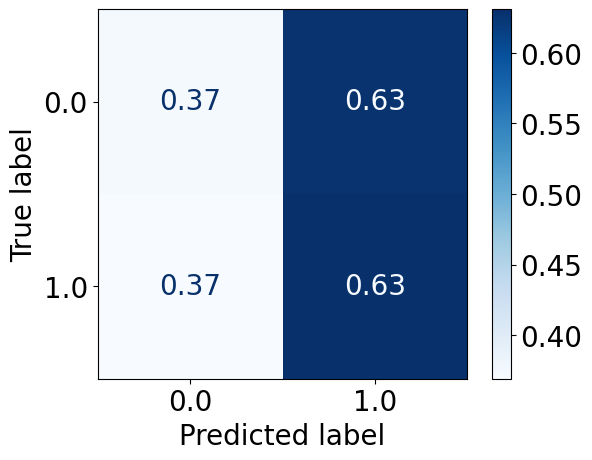

In [ ]:
pred_prob_test_2017_svm_balanced_2021 = svm_balanced_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_svm_balanced_2021 = svm_balanced_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_svm_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_svm_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_svm_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_svm_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_svm_balanced_2021, pred_prob_test_2017_svm_balanced_2021)

Class 1 Recall: 0.6307987922042273
Class 1 Precision: 0.15374836918342086
Class 1 Area Under Precision-Recall Curve: 0.17322854447168812
Class 1 F1-Score: 0.24723634309690956
Class 0 Recall: 0.3729053049082796
Class 0 Precision: 0.8483054192747984
Class 0 Area Under Precision-Recall Curve: 0.8313334882771058
Class 0 F1-Score: 0.5180720816902864
Overall Accuracy: 0.4123587956158401
Balanced Accuracy: 0.5018520485562534
Area Under ROC Curve: 0.51503995648571
Matthews Correlation Coefficient: 0.0027581573373884963
0.6307987922042273
0.15374836918342086
0.17322854447168812
0.24723634309690956
0.3729053049082796
0.8483054192747984
0.8313334882771058
0.5180720816902864
0.4123587956158401
0.5018520485562534
0.51503995648571
0.0027581573373884963


#### KNN

accuracy 0.7438583966740856
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.84     40340
         1.0       0.32      0.59      0.41      7286

    accuracy                           0.74     47626
   macro avg       0.62      0.68      0.63     47626
weighted avg       0.82      0.74      0.77     47626



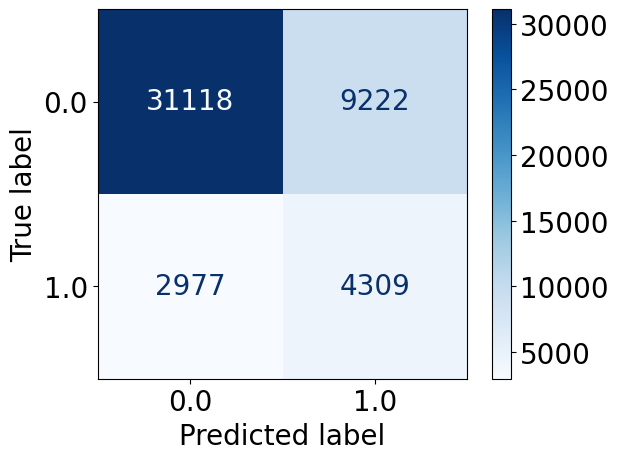

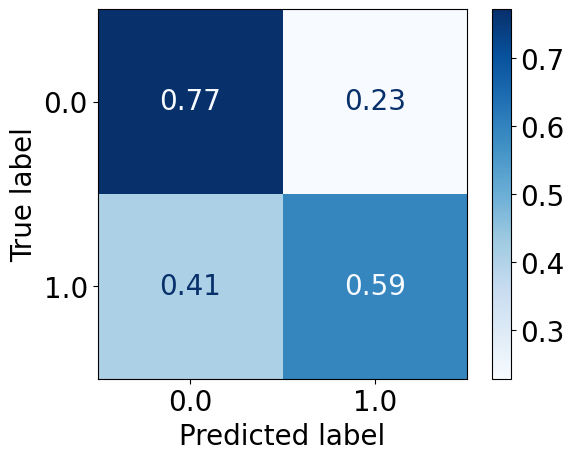

In [ ]:
pred_prob_test_2017_knn_balanced_2021 = knn_balanced_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_knn_balanced_2021 = knn_balanced_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_knn_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_knn_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_knn_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_knn_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_knn_balanced_2021, pred_prob_test_2017_knn_balanced_2021)

Class 1 Recall: 0.5914081800713697
Class 1 Precision: 0.318453920626709
Class 1 Area Under Precision-Recall Curve: 0.30701286056039573
Class 1 F1-Score: 0.4139885670365567
Class 0 Recall: 0.7713931581556768
Class 0 Precision: 0.9126851444493328
Class 0 Area Under Precision-Recall Curve: 0.7698731521689386
Class 0 F1-Score: 0.8361120440652919
Overall Accuracy: 0.7438583966740856
Balanced Accuracy: 0.6814006691135233
Area Under ROC Curve: 0.7487078012164241
Matthews Correlation Coefficient: 0.28958170198777466
0.5914081800713697
0.318453920626709
0.30701286056039573
0.4139885670365567
0.7713931581556768
0.9126851444493328
0.7698731521689386
0.8361120440652919
0.7438583966740856
0.6814006691135233
0.7487078012164241
0.28958170198777466


#### MLP

accuracy 0.7092974425733843
              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80     40340
         1.0       0.31      0.76      0.44      7286

    accuracy                           0.71     47626
   macro avg       0.63      0.73      0.62     47626
weighted avg       0.84      0.71      0.75     47626



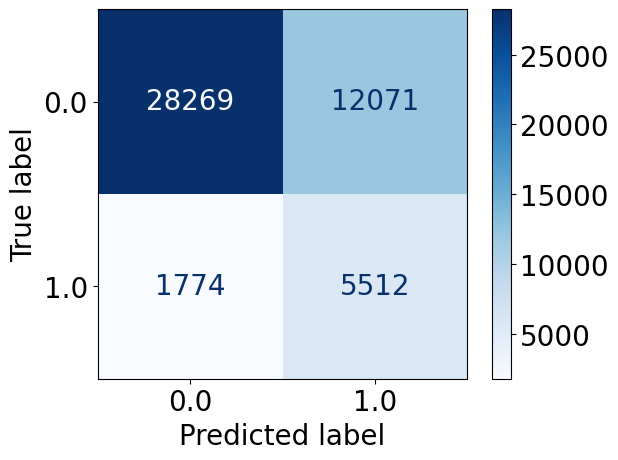

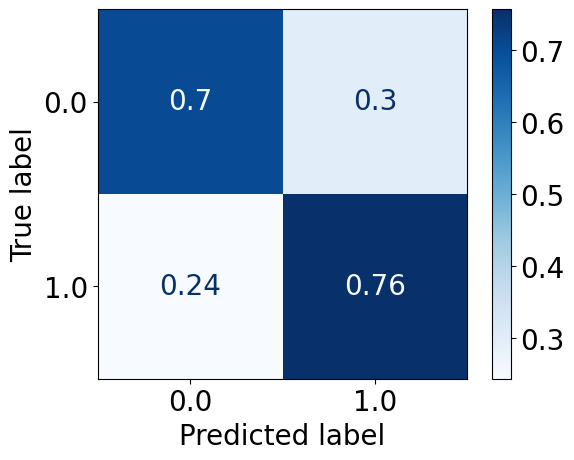

In [ ]:
pred_prob_test_2017_mlp_balanced_2021 = mlp_balanced_2021.predict_proba(X_test_2017)[:, 1]
pred_test_2017_mlp_balanced_2021 = mlp_balanced_2021.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_mlp_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_mlp_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_mlp_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_mlp_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_mlp_balanced_2021, pred_prob_test_2017_mlp_balanced_2021)

Class 1 Recall: 0.7565193521822674
Class 1 Precision: 0.3134846158221009
Class 1 Area Under Precision-Recall Curve: 0.3833493151927209
Class 1 F1-Score: 0.443282801881861
Class 0 Recall: 0.7007684680218146
Class 0 Precision: 0.9409513031321772
Class 0 Area Under Precision-Recall Curve: 0.7285643179346679
Class 0 F1-Score: 0.8032905673244959
Overall Accuracy: 0.7092974425733843
Balanced Accuracy: 0.728643910102041
Area Under ROC Curve: 0.7992618313236747
Matthews Correlation Coefficient: 0.3411018128949541
0.7565193521822674
0.3134846158221009
0.3833493151927209
0.443282801881861
0.7007684680218146
0.9409513031321772
0.7285643179346679
0.8032905673244959
0.7092974425733843
0.728643910102041
0.7992618313236747
0.3411018128949541


### Test on 2015

#### LR

accuracy 0.7367167294341849
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83     37411
         1.0       0.34      0.76      0.47      6667

    accuracy                           0.74     44078
   macro avg       0.64      0.75      0.65     44078
weighted avg       0.85      0.74      0.77     44078



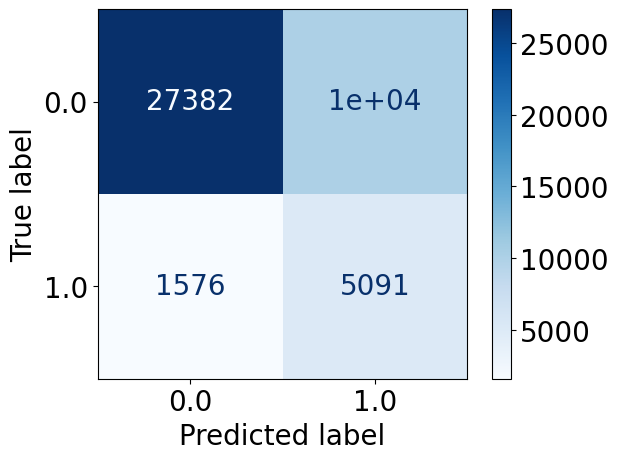

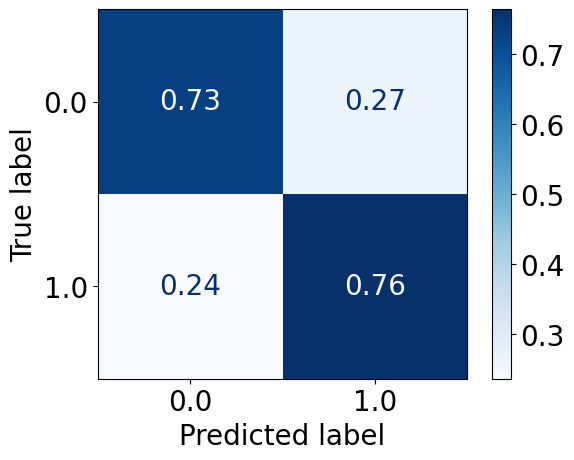

In [ ]:
pred_prob_test_2015_lr_balanced_2021 = lr_balanced_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_lr_balanced_2021 = lr_balanced_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_lr_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_lr_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_lr_balanced_2021, pred_prob_test_2015_lr_balanced_2021)

Class 1 Recall: 0.7636118194090296
Class 1 Precision: 0.33670634920634923
Class 1 Area Under Precision-Recall Curve: 0.4450809549624265
Class 1 F1-Score: 0.4673429109101759
Class 0 Recall: 0.73192376573735
Class 0 Precision: 0.9455763519580082
Class 0 Area Under Precision-Recall Curve: 0.7182112860228249
Class 0 F1-Score: 0.8251442691618075
Overall Accuracy: 0.7367167294341849
Balanced Accuracy: 0.7477677925731898
Area Under ROC Curve: 0.822180180184009
Matthews Correlation Coefficient: 0.37400684953377583
0.7636118194090296
0.33670634920634923
0.4450809549624265
0.4673429109101759
0.73192376573735
0.9455763519580082
0.7182112860228249
0.8251442691618075
0.7367167294341849
0.7477677925731898
0.822180180184009
0.37400684953377583


#### RF

accuracy 0.7072235582376696
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80     37411
         1.0       0.31      0.78      0.45      6667

    accuracy                           0.71     44078
   macro avg       0.63      0.74      0.62     44078
weighted avg       0.85      0.71      0.75     44078



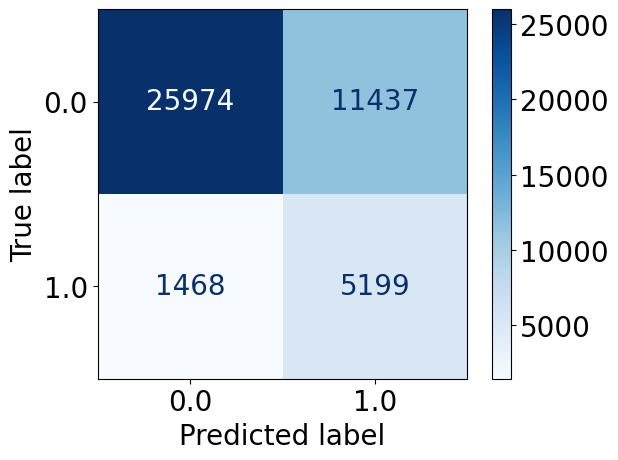

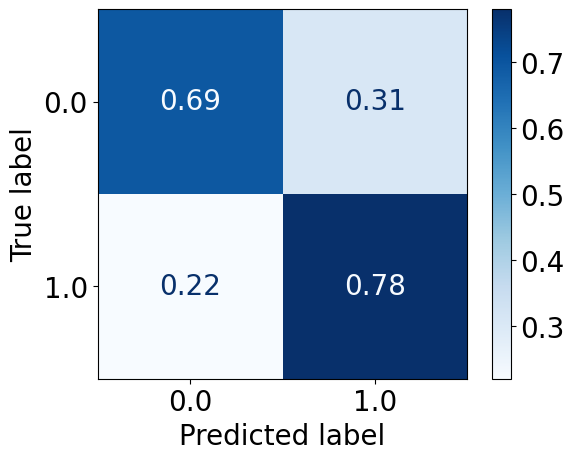

In [ ]:
pred_prob_test_2015_rf_balanced_2021 = rf_balanced_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_rf_balanced_2021 = rf_balanced_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_rf_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_rf_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_rf_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_rf_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_rf_balanced_2021, pred_prob_test_2015_rf_balanced_2021)

Class 1 Recall: 0.7798110094495275
Class 1 Precision: 0.31251502765087763
Class 1 Area Under Precision-Recall Curve: 0.4076882427882028
Class 1 F1-Score: 0.4462086426640347
Class 0 Recall: 0.694287776322472
Class 0 Precision: 0.9465053567524233
Class 0 Area Under Precision-Recall Curve: 0.7262464552941594
Class 0 F1-Score: 0.8010115183568994
Overall Accuracy: 0.7072235582376696
Balanced Accuracy: 0.7370493928859998
Area Under ROC Curve: 0.8089859039164263
Matthews Correlation Coefficient: 0.3504300925089076
0.7798110094495275
0.31251502765087763
0.4076882427882028
0.4462086426640347
0.694287776322472
0.9465053567524233
0.7262464552941594
0.8010115183568994
0.7072235582376696
0.7370493928859998
0.8089859039164263
0.3504300925089076


#### SVM

accuracy 0.3242660737783021
              precision    recall  f1-score   support

         0.0       0.84      0.25      0.39     37411
         1.0       0.15      0.72      0.24      6667

    accuracy                           0.32     44078
   macro avg       0.49      0.49      0.32     44078
weighted avg       0.73      0.32      0.37     44078



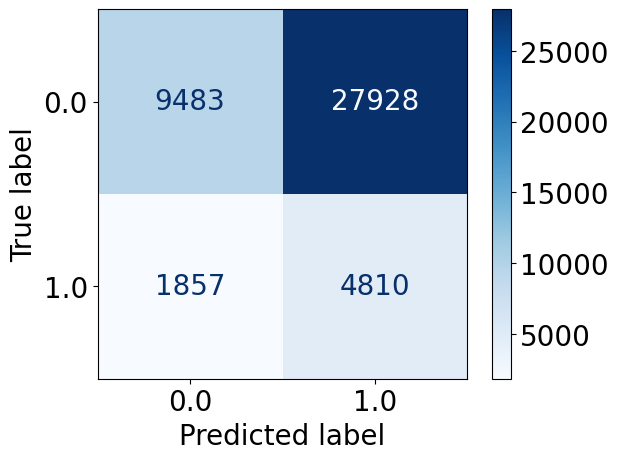

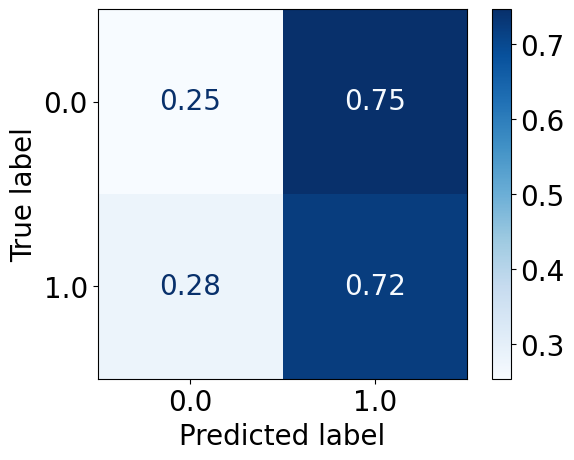

In [ ]:
pred_prob_test_2015_svm_balanced_2021 = svm_balanced_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_svm_balanced_2021 = svm_balanced_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_svm_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_svm_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_svm_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_svm_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_svm_balanced_2021, pred_prob_test_2015_svm_balanced_2021)

Class 1 Recall: 0.7214639268036598
Class 1 Precision: 0.14692406377909464
Class 1 Area Under Precision-Recall Curve: 0.17144574348243935
Class 1 F1-Score: 0.24413145539906106
Class 0 Recall: 0.2534815963219374
Class 0 Precision: 0.8362433862433862
Class 0 Area Under Precision-Recall Curve: 0.8332019600603457
Class 0 F1-Score: 0.3890381735759266
Overall Accuracy: 0.3242660737783021
Balanced Accuracy: 0.4874727615627986
Area Under ROC Curve: 0.5097928953222222
Matthews Correlation Coefficient: -0.0205360837101182
0.7214639268036598
0.14692406377909464
0.17144574348243935
0.24413145539906106
0.2534815963219374
0.8362433862433862
0.8332019600603457
0.3890381735759266
0.3242660737783021
0.4874727615627986
0.5097928953222222
-0.0205360837101182


#### KNN

accuracy 0.7610826262534598
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85     37411
         1.0       0.33      0.55      0.41      6667

    accuracy                           0.76     44078
   macro avg       0.62      0.67      0.63     44078
weighted avg       0.82      0.76      0.78     44078



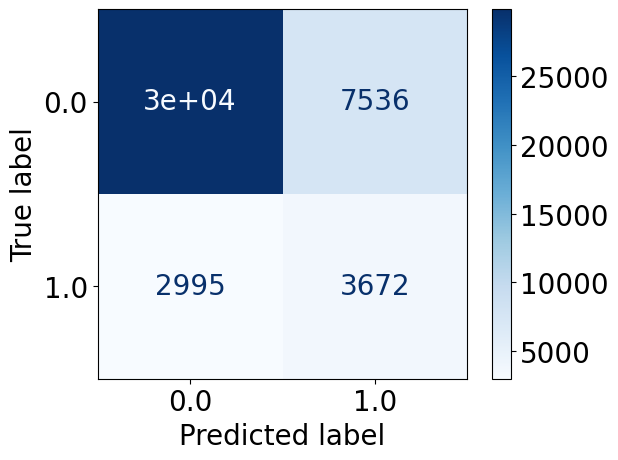

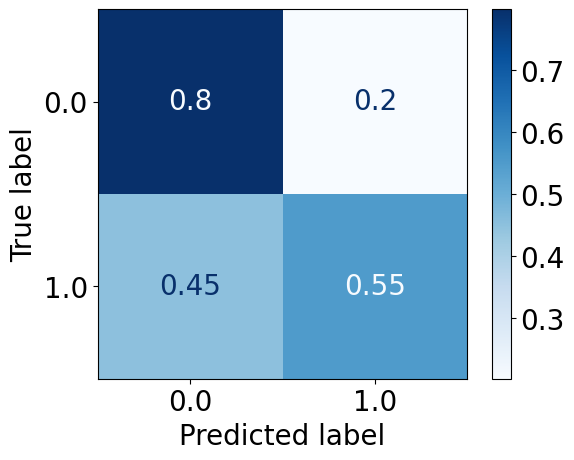

In [ ]:
pred_prob_test_2015_knn_balanced_2021 = knn_balanced_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_knn_balanced_2021 = knn_balanced_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_knn_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_knn_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_knn_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_knn_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_knn_balanced_2021, pred_prob_test_2015_knn_balanced_2021)

Class 1 Recall: 0.5507724613769311
Class 1 Precision: 0.32762312633832974
Class 1 Area Under Precision-Recall Curve: 0.3085143799443198
Class 1 F1-Score: 0.41085314685314683
Class 0 Recall: 0.7985619202908235
Class 0 Precision: 0.9088834803772436
Class 0 Area Under Precision-Recall Curve: 0.7730100227682494
Class 0 F1-Score: 0.8501586488524637
Overall Accuracy: 0.7610826262534598
Balanced Accuracy: 0.6746671908338773
Area Under ROC Curve: 0.7473356284606181
Matthews Correlation Coefficient: 0.2874367569002331
0.5507724613769311
0.32762312633832974
0.3085143799443198
0.41085314685314683
0.7985619202908235
0.9088834803772436
0.7730100227682494
0.8501586488524637
0.7610826262534598
0.6746671908338773
0.7473356284606181
0.2874367569002331


#### MLP

accuracy 0.7135759335723036
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     37411
         1.0       0.31      0.76      0.44      6667

    accuracy                           0.71     44078
   macro avg       0.63      0.73      0.63     44078
weighted avg       0.85      0.71      0.75     44078



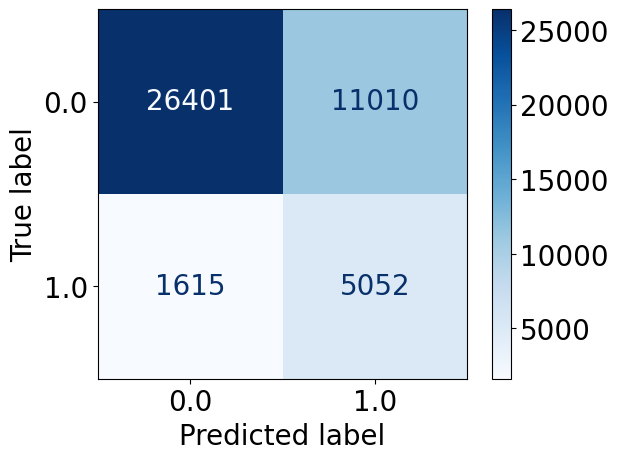

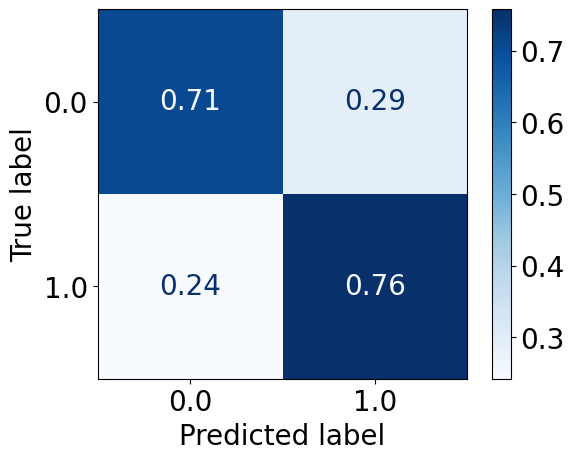

In [ ]:
pred_prob_test_2015_mlp_balanced_2021 = mlp_balanced_2021.predict_proba(X_test_2015)[:, 1]
pred_test_2015_mlp_balanced_2021 = mlp_balanced_2021.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_mlp_balanced_2021))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_mlp_balanced_2021))

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_mlp_balanced_2021,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_mlp_balanced_2021,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_mlp_balanced_2021, pred_prob_test_2015_mlp_balanced_2021)

Class 1 Recall: 0.7577621118944052
Class 1 Precision: 0.3145311916324244
Class 1 Area Under Precision-Recall Curve: 0.39010168403875695
Class 1 F1-Score: 0.4445422147916758
Class 0 Recall: 0.7057015316350805
Class 0 Precision: 0.9423543689320388
Class 0 Area Under Precision-Recall Curve: 0.7287210883324493
Class 0 F1-Score: 0.8070368502300274
Overall Accuracy: 0.7135759335723036
Balanced Accuracy: 0.7317318217647428
Area Under ROC Curve: 0.8032399775322774
Matthews Correlation Coefficient: 0.34504654449700045
0.7577621118944052
0.3145311916324244
0.39010168403875695
0.4445422147916758
0.7057015316350805
0.9423543689320388
0.7287210883324493
0.8070368502300274
0.7135759335723036
0.7317318217647428
0.8032399775322774
0.34504654449700045


# Train on 2019 and test on each of 2021 and 2017
See effect of new and previous year

## Train model on imbalanced dataset 2019

### Train and test on 2019

accuracy 0.853633669235329
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     35675
         1.0       0.57      0.21      0.31      6500

    accuracy                           0.85     42175
   macro avg       0.72      0.59      0.61     42175
weighted avg       0.82      0.85      0.82     42175



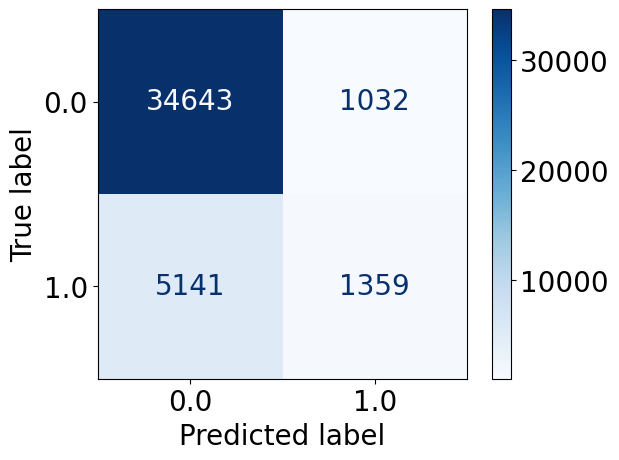

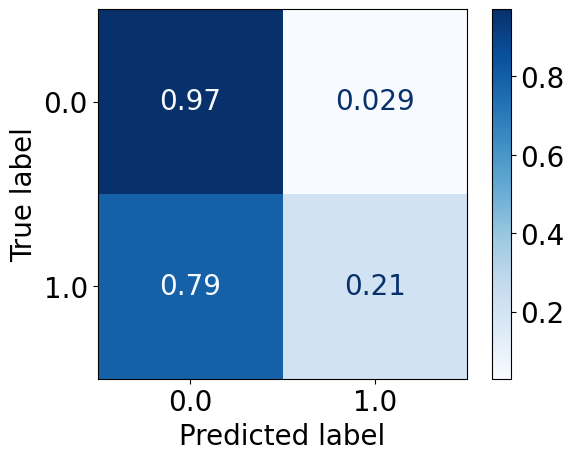

In [ ]:
lr_2019 = LogisticRegression(solver='liblinear')
lr_2019.fit(X_train_2019, y_train_2019)

pred_prob_test_2019_lr_2019 = lr_2019.predict_proba(X_test_2019)[:, 1]
pred_test_2019_lr_2019 = lr_2019.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_lr_2019))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_lr_2019))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_lr_2019, pred_prob_test_2019_lr_2019)

Class 1 Recall: 0.20907692307692308
Class 1 Precision: 0.5683814303638645
Class 1 Area Under Precision-Recall Curve: 0.4526396127737961
Class 1 F1-Score: 0.30570239568102575
Class 0 Recall: 0.971072179397337
Class 0 Precision: 0.8707771968630605
Class 0 Area Under Precision-Recall Curve: 0.7133998863519367
Class 0 F1-Score: 0.9181939861381677
Overall Accuracy: 0.853633669235329
Balanced Accuracy: 0.59007455123713
Area Under ROC Curve: 0.8236011557328446
Matthews Correlation Coefficient: 0.2812721680841507
0.20907692307692308
0.5683814303638645
0.4526396127737961
0.30570239568102575
0.971072179397337
0.8707771968630605
0.7133998863519367
0.9181939861381677
0.853633669235329
0.59007455123713
0.8236011557328446
0.2812721680841507


### Test on 2021

accuracy 0.8557759568302189
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     33912
         1.0       0.59      0.19      0.28      6116

    accuracy                           0.86     40028
   macro avg       0.73      0.58      0.60     40028
weighted avg       0.83      0.86      0.82     40028



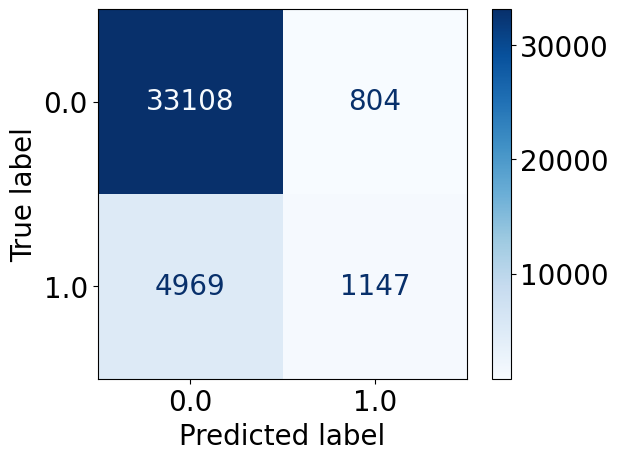

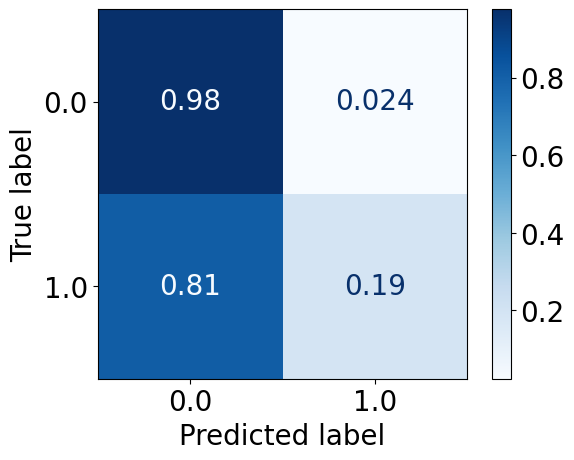

In [ ]:
pred_prob_test_2021_lr_2019 = lr_2019.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_2019 = lr_2019.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_2019))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_2019))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_2019, pred_prob_test_2021_lr_2019)

Class 1 Recall: 0.18754087638979725
Class 1 Precision: 0.5879036391594055
Class 1 Area Under Precision-Recall Curve: 0.44929956018005834
Class 1 F1-Score: 0.2843684145283253
Class 0 Recall: 0.9762915782024062
Class 0 Precision: 0.8695012737348006
Class 0 Area Under Precision-Recall Curve: 0.715464681932781
Class 0 F1-Score: 0.9198071927655614
Overall Accuracy: 0.8557759568302189
Balanced Accuracy: 0.5819162272961017
Area Under ROC Curve: 0.8232579324496396
Matthews Correlation Coefficient: 0.27374763856879347
0.18754087638979725
0.5879036391594055
0.44929956018005834
0.2843684145283253
0.9762915782024062
0.8695012737348006
0.715464681932781
0.9198071927655614
0.8557759568302189
0.5819162272961017
0.8232579324496396
0.27374763856879347


### Test on 2017

accuracy 0.856905891739806
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     40340
         1.0       0.59      0.21      0.31      7286

    accuracy                           0.86     47626
   macro avg       0.73      0.59      0.61     47626
weighted avg       0.83      0.86      0.83     47626



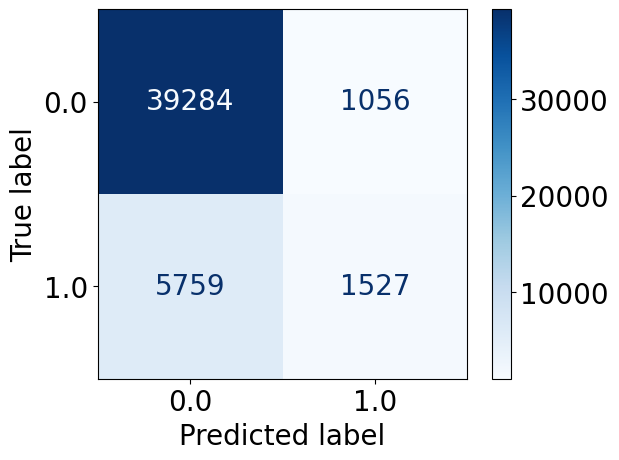

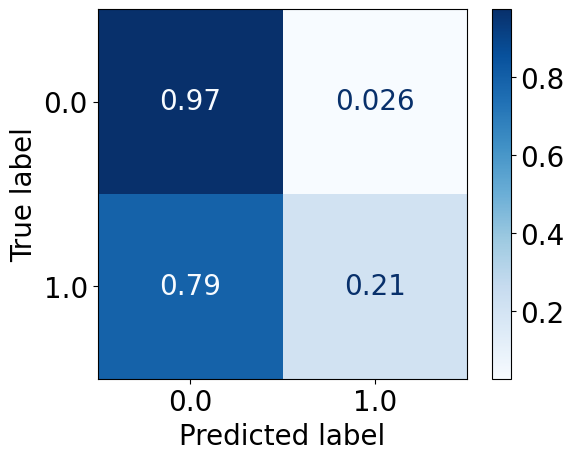

In [ ]:
pred_prob_test_2017_lr_2019 = lr_2019.predict_proba(X_test_2017)[:, 1]
pred_test_2017_lr_2019 = lr_2019.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_lr_2019))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_lr_2019))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_lr_2019, pred_prob_test_2017_lr_2019)

Class 1 Recall: 0.20958001646994234
Class 1 Precision: 0.5911730545876888
Class 1 Area Under Precision-Recall Curve: 0.4593127913105355
Class 1 F1-Score: 0.3094538453744047
Class 0 Recall: 0.9738225086762519
Class 0 Precision: 0.8721443953555491
Class 0 Area Under Precision-Recall Curve: 0.7132876495235959
Class 0 F1-Score: 0.9201831746366372
Overall Accuracy: 0.856905891739806
Balanced Accuracy: 0.5917012625730971
Area Under ROC Curve: 0.8275537171620146
Matthews Correlation Coefficient: 0.29150229889982904
0.20958001646994234
0.5911730545876888
0.4593127913105355
0.3094538453744047
0.9738225086762519
0.8721443953555491
0.7132876495235959
0.9201831746366372
0.856905891739806
0.5917012625730971
0.8275537171620146
0.29150229889982904


## Train model on balanced (undersampling) dataset 2019

### Train and test on 2019

accuracy 0.7362418494368702
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     35675
         1.0       0.34      0.76      0.47      6500

    accuracy                           0.74     42175
   macro avg       0.64      0.75      0.65     42175
weighted avg       0.85      0.74      0.77     42175



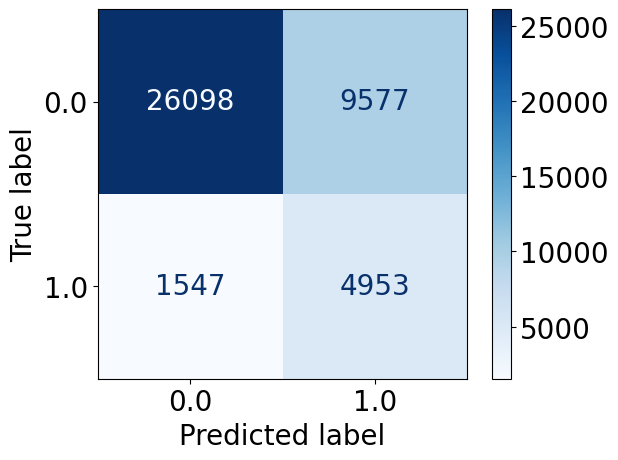

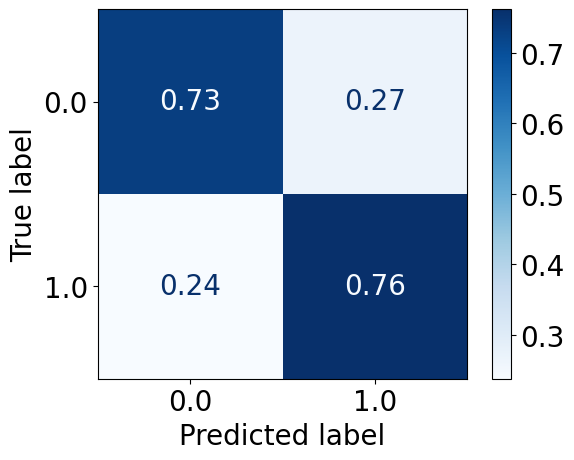

In [ ]:
lr_2019_balanced = LogisticRegression(solver='liblinear')
lr_2019_balanced.fit(X_train_2019_balanced, y_train_2019_balanced)

pred_prob_test_2019_lr_2019_balanced = lr_2019_balanced.predict_proba(X_test_2019)[:, 1]
pred_test_2019_lr_2019_balanced = lr_2019_balanced.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_lr_2019_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_lr_2019_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_lr_2019_balanced, pred_prob_test_2019_lr_2019_balanced)

Class 1 Recall: 0.762
Class 1 Precision: 0.34088093599449415
Class 1 Area Under Precision-Recall Curve: 0.4510411595421777
Class 1 F1-Score: 0.4710413694721826
Class 0 Recall: 0.7315487035739313
Class 0 Precision: 0.9440405136552722
Class 0 Area Under Precision-Recall Curve: 0.7136129240976766
Class 0 F1-Score: 0.8243209096651927
Overall Accuracy: 0.7362418494368702
Balanced Accuracy: 0.7467743517869656
Area Under ROC Curve: 0.8235556854077948
Matthews Correlation Coefficient: 0.37499681611321356
0.762
0.34088093599449415
0.4510411595421777
0.4710413694721826
0.7315487035739313
0.9440405136552722
0.7136129240976766
0.8243209096651927
0.7362418494368702
0.7467743517869656
0.8235556854077948
0.37499681611321356


### Test on 2021

accuracy 0.7509243529529329
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84     33912
         1.0       0.35      0.73      0.47      6116

    accuracy                           0.75     40028
   macro avg       0.64      0.74      0.65     40028
weighted avg       0.85      0.75      0.78     40028



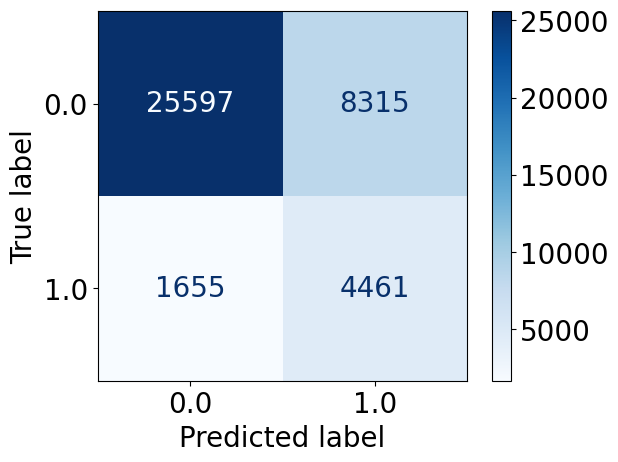

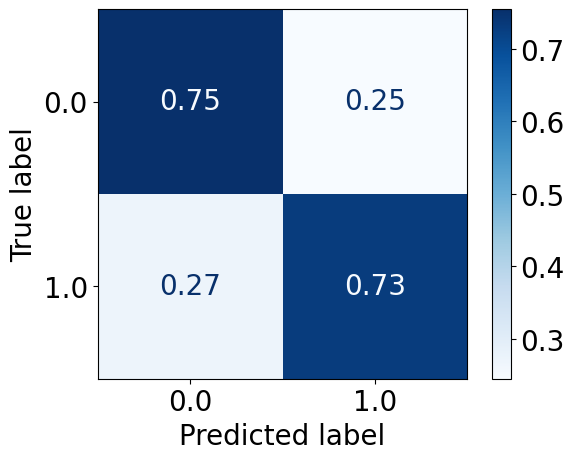

In [ ]:
pred_prob_test_2021_lr_2019_balanced = lr_2019_balanced.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_2019_balanced = lr_2019_balanced.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_2019_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_2019_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_2019_balanced, pred_prob_test_2021_lr_2019_balanced)

Class 1 Recall: 0.7293982995421844
Class 1 Precision: 0.34917031934877896
Class 1 Area Under Precision-Recall Curve: 0.4483805826254744
Class 1 F1-Score: 0.47226339191192035
Class 0 Recall: 0.7548065581505072
Class 0 Precision: 0.9392705122559812
Class 0 Area Under Precision-Recall Curve: 0.7155548618459694
Class 0 F1-Score: 0.8369956183375843
Overall Accuracy: 0.7509243529529329
Balanced Accuracy: 0.7421024288463458
Area Under ROC Curve: 0.8234442001503989
Matthews Correlation Coefficient: 0.3737170745630236
0.7293982995421844
0.34917031934877896
0.4483805826254744
0.47226339191192035
0.7548065581505072
0.9392705122559812
0.7155548618459694
0.8369956183375843
0.7509243529529329
0.7421024288463458
0.8234442001503989
0.3737170745630236


### Test on 2017

accuracy 0.7482047621047327
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     40340
         1.0       0.35      0.75      0.48      7286

    accuracy                           0.75     47626
   macro avg       0.65      0.75      0.66     47626
weighted avg       0.85      0.75      0.78     47626



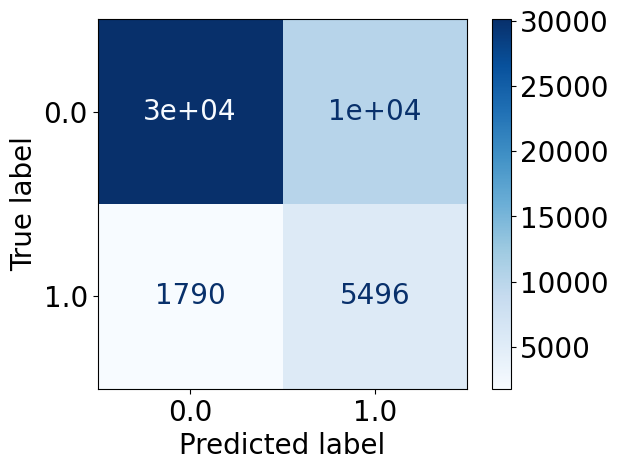

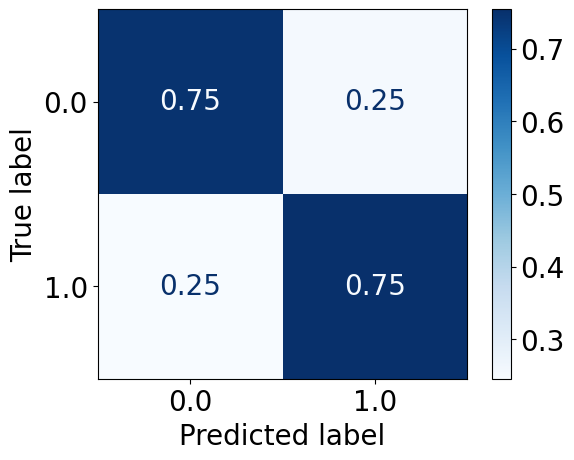

In [ ]:
pred_prob_test_2017_lr_2019_balanced = lr_2019_balanced.predict_proba(X_test_2017)[:, 1]
pred_test_2017_lr_2019_balanced = lr_2019_balanced.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_lr_2019_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_lr_2019_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_lr_2019_balanced, pred_prob_test_2017_lr_2019_balanced)

Class 1 Recall: 0.7543233598682405
Class 1 Precision: 0.3501082940501975
Class 1 Area Under Precision-Recall Curve: 0.4580693948033064
Class 1 F1-Score: 0.4782457361642882
Class 0 Recall: 0.7470996529499256
Class 0 Precision: 0.9439363568028063
Class 0 Area Under Precision-Recall Curve: 0.7133594030851582
Class 0 F1-Score: 0.8340621021752366
Overall Accuracy: 0.7482047621047327
Balanced Accuracy: 0.750711506409083
Area Under ROC Curve: 0.8279611651905823
Matthews Correlation Coefficient: 0.3839801488798332
0.7543233598682405
0.3501082940501975
0.4580693948033064
0.4782457361642882
0.7470996529499256
0.9439363568028063
0.7133594030851582
0.8340621021752366
0.7482047621047327
0.750711506409083
0.8279611651905823
0.3839801488798332


# Train on 2019, 2017, 2015 and test on other

## Train with raw (imbalanced) dataset

### Train and test on 2019, 2017, 2015 combinedly

accuracy 0.8571396559579919
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    113681
         1.0       0.57      0.21      0.31     20198

    accuracy                           0.86    133879
   macro avg       0.72      0.59      0.61    133879
weighted avg       0.83      0.86      0.83    133879



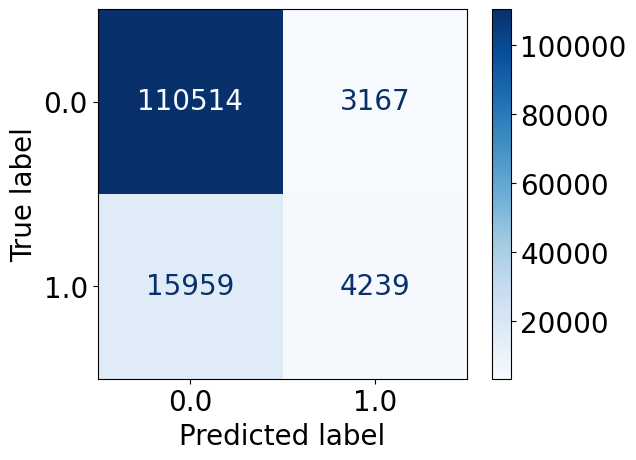

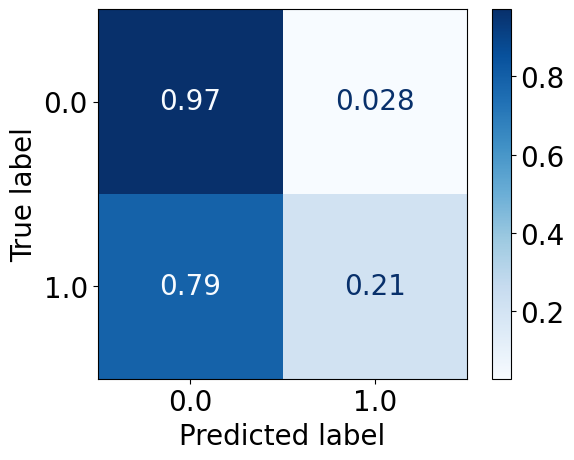

In [ ]:
lr_2019_17_15 = LogisticRegression(solver='liblinear')
lr_2019_17_15.fit(X_train_2019_17_15, y_train_2019_17_15)

pred_prob_test_2019_17_15_lr = lr_2019_17_15.predict_proba(X_test_2019_17_15)[:, 1]
pred_test_2019_17_15_lr = lr_2019_17_15.predict(X_test_2019_17_15)

print("accuracy", accuracy_score(y_test_2019_17_15, pred_test_2019_17_15_lr))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019_17_15, pred_test_2019_17_15_lr))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019_17_15, pred_test_2019_17_15_lr,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019_17_15, pred_test_2019_17_15_lr,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019_17_15, pred_test_2019_17_15_lr, pred_prob_test_2019_17_15_lr)

Class 1 Recall: 0.20987226458065156
Class 1 Precision: 0.5723737510126924
Class 1 Area Under Precision-Recall Curve: 0.4508559411588719
Class 1 F1-Score: 0.3071294015360093
Class 0 Recall: 0.9721413428805166
Class 0 Precision: 0.8738149644588173
Class 0 Area Under Precision-Recall Curve: 0.717361131397904
Class 0 F1-Score: 0.9203594360285484
Overall Accuracy: 0.8571396559579919
Balanced Accuracy: 0.591006803730584
Area Under ROC Curve: 0.8256201364341734
Matthews Correlation Coefficient: 0.284977924954608
0.20987226458065156
0.5723737510126924
0.4508559411588719
0.3071294015360093
0.9721413428805166
0.8738149644588173
0.717361131397904
0.9203594360285484
0.8571396559579919
0.591006803730584
0.8256201364341734
0.284977924954608


### Test on 2021

accuracy 0.8556760267812531
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.58      0.20      0.30      6116

    accuracy                           0.86     40028
   macro avg       0.73      0.59      0.61     40028
weighted avg       0.83      0.86      0.82     40028



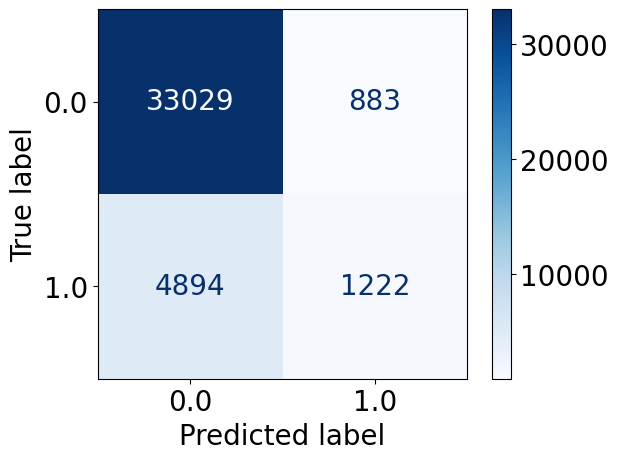

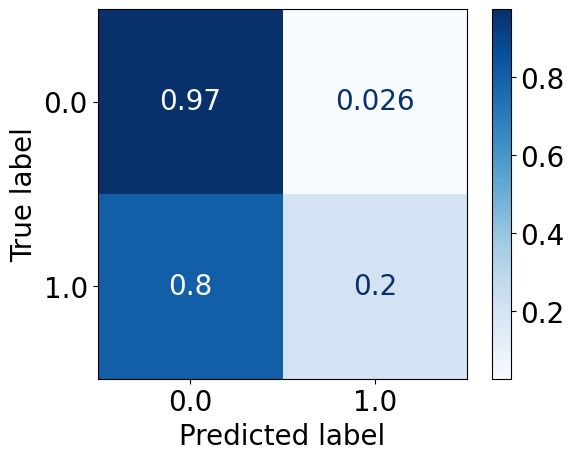

In [ ]:
pred_prob_test_2021_lr_2019_17_15 = lr_2019_17_15.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_2019_17_15 = lr_2019_17_15.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_2019_17_15))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_2019_17_15))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019_17_15,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019_17_15,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_2019_17_15, pred_prob_test_2021_lr_2019_17_15)

Class 1 Recall: 0.1998037933289732
Class 1 Precision: 0.580522565320665
Class 1 Area Under Precision-Recall Curve: 0.44836588313497766
Class 1 F1-Score: 0.2972874346186595
Class 0 Recall: 0.9739620193441849
Class 0 Precision: 0.8709490282941751
Class 0 Area Under Precision-Recall Curve: 0.7156990085382033
Class 0 F1-Score: 0.9195795921208325
Overall Accuracy: 0.8556760267812531
Balanced Accuracy: 0.586882906336579
Area Under ROC Curve: 0.8225400450726081
Matthews Correlation Coefficient: 0.28008985765880295
0.1998037933289732
0.580522565320665
0.44836588313497766
0.2972874346186595
0.9739620193441849
0.8709490282941751
0.7156990085382033
0.9195795921208325
0.8556760267812531
0.586882906336579
0.8225400450726081
0.28008985765880295


### Test on 2019

accuracy 0.8537048014226437
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     35675
         1.0       0.57      0.22      0.31      6500

    accuracy                           0.85     42175
   macro avg       0.72      0.59      0.61     42175
weighted avg       0.82      0.85      0.82     42175



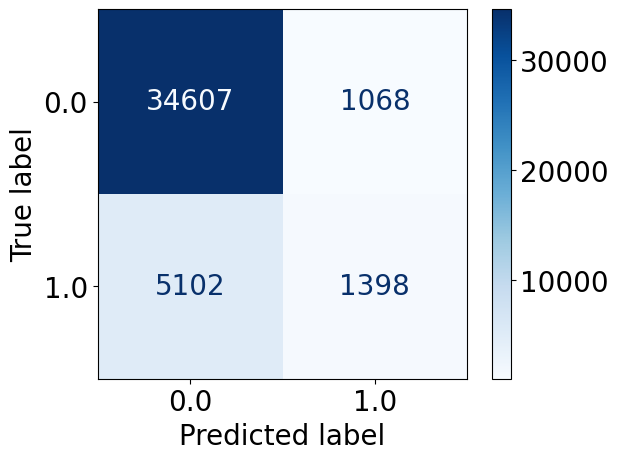

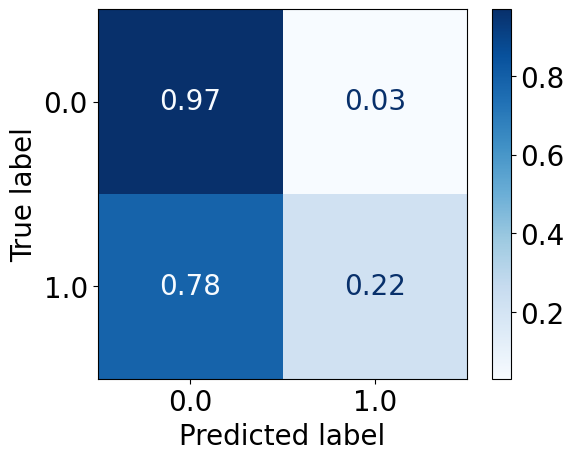

In [ ]:
pred_prob_test_2019_lr_2019_17_15 = lr_2019_17_15.predict_proba(X_test_2019)[:, 1]
pred_test_2019_lr_2019_17_15 = lr_2019_17_15.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_lr_2019_17_15))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_lr_2019_17_15))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019_17_15,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019_17_15,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_lr_2019_17_15, pred_prob_test_2019_lr_2019_17_15)

Class 1 Recall: 0.21507692307692308
Class 1 Precision: 0.5669099756690997
Class 1 Area Under Precision-Recall Curve: 0.45311809008581966
Class 1 F1-Score: 0.311844746821325
Class 0 Recall: 0.9700630693763139
Class 0 Precision: 0.8715152736155531
Class 0 Area Under Precision-Recall Curve: 0.7134529650411126
Class 0 F1-Score: 0.9181523930807598
Overall Accuracy: 0.8537048014226437
Balanced Accuracy: 0.5925699962266185
Area Under ROC Curve: 0.8230536661096437
Matthews Correlation Coefficient: 0.2849035755196294
0.21507692307692308
0.5669099756690997
0.45311809008581966
0.311844746821325
0.9700630693763139
0.8715152736155531
0.7134529650411126
0.9181523930807598
0.8537048014226437
0.5925699962266185
0.8230536661096437
0.2849035755196294


### Test on 2017

accuracy 0.8568638978709109
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     40340
         1.0       0.59      0.21      0.31      7286

    accuracy                           0.86     47626
   macro avg       0.73      0.59      0.62     47626
weighted avg       0.83      0.86      0.83     47626



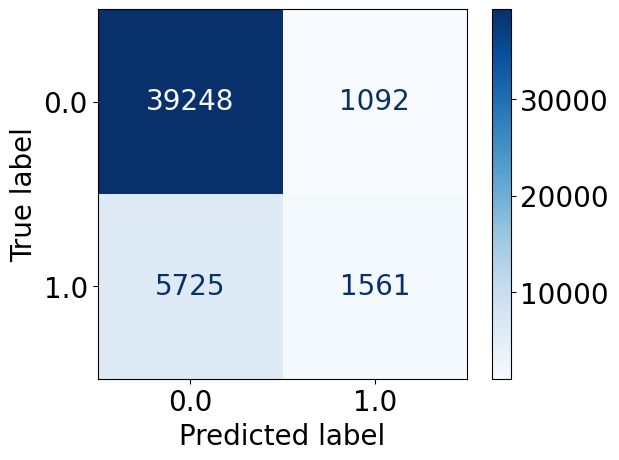

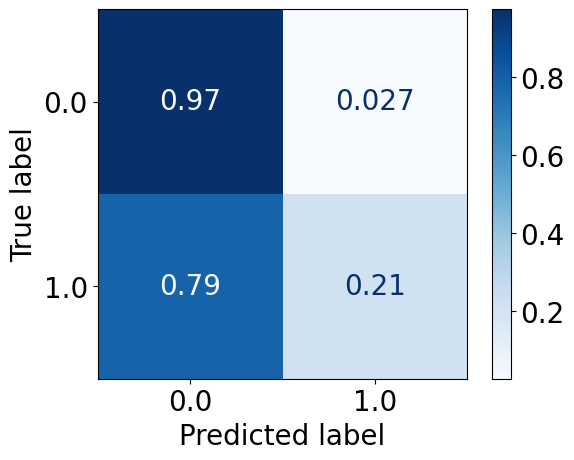

In [ ]:
pred_prob_test_2017_lr_2019_17_15 = lr_2019_17_15.predict_proba(X_test_2017)[:, 1]
pred_test_2017_lr_2019_17_15 = lr_2019_17_15.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_lr_2019_17_15))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_lr_2019_17_15))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019_17_15,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019_17_15,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_lr_2019_17_15, pred_prob_test_2017_lr_2019_17_15)

Class 1 Recall: 0.21424650013724952
Class 1 Precision: 0.5883905013192612
Class 1 Area Under Precision-Recall Curve: 0.4618387411369352
Class 1 F1-Score: 0.3141161082603884
Class 0 Recall: 0.9729300941993059
Class 0 Precision: 0.872701398616948
Class 0 Area Under Precision-Recall Curve: 0.7127150173927715
Class 0 F1-Score: 0.9200942412059123
Overall Accuracy: 0.8568638978709109
Balanced Accuracy: 0.5935882971682777
Area Under ROC Curve: 0.8291400004300531
Matthews Correlation Coefficient: 0.29377816717079475
0.21424650013724952
0.5883905013192612
0.4618387411369352
0.3141161082603884
0.9729300941993059
0.872701398616948
0.7127150173927715
0.9200942412059123
0.8568638978709109
0.5935882971682777
0.8291400004300531
0.29377816717079475


### Test on 2015

accuracy 0.8565724397658696
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     37411
         1.0       0.57      0.20      0.30      6667

    accuracy                           0.86     44078
   macro avg       0.72      0.59      0.61     44078
weighted avg       0.83      0.86      0.83     44078



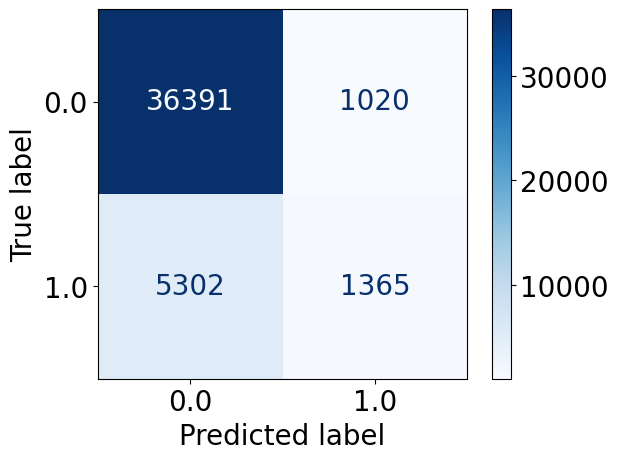

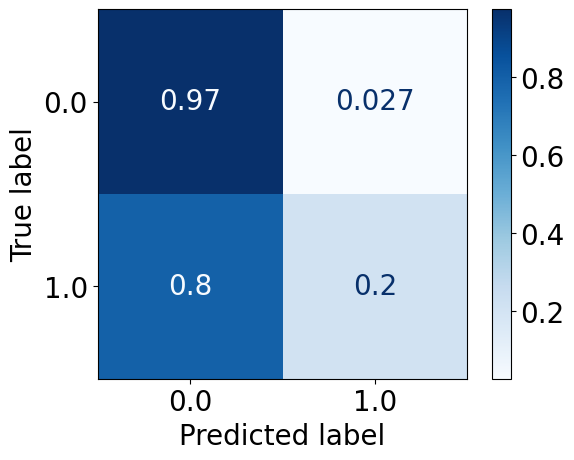

In [ ]:
pred_prob_test_2015_lr_2019_17_15 = lr_2019_17_15.predict_proba(X_test_2015)[:, 1]
pred_test_2015_lr_2019_17_15 = lr_2019_17_15.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_lr_2019_17_15))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_lr_2019_17_15))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_2019_17_15,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_2019_17_15,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_lr_2019_17_15, pred_prob_test_2015_lr_2019_17_15)

Class 1 Recall: 0.2047397630118494
Class 1 Precision: 0.5723270440251572
Class 1 Area Under Precision-Recall Curve: 0.45105708399634226
Class 1 F1-Score: 0.30159080866106935
Class 0 Recall: 0.9727352917591083
Class 0 Precision: 0.8728323699421965
Class 0 Area Under Precision-Recall Curve: 0.7169045786716716
Class 0 F1-Score: 0.9200798948220065
Overall Accuracy: 0.8565724397658696
Balanced Accuracy: 0.5887375273854789
Area Under ROC Curve: 0.8255171534812904
Matthews Correlation Coefficient: 0.2810777319099888
0.2047397630118494
0.5723270440251572
0.45105708399634226
0.30159080866106935
0.9727352917591083
0.8728323699421965
0.7169045786716716
0.9200798948220065
0.8565724397658696
0.5887375273854789
0.8255171534812904
0.2810777319099888


## Train with balanced (Undersampling) dataset

### Create balanced (undersampled) dataset

In [ ]:
#Separate the 0(No Diabetes) and 1(Diabetes)
#Get the 1s
is1 = df_train_2019_17_15['Diabetes'] == 1
brfss_2019_17_15_1 = df_train_2019_17_15[is1]
print(brfss_2019_17_15_1.shape)

is0 = df_train_2019_17_15['Diabetes'] == 0
brfss_2019_17_15_0 = df_train_2019_17_15[is0]
print(brfss_2019_17_15_0.shape)

brfss_2019_17_15_0_rand = brfss_2019_17_15_0.take(np.random.permutation(len(brfss_2019_17_15_0))[:brfss_2019_17_15_1.shape[0]])
print(brfss_2019_17_15_0_rand.shape)

#Append the 39977 1s to the 39977 randomly selected 0s
df_train_2019_17_15_balanced = brfss_2019_17_15_0_rand.append(brfss_2019_17_15_1, ignore_index = True)

#See the classes are perfectly balanced now
print(df_train_2019_17_15_balanced.groupby(['Diabetes']).size())

X_train_2019_17_15_balanced = df_train_2019_17_15_balanced.drop(['Diabetes', 'Race'],axis=1)
y_train_2019_17_15_balanced = df_train_2019_17_15_balanced['Diabetes']
print(X_train_2019_17_15_balanced.shape, X_test_2019_17_15.shape)

(81275, 50)
(454240, 50)
(81275, 50)
Diabetes
0.0    81275
1.0    81275
dtype: int64


<ipython-input-36-8e60e6a99a4f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_2019_17_15_balanced = brfss_2019_17_15_0_rand.append(brfss_2019_17_15_1, ignore_index = True)


(162550, 48) (133879, 48)


### Train and test on 2019, 2017, 2015 combinedly

accuracy 0.7341554687441645
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82    113681
         1.0       0.33      0.77      0.47     20198

    accuracy                           0.73    133879
   macro avg       0.64      0.75      0.64    133879
weighted avg       0.85      0.73      0.77    133879



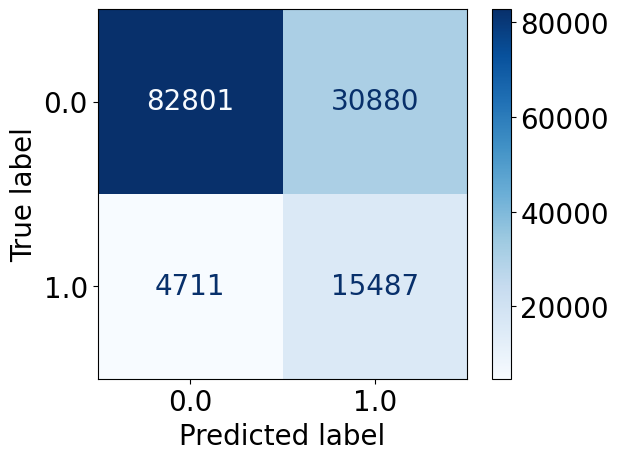

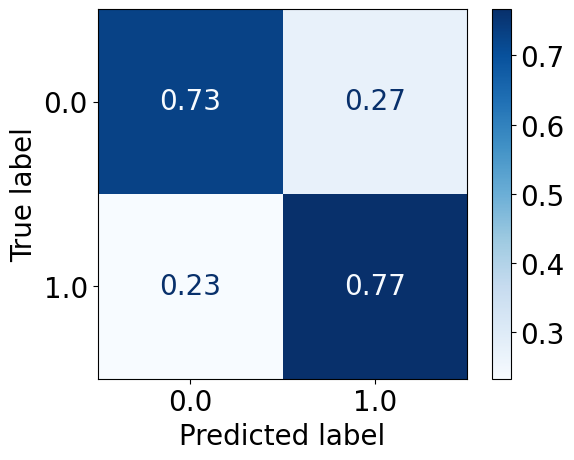

In [ ]:
lr_2019_17_15_balanced = LogisticRegression(solver='liblinear')
lr_2019_17_15_balanced.fit(X_train_2019_17_15_balanced, y_train_2019_17_15_balanced)

pred_prob_test_2019_17_15_lr_balanced = lr_2019_17_15_balanced.predict_proba(X_test_2019_17_15)[:, 1]
pred_test_2019_17_15_lr_balanced = lr_2019_17_15_balanced.predict(X_test_2019_17_15)

print("accuracy", accuracy_score(y_test_2019_17_15, pred_test_2019_17_15_lr_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019_17_15, pred_test_2019_17_15_lr_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019_17_15, pred_test_2019_17_15_lr_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019_17_15, pred_test_2019_17_15_lr_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019_17_15, pred_test_2019_17_15_lr_balanced, pred_prob_test_2019_17_15_lr_balanced)

Class 1 Recall: 0.7667590850579266
Class 1 Precision: 0.3340091013004939
Class 1 Area Under Precision-Recall Curve: 0.4484830457027431
Class 1 F1-Score: 0.4653196124089236
Class 0 Recall: 0.7283626991317811
Class 0 Precision: 0.946167382758936
Class 0 Area Under Precision-Recall Curve: 0.7176241609839873
Class 0 F1-Score: 0.8231002072636722
Overall Accuracy: 0.7341554687441645
Balanced Accuracy: 0.7475608920948538
Area Under ROC Curve: 0.8256623065417028
Matthews Correlation Coefficient: 0.3724533268417723
0.7667590850579266
0.3340091013004939
0.4484830457027431
0.4653196124089236
0.7283626991317811
0.946167382758936
0.7176241609839873
0.8231002072636722
0.7341554687441645
0.7475608920948538
0.8256623065417028
0.3724533268417723


### Test on 2021

accuracy 0.7378085340261816
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.83     33912
         1.0       0.34      0.76      0.47      6116

    accuracy                           0.74     40028
   macro avg       0.64      0.75      0.65     40028
weighted avg       0.85      0.74      0.77     40028



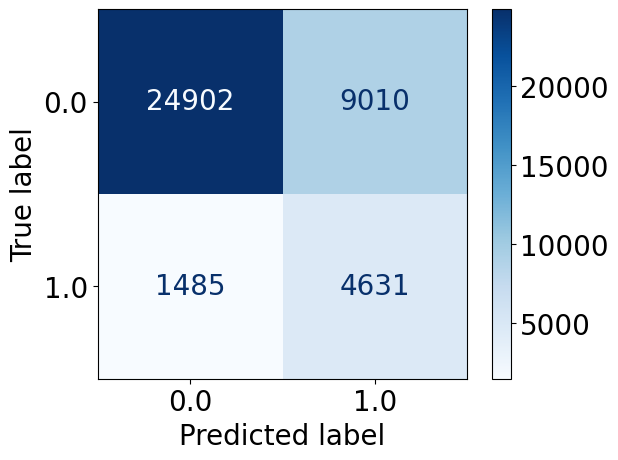

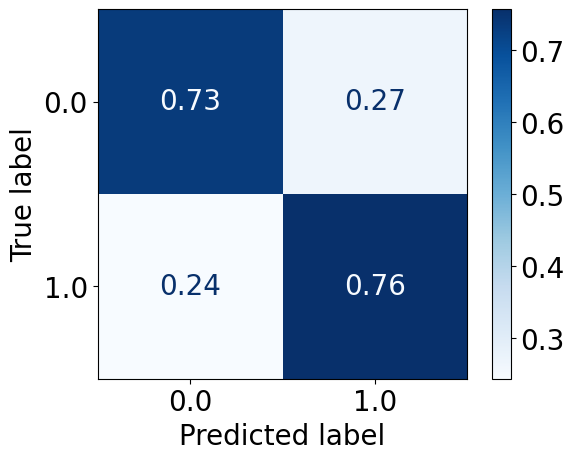

In [ ]:
lr_2019_17_15_balanced = LogisticRegression(solver='liblinear')
lr_2019_17_15_balanced.fit(X_train_2019_17_15_balanced, y_train_2019_17_15_balanced)

pred_prob_test_2021_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_2019_17_15_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr_2019_17_15_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019_17_15_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2021, pred_test_2021_lr_2019_17_15_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2021, pred_test_2021_lr_2019_17_15_balanced, pred_prob_test_2021_lr_2019_17_15_balanced)

Class 1 Recall: 0.7571942446043165
Class 1 Precision: 0.3394912396451873
Class 1 Area Under Precision-Recall Curve: 0.44655844506677805
Class 1 F1-Score: 0.46879586981829224
Class 0 Recall: 0.7343123378155225
Class 0 Precision: 0.9437222874900519
Class 0 Area Under Precision-Recall Curve: 0.7158844729793931
Class 0 F1-Score: 0.8259506791157398
Overall Accuracy: 0.7378085340261816
Balanced Accuracy: 0.7457532912099195
Area Under ROC Curve: 0.8227282365383509
Matthews Correlation Coefficient: 0.37309692147927165
0.7571942446043165
0.3394912396451873
0.44655844506677805
0.46879586981829224
0.7343123378155225
0.9437222874900519
0.7158844729793931
0.8259506791157398
0.7378085340261816
0.7457532912099195
0.8227282365383509
0.37309692147927165


### Test on 2019

accuracy 0.7292234736218138
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     35675
         1.0       0.34      0.77      0.47      6500

    accuracy                           0.73     42175
   macro avg       0.64      0.75      0.64     42175
weighted avg       0.85      0.73      0.76     42175



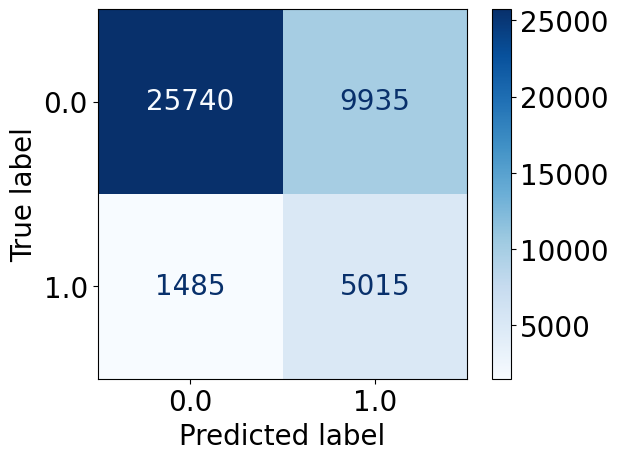

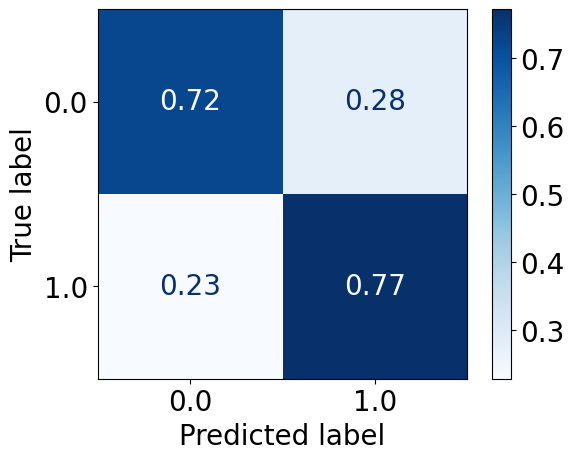

In [ ]:
lr_2019_17_15_balanced = LogisticRegression(solver='liblinear')
lr_2019_17_15_balanced.fit(X_train_2019_17_15_balanced, y_train_2019_17_15_balanced)

pred_prob_test_2019_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict_proba(X_test_2019)[:, 1]
pred_test_2019_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict(X_test_2019)

print("accuracy", accuracy_score(y_test_2019, pred_test_2019_lr_2019_17_15_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2019, pred_test_2019_lr_2019_17_15_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019_17_15_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2019, pred_test_2019_lr_2019_17_15_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2019, pred_test_2019_lr_2019_17_15_balanced, pred_prob_test_2019_lr_2019_17_15_balanced)

Class 1 Recall: 0.7715384615384615
Class 1 Precision: 0.3354515050167224
Class 1 Area Under Precision-Recall Curve: 0.4513413543143402
Class 1 F1-Score: 0.46759906759906755
Class 0 Recall: 0.7215136650315347
Class 0 Precision: 0.9454545454545454
Class 0 Area Under Precision-Recall Curve: 0.7136028182947657
Class 0 F1-Score: 0.8184419713831479
Overall Accuracy: 0.7292234736218138
Balanced Accuracy: 0.7465260632849982
Area Under ROC Curve: 0.8233700609131582
Matthews Correlation Coefficient: 0.3721576622229311
0.7715384615384615
0.3354515050167224
0.4513413543143402
0.46759906759906755
0.7215136650315347
0.9454545454545454
0.7136028182947657
0.8184419713831479
0.7292234736218138
0.7465260632849982
0.8233700609131582
0.3721576622229311


### Test on 2017

accuracy 0.740414899424684
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83     40340
         1.0       0.34      0.77      0.48      7286

    accuracy                           0.74     47626
   macro avg       0.65      0.75      0.65     47626
weighted avg       0.85      0.74      0.77     47626



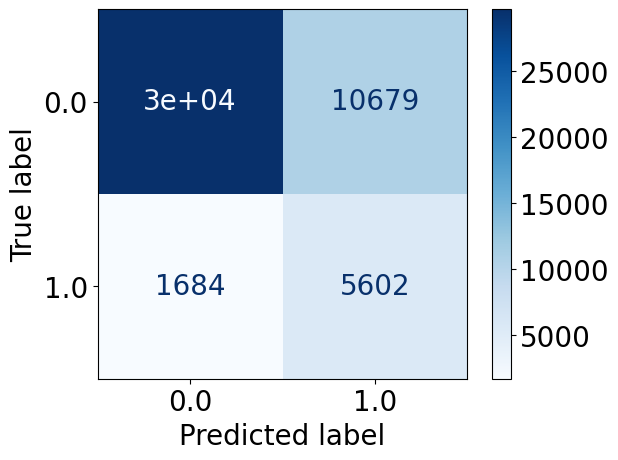

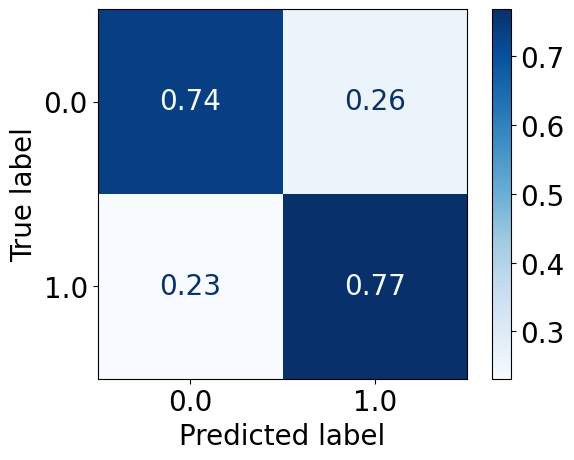

In [ ]:
lr_2019_17_15_balanced = LogisticRegression(solver='liblinear')
lr_2019_17_15_balanced.fit(X_train_2019_17_15_balanced, y_train_2019_17_15_balanced)

pred_prob_test_2017_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict_proba(X_test_2017)[:, 1]
pred_test_2017_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict(X_test_2017)

print("accuracy", accuracy_score(y_test_2017, pred_test_2017_lr_2019_17_15_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2017, pred_test_2017_lr_2019_17_15_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019_17_15_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2017, pred_test_2017_lr_2019_17_15_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2017, pred_test_2017_lr_2019_17_15_balanced, pred_prob_test_2017_lr_2019_17_15_balanced)

Class 1 Recall: 0.7688718089486687
Class 1 Precision: 0.3440820588415945
Class 1 Area Under Precision-Recall Curve: 0.4599139546748426
Class 1 F1-Score: 0.4754105316756481
Class 0 Recall: 0.7352751611303917
Class 0 Precision: 0.9462753230180252
Class 0 Area Under Precision-Recall Curve: 0.7128945108356023
Class 0 F1-Score: 0.8275371416614354
Overall Accuracy: 0.740414899424684
Balanced Accuracy: 0.7520734850395302
Area Under ROC Curve: 0.8293552821195518
Matthews Correlation Coefficient: 0.38260004483091214
0.7688718089486687
0.3440820588415945
0.4599139546748426
0.4754105316756481
0.7352751611303917
0.9462753230180252
0.7128945108356023
0.8275371416614354
0.740414899424684
0.7520734850395302
0.8293552821195518
0.38260004483091214


### Test on 2015

accuracy 0.7398702300467354
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83     37411
         1.0       0.34      0.76      0.47      6667

    accuracy                           0.74     44078
   macro avg       0.64      0.75      0.65     44078
weighted avg       0.85      0.74      0.77     44078



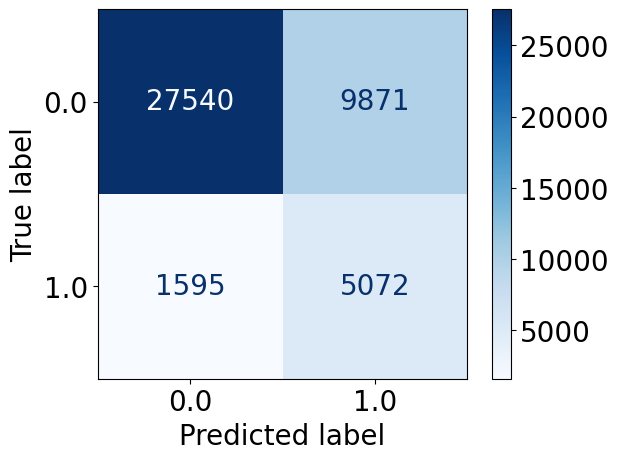

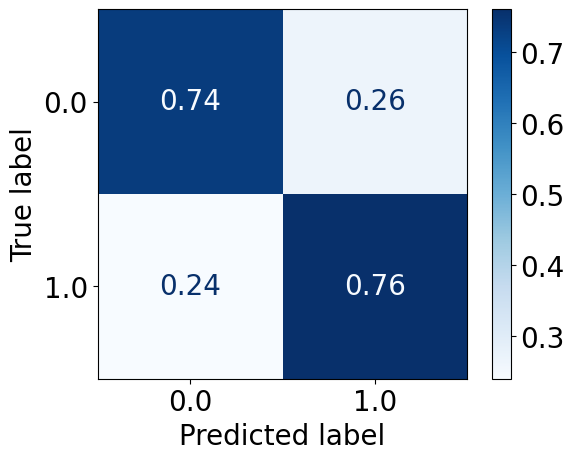

In [ ]:
lr_2019_17_15_balanced = LogisticRegression(solver='liblinear')
lr_2019_17_15_balanced.fit(X_train_2019_17_15_balanced, y_train_2019_17_15_balanced)

pred_prob_test_2015_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict_proba(X_test_2015)[:, 1]
pred_test_2015_lr_2019_17_15_balanced = lr_2019_17_15_balanced.predict(X_test_2015)

print("accuracy", accuracy_score(y_test_2015, pred_test_2015_lr_2019_17_15_balanced))

from sklearn.metrics import classification_report
print(classification_report(y_test_2015, pred_test_2015_lr_2019_17_15_balanced))

plt.rcParams['font.size'] = 20

ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_2019_17_15_balanced,cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_predictions(y_test_2015, pred_test_2015_lr_2019_17_15_balanced,cmap=plt.cm.Blues, normalize="true")

In [ ]:
performace_metrix(y_test_2015, pred_test_2015_lr_2019_17_15_balanced, pred_prob_test_2015_lr_2019_17_15_balanced)

Class 1 Recall: 0.7607619619019049
Class 1 Precision: 0.33942314127015993
Class 1 Area Under Precision-Recall Curve: 0.44894411653249755
Class 1 F1-Score: 0.4694123091161499
Class 0 Recall: 0.7361471225040763
Class 0 Precision: 0.9452548481208168
Class 0 Area Under Precision-Recall Curve: 0.7171804437486408
Class 0 F1-Score: 0.8276981336218556
Overall Accuracy: 0.7398702300467354
Balanced Accuracy: 0.7484545422029907
Area Under ROC Curve: 0.8253833946991805
Matthews Correlation Coefficient: 0.376110461246169
0.7607619619019049
0.33942314127015993
0.44894411653249755
0.4694123091161499
0.7361471225040763
0.9452548481208168
0.7171804437486408
0.8276981336218556
0.7398702300467354
0.7484545422029907
0.8253833946991805
0.376110461246169


# Feature Importance

## Train on 2021 (Imbalanced)

In [ ]:
lr_2021 = LogisticRegression(solver='liblinear')
lr_2021.fit(X_train_2021, y_train_2021)

pred_prob_test_2021_lr = lr_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr = lr_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr))

from sklearn.metrics import classification_report
print(classification_report(y_test_2021, pred_test_2021_lr))

accuracy 0.8558259218547017
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     33912
         1.0       0.58      0.21      0.30      6116

    accuracy                           0.86     40028
   macro avg       0.73      0.59      0.61     40028
weighted avg       0.83      0.86      0.83     40028



In [ ]:
feature_importance_2021 = {}
for feature, importance in zip(X_train_2021.columns.to_list(), lr_2021.coef_[0]):
    print(f"{feature}: {importance}")
    feature_importance_2021[feature] = importance

Blood pressure: 0.6744105674059406
Cholesterol: 0.5513133656892957
BMI category: 0.5365479573173915
Stroke: 0.10695381835179549
Heart disease: 0.26416091284564247
Consume fruits: -0.04101763175699941
Consume vegitables: 0.013694572687583046
Alcoholic: -0.4658873399660836
Health insurance: 0.004951482818959693
Unaffordable healthcare: 0.04681261454791388
General health: 0.46188247301965807
Mental health: -0.02361284712837076
Physical health: -0.03689754317246505
Difficulty walking: 0.07556521059907154
Sex: -0.29264849753091504
Age: 0.11142405405617538
Education: -0.010505609379131012
Income: -0.02893719877181773
Routine checkup: -0.4061371867757926
Flu shot: 0.18359811206616325
Kidney disease: 0.5960445949455168
Depressive disorder: 0.06837379768019358
Own home: -0.06403470704884792
Exercise: -0.19157711672991096
Difficulty seeing: 0.18414483762192208
Difficulty concentrating: -0.05458371365455407
Race_American Indian: -0.16252112996758486
Race_Asian: -0.22292645170830322
Race_Black: -0

In [ ]:
feature_importance_2021 = {}
for feature, importance in zip(X_train_2021.columns.to_list(), lr_2021.coef_[0]):
    print(feature)
for feature, importance in zip(X_train_2021.columns.to_list(), lr_2021.coef_[0]):
    print(importance)

Blood pressure
Cholesterol
BMI category
Stroke
Heart disease
Consume fruits
Consume vegitables
Alcoholic
Health insurance
Unaffordable healthcare
General health
Mental health
Physical health
Difficulty walking
Sex
Age
Education
Income
Routine checkup
Flu shot
Kidney disease
Depressive disorder
Own home
Exercise
Difficulty seeing
Difficulty concentrating
Race_American Indian
Race_Asian
Race_Black
Race_Hispanic
Race_Multiracial
Race_Native Hawaiian
Race_Other race
Race_White
Employment status_Employed
Employment status_Homemaker
Employment status_No work < 1 y
Employment status_No work > 1 y
Employment status_Retired
Employment status_Self-employed
Employment status_Student
Employment status_Unable to work
Marital status_Divorced
Marital status_Married
Marital status_Never married
Marital status_Separated
Marital status_Unmarried couple
Marital status_Widowed
0.6744105674059406
0.5513133656892957
0.5365479573173915
0.10695381835179549
0.26416091284564247
-0.04101763175699941
0.0136945726

## Train on balanced 2021 dataset

In [ ]:
lr_balanced_2021 = LogisticRegression(solver='liblinear')
lr_balanced_2021.fit(X_train_2021_balanced, y_train_2021_balanced)

pred_prob_test_2021_lr_balanced_2021 = lr_balanced_2021.predict_proba(X_test_2021)[:, 1]
pred_test_2021_lr_balanced_2021 = lr_balanced_2021.predict(X_test_2021)

print("accuracy", accuracy_score(y_test_2021, pred_test_2021_lr_balanced_2021))
print(classification_report(y_test_2021, pred_test_2021_lr_balanced_2021))

accuracy 0.7332367342859998
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     33912
         1.0       0.34      0.76      0.47      6116

    accuracy                           0.73     40028
   macro avg       0.64      0.75      0.64     40028
weighted avg       0.85      0.73      0.77     40028



In [ ]:
feature_importance_2021_balanced = {}
for feature, importance in zip(X_train_2021_balanced.columns.to_list(), lr_balanced_2021.coef_[0]):
    print(f"{feature}: {importance}")
    feature_importance_2021_balanced[feature] = importance

Blood pressure: 0.6664950711373897
Cholesterol: 0.5692297529655252
BMI category: 0.5458911394495213
Stroke: 0.14655838861873288
Heart disease: 0.275736385263974
Consume fruits: -0.03894198046401055
Consume vegitables: 0.04388333536831669
Alcoholic: -0.4753886662030416
Health insurance: -0.1114476645629351
Unaffordable healthcare: 0.061583524408414525
General health: 0.50198176877115
Mental health: -0.021745532013797142
Physical health: -0.027335450790229844
Difficulty walking: 0.0510617529017359
Sex: -0.31822811694830205
Age: 0.14436304038401188
Education: -0.01811435697710108
Income: -0.03420930233752063
Routine checkup: -0.40128942208149865
Flu shot: 0.17394515118227258
Kidney disease: 0.6356839188643623
Depressive disorder: 0.10314557877990767
Own home: -0.031583645055106434
Exercise: -0.20641779075342154
Difficulty seeing: 0.2380003430560299
Difficulty concentrating: -0.08448488003138449
Race_American Indian: -0.08971253651820757
Race_Asian: -0.06969315662850706
Race_Black: -0.1839

In [ ]:
feature_importance_2021_balanced = {}
for feature, importance in zip(X_train_2021_balanced.columns.to_list(), lr_balanced_2021.coef_[0]):
    print(feature)
for feature, importance in zip(X_train_2021_balanced.columns.to_list(), lr_balanced_2021.coef_[0]):
    print(importance)

Blood pressure
Cholesterol
BMI category
Stroke
Heart disease
Consume fruits
Consume vegitables
Alcoholic
Health insurance
Unaffordable healthcare
General health
Mental health
Physical health
Difficulty walking
Sex
Age
Education
Income
Routine checkup
Flu shot
Kidney disease
Depressive disorder
Own home
Exercise
Difficulty seeing
Difficulty concentrating
Race_American Indian
Race_Asian
Race_Black
Race_Hispanic
Race_Multiracial
Race_Native Hawaiian
Race_Other race
Race_White
Employment status_Employed
Employment status_Homemaker
Employment status_No work < 1 y
Employment status_No work > 1 y
Employment status_Retired
Employment status_Self-employed
Employment status_Student
Employment status_Unable to work
Marital status_Divorced
Marital status_Married
Marital status_Never married
Marital status_Separated
Marital status_Unmarried couple
Marital status_Widowed
0.6674699811480668
0.5554948765056231
0.5395281967370507
0.18377351472862777
0.251373825479409
-0.03746882534026504
-0.02542085581

In [ ]:

# Create a dataframe using the lists
feature_importance_2021_balanced_df = pd.DataFrame({'FI-2021-balanced': feature_importance_2021_balanced.values()}, index=feature_importance_2021_balanced.keys())

# Display the dataframe
feature_importance_2021_balanced_df


FI-2021-balanced
Blood pressure                            0.666495
Cholesterol                               0.569230
BMI category                              0.545891
Stroke                                    0.146558
Heart disease                             0.275736
Consume fruits                           -0.038942
Consume vegitables                        0.043883
Alcoholic                                -0.475389
Health insurance                         -0.111448
Unaffordable healthcare                   0.061584
General health                            0.501982
Mental health                            -0.021746
Physical health                          -0.027335
Difficulty walking                        0.051062
Sex                                      -0.318228
Age                                       0.144363
Education                                -0.018114
Income                                   -0.034209
Routine checkup                          -0.401289
Flu shot                                  0.173945
Kidney disease                            0.635684
Depressive disorder                       0.103146
Own home                                 -0.031584
Exercise                                 -0.206418
Difficulty seeing                         0.238000
Difficulty concentrating                 -0.084485
Race_American Indian                     -0.089713
Race_Asian                               -0.069693
Race_Black                               -0.183916
Race_Hispanic                            -0.310229
Race_Multiracial                         -0.475247
Race_Native Hawaiian                     -0.175257
Race_Other race                          -0.294313
Race_White                               -0.676168
Employment status_Employed               -0.214279
Employment status_Homemaker              -0.370929
Employment status_No work < 1 y          -0.263640
Employment status_No work > 1 y          -0.058078
Employment status_Retired                -0.322780
Employment status_Self-employed          -0.444348
Employment status_Student                -0.513751
Employment status_Unable to work         -0.086730
Marital status_Divorced                  -0.443019
Marital status_Married                   -0.394189
Marital status_Never married             -0.378748
Marital status_Separated                 -0.192264
Marital status_Unmarried couple          -0.309448
Marital status_Widowed                   -0.556867

In [ ]:

# Create a dataframe using the lists
feature_importance_2021_df = pd.DataFrame({'FI-2021-imbalanced': feature_importance_2021.values()}, index=feature_importance_2021.keys())

# Display the dataframe
feature_importance_2021_df


FI-2021-imbalanced
Blood pressure                              0.674411
Cholesterol                                 0.551313
BMI category                                0.536548
Stroke                                      0.106954
Heart disease                               0.264161
Consume fruits                             -0.041018
Consume vegitables                          0.013695
Alcoholic                                  -0.465887
Health insurance                            0.004951
Unaffordable healthcare                     0.046813
General health                              0.461882
Mental health                              -0.023613
Physical health                            -0.036898
Difficulty walking                          0.075565
Sex                                        -0.292648
Age                                         0.111424
Education                                  -0.010506
Income                                     -0.028937
Routine checkup                            -0.406137
Flu shot                                    0.183598
Kidney disease                              0.596045
Depressive disorder                         0.068374
Own home                                   -0.064035
Exercise                                   -0.191577
Difficulty seeing                           0.184145
Difficulty concentrating                   -0.054584
Race_American Indian                       -0.162521
Race_Asian                                 -0.222926
Race_Black                                 -0.377149
Race_Hispanic                              -0.392970
Race_Multiracial                           -0.627611
Race_Native Hawaiian                       -0.279353
Race_Other race                            -0.413555
Race_White                                 -0.803709
Employment status_Employed                 -0.390400
Employment status_Homemaker                -0.459279
Employment status_No work < 1 y            -0.384928
Employment status_No work > 1 y            -0.287575
Employment status_Retired                  -0.418221
Employment status_Self-employed            -0.575943
Employment status_Student                  -0.559344
Employment status_Unable to work           -0.204106
Marital status_Divorced                    -0.604380
Marital status_Married                     -0.558542
Marital status_Never married               -0.496462
Marital status_Separated                   -0.432163
Marital status_Unmarried couple            -0.499103
Marital status_Widowed                     -0.689144

In [ ]:
df = pd.concat([feature_importance_2021_balanced_df, feature_importance_2021_df], axis=1)
df

FI-2021-balanced  FI-2021-imbalanced
Blood pressure                            0.666495            0.674411
Cholesterol                               0.569230            0.551313
BMI category                              0.545891            0.536548
Stroke                                    0.146558            0.106954
Heart disease                             0.275736            0.264161
Consume fruits                           -0.038942           -0.041018
Consume vegitables                        0.043883            0.013695
Alcoholic                                -0.475389           -0.465887
Health insurance                         -0.111448            0.004951
Unaffordable healthcare                   0.061584            0.046813
General health                            0.501982            0.461882
Mental health                            -0.021746           -0.023613
Physical health                          -0.027335           -0.036898
Difficulty walking                        0.051062            0.075565
Sex                                      -0.318228           -0.292648
Age                                       0.144363            0.111424
Education                                -0.018114           -0.010506
Income                                   -0.034209           -0.028937
Routine checkup                          -0.401289           -0.406137
Flu shot                                  0.173945            0.183598
Kidney disease                            0.635684            0.596045
Depressive disorder                       0.103146            0.068374
Own home                                 -0.031584           -0.064035
Exercise                                 -0.206418           -0.191577
Difficulty seeing                         0.238000            0.184145
Difficulty concentrating                 -0.084485           -0.054584
Race_American Indian                     -0.089713           -0.162521
Race_Asian                               -0.069693           -0.222926
Race_Black                               -0.183916           -0.377149
Race_Hispanic                            -0.310229           -0.392970
Race_Multiracial                         -0.475247           -0.627611
Race_Native Hawaiian                     -0.175257           -0.279353
Race_Other race                          -0.294313           -0.413555
Race_White                               -0.676168           -0.803709
Employment status_Employed               -0.214279           -0.390400
Employment status_Homemaker              -0.370929           -0.459279
Employment status_No work < 1 y          -0.263640           -0.384928
Employment status_No work > 1 y          -0.058078           -0.287575
Employment status_Retired                -0.322780           -0.418221
Employment status_Self-employed          -0.444348           -0.575943
Employment status_Student                -0.513751           -0.559344
Employment status_Unable to work         -0.086730           -0.204106
Marital status_Divorced                  -0.443019           -0.604380
Marital status_Married                   -0.394189           -0.558542
Marital status_Never married             -0.378748           -0.496462
Marital status_Separated                 -0.192264           -0.432163
Marital status_Unmarried couple          -0.309448           -0.499103
Marital status_Widowed                   -0.556867           -0.689144

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['FI-2021-balanced'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['FI-2021-imbalanced'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['FI-2021-balanced'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['FI-2021-imbalanced'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['FI-2021-balanced', 'FI-2021-imbalanced']]], **{})
chart

<Axes: >

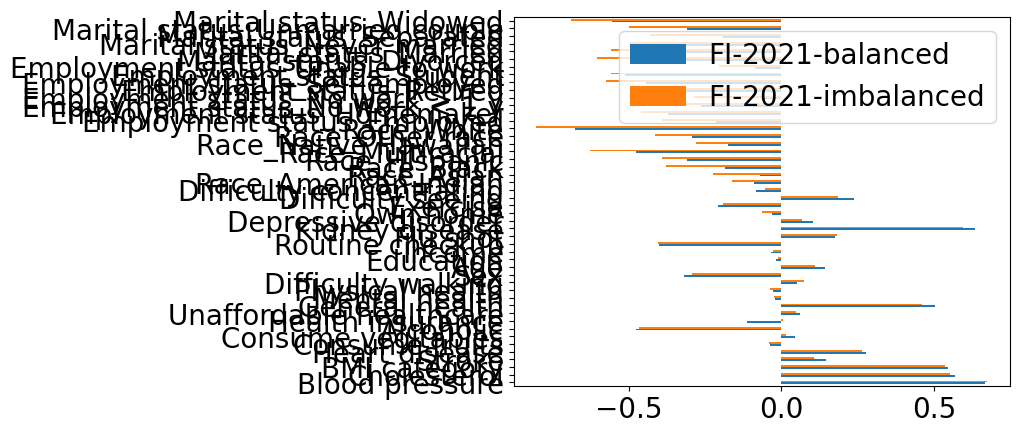

In [ ]:
df.plot.barh()

In [ ]:
feature_importance = pd.read_csv('../ML4H - Diabetes BRFSS 2021 - Feature Importance - LR.csv')
feature_importance

Features  LR - Balanced (undersampled) (2021)  \
0                     Blood pressure                             0.667470   
1                     Kidney disease                             0.607233   
2                        Cholesterol                             0.555495   
3                       BMI category                             0.539528   
4                     General health                             0.509590   
5                      Heart disease                             0.251374   
6                  Difficulty seeing                             0.233664   
7                           Flu shot                             0.204564   
8                             Stroke                             0.183774   
9                                Age                             0.139380   
10           Unaffordable healthcare                             0.111607   
11                Difficulty walking                             0.108282   
12               Depressive disorder                             0.059393   
13                         Education                            -0.021411   
14                     Mental health                            -0.025208   
15                Consume vegitables                            -0.025421   
16  Employment status_Unable to work                            -0.026988   
17                            Income                            -0.031397   
18                          Own home                            -0.034744   
19                    Consume fruits                            -0.037469   
20                   Physical health                            -0.039905   
21                        Race_Asian                            -0.041047   
22          Difficulty concentrating                            -0.042928   
23              Race_American Indian                            -0.080545   
24                  Health insurance                            -0.090516   
25          Marital status_Separated                            -0.174215   
26   Employment status_No work > 1 y                            -0.190171   
27        Employment status_Employed                            -0.192134   
28                        Race_Black                            -0.196235   
29              Race_Native Hawaiian                            -0.204921   
30                          Exercise                            -0.207009   
31                     Race_Hispanic                            -0.242172   
32   Employment status_No work < 1 y                            -0.255379   
33       Employment status_Homemaker                            -0.274425   
34         Employment status_Retired                            -0.294430   
35                               Sex                            -0.315919   
36                   Race_Other race                            -0.330249   
37      Marital status_Never married                            -0.358002   
38   Marital status_Unmarried couple                            -0.366816   
39            Marital status_Married                            -0.395179   
40                   Routine checkup                            -0.402950   
41           Marital status_Divorced                            -0.415603   
42   Employment status_Self-employed                            -0.432036   
43                         Alcoholic                            -0.460576   
44                  Race_Multiracial                            -0.507914   
45            Marital status_Widowed                            -0.546290   
46         Employment status_Student                            -0.590543   
47                        Race_White                            -0.653023   

    LR - Imbalanced (2021)  
0                 0.674411  
1                 0.596045  
2                 0.551313  
3                 0.536548  
4                 0.461882  
5                 0.264161  
6                 0.184145  
7                 0.18

In [ ]:
feature_importance.iloc[0]['LR - Balanced (undersampled) (2021)']

0.6674699811

In [ ]:
features_list = feature_importance['Features'].to_list()
features_list

In [ ]:
feature_imp_bal = {}
feature_imp_imbal = {}

for i in range(len(features_list)):
  f = features_list[i]
  if '_' in f:
    temp = f.split("_")[0]

    if temp in feature_imp_bal:
      feature_imp_bal[temp] += feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)']
      feature_imp_imbal[temp] += feature_importance.iloc[i]['LR - Imbalanced (2021)']
    else:
      feature_imp_bal[temp] = float(feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)'])
      feature_imp_imbal[temp] = float(feature_importance.iloc[i]['LR - Imbalanced (2021)'])
  else:
    temp = f
    if temp in feature_imp_bal:
      feature_imp_bal[temp] += feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)']
      feature_imp_imbal[temp] += feature_importance.iloc[i]['LR - Imbalanced (2021)']
    else:
      feature_imp_bal[temp] = float(feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)'])
      feature_imp_imbal[temp] = float(feature_importance.iloc[i]['LR - Imbalanced (2021)'])
feature_imp_bal, feature_imp_imbal

In [ ]:
feature_importance_2021_LR = pd.DataFrame({
    'features': feature_imp_bal.keys(),
    'Balanced - LR': feature_imp_bal.values(),
    'Imbalanced - LR': feature_imp_imbal.values(),
}
)

feature_importance_2021_LR

In [ ]:
df = feature_importance_2021_LR.copy()
df = df.sort_values('Balanced - LR', ascending=False)
df

In [ ]:
import seaborn as sns

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
y1 = y1 - 5.5
sns.barplot(x=x, y=y1, palette="deep")


In [ ]:
x = df['features']
y = df['Balanced - LR']

sns.barplot(x=x, y=y, palette="deep")
plt.xticks(rotation=45)


### Average Feature Importance - Balanced LR

In [ ]:
one_hot_feature_list = []

for i in range(len(features_list)):
  f = features_list[i]
  if '_' in f:
    temp = f.split("_")[0]
    one_hot_feature_list.append(temp)
one_hot_feature_list = set(one_hot_feature_list)
one_hot_feature_list

{'Employment status', 'Marital status', 'Race'}

In [ ]:
Employment_status_imp = 0
count = 0

for i in range(len(features_list)):
  f = features_list[i]
  if '_' in f:
    temp = f.split("_")[0]
    if temp == 'Employment status':
      Employment_status_imp += feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)']
      count += 1
Employment_status_imp/count

-0.28201314445625003

In [ ]:
Marital_status_imp = 0
count = 0

for i in range(len(features_list)):
  f = features_list[i]
  if '_' in f:
    temp = f.split("_")[0]
    if temp == 'Marital status':
      print(f, feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)'])
      Marital_status_imp += feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)']
      count += 1
Marital_status_imp/count

Marital status_Separated -0.1742148709
Marital status_Never married -0.3580021965
Marital status_Unmarried couple -0.3668157106
Marital status_Married -0.3951790954
Marital status_Divorced -0.4156031524
Marital status_Widowed -0.54629013


-0.3760175259666667

In [ ]:
Race = 0
count = 0

for i in range(len(features_list)):
  f = features_list[i]
  if '_' in f:
    temp = f.split("_")[0]
    if temp == 'Race':
      Race += feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)']
      count += 1
Race/count

-0.28201314445750003

In [ ]:
feature_imp_bal = {}
feature_imp_imbal = {}

for i in range(len(features_list)):
  f = features_list[i]
  if '_' not in f:
    temp = f
    if temp in feature_imp_bal:
      feature_imp_bal[temp] += feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)']
      feature_imp_imbal[temp] += feature_importance.iloc[i]['LR - Imbalanced (2021)']
    else:
      feature_imp_bal[temp] = float(feature_importance.iloc[i]['LR - Balanced (undersampled) (2021)'])
      feature_imp_imbal[temp] = float(feature_importance.iloc[i]['LR - Imbalanced (2021)'])
feature_imp_bal

{'Blood pressure': 0.6674699811,
 'Kidney disease': 0.6072330414,
 'Cholesterol': 0.5554948765,
 'BMI category': 0.5395281967,
 'General health': 0.5095895249,
 'Heart disease': 0.2513738255,
 'Difficulty seeing': 0.2336636953,
 'Flu shot': 0.2045639877,
 'Stroke': 0.1837735147,
 'Age': 0.1393799388,
 'Unaffordable healthcare': 0.1116065423,
 'Difficulty walking': 0.1082821069,
 'Depressive disorder': 0.05939270173,
 'Education': -0.02141075722,
 'Mental health': -0.02520830722,
 'Consume vegitables': -0.02542085581,
 'Income': -0.03139739171,
 'Own home': -0.03474384479,
 'Consume fruits': -0.03746882534,
 'Physical health': -0.03990484686,
 'Difficulty concentrating': -0.04292785136,
 'Health insurance': -0.09051612698,
 'Exercise': -0.2070094744,
 'Sex': -0.3159192483,
 'Routine checkup': -0.4029502566,
 'Alcoholic': -0.4605760278}

In [ ]:
feature_imp_bal['Race'] = -0.28201314445750003
feature_imp_bal['Marital status'] = -0.3760175259666667
feature_imp_bal['Employment status'] = -0.28201314445625003
feature_imp_bal

{'Blood pressure': 0.6674699811,
 'Kidney disease': 0.6072330414,
 'Cholesterol': 0.5554948765,
 'BMI category': 0.5395281967,
 'General health': 0.5095895249,
 'Heart disease': 0.2513738255,
 'Difficulty seeing': 0.2336636953,
 'Flu shot': 0.2045639877,
 'Stroke': 0.1837735147,
 'Age': 0.1393799388,
 'Unaffordable healthcare': 0.1116065423,
 'Difficulty walking': 0.1082821069,
 'Depressive disorder': 0.05939270173,
 'Education': -0.02141075722,
 'Mental health': -0.02520830722,
 'Consume vegitables': -0.02542085581,
 'Income': -0.03139739171,
 'Own home': -0.03474384479,
 'Consume fruits': -0.03746882534,
 'Physical health': -0.03990484686,
 'Difficulty concentrating': -0.04292785136,
 'Health insurance': -0.09051612698,
 'Exercise': -0.2070094744,
 'Sex': -0.3159192483,
 'Routine checkup': -0.4029502566,
 'Alcoholic': -0.4605760278,
 'Race': -0.28201314445750003,
 'Marital status': -0.3760175259666667,
 'Employment status': -0.28201314445625003}

In [ ]:
df = pd.DataFrame(
    {
        "features": feature_imp_bal.keys(),
        "Balanced - LR": feature_imp_bal.values()
    }
)
df

features  Balanced - LR
0             Blood pressure       0.667470
1             Kidney disease       0.607233
2                Cholesterol       0.555495
3               BMI category       0.539528
4             General health       0.509590
5              Heart disease       0.251374
6          Difficulty seeing       0.233664
7                   Flu shot       0.204564
8                     Stroke       0.183774
9                        Age       0.139380
10   Unaffordable healthcare       0.111607
11        Difficulty walking       0.108282
12       Depressive disorder       0.059393
13                 Education      -0.021411
14             Mental health      -0.025208
15        Consume vegitables      -0.025421
16                    Income      -0.031397
17                  Own home      -0.034744
18            Consume fruits      -0.037469
19           Physical health      -0.039905
20  Difficulty concentrating      -0.042928
21          Health insurance      -0.090516
22                  Exercise      -0.207009
23                       Sex      -0.315919
24           Routine checkup      -0.402950
25                 Alcoholic      -0.460576
26                      Race      -0.282013
27            Marital status      -0.376018
28         Employment status      -0.282013

In [ ]:
for i in df['features'].to_list():
  print(i)

Blood pressure
Kidney disease
Cholesterol
BMI category
General health
Heart disease
Difficulty seeing
Flu shot
Stroke
Age
Unaffordable healthcare
Difficulty walking
Depressive disorder
Education
Mental health
Consume vegitables
Income
Own home
Consume fruits
Physical health
Difficulty concentrating
Health insurance
Exercise
Sex
Routine checkup
Alcoholic
Race
Marital status
Employment status


In [ ]:
for i in df['Balanced - LR'].to_list():
  print(i)

0.6674699811
0.6072330414
0.5554948765
0.5395281967
0.5095895249
0.2513738255
0.2336636953
0.2045639877
0.1837735147
0.1393799388
0.1116065423
0.1082821069
0.05939270173
-0.02141075722
-0.02520830722
-0.02542085581
-0.03139739171
-0.03474384479
-0.03746882534
-0.03990484686
-0.04292785136
-0.09051612698
-0.2070094744
-0.3159192483
-0.4029502566
-0.4605760278
-0.28201314445750003
-0.3760175259666667
-0.28201314445625003


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Blood pressure'),
  Text(1, 0, 'Kidney disease'),
  Text(2, 0, 'Cholesterol'),
  Text(3, 0, 'BMI category'),
  Text(4, 0, 'General health'),
  Text(5, 0, 'Heart disease'),
  Text(6, 0, 'Difficulty seeing'),
  Text(7, 0, 'Flu shot'),
  Text(8, 0, 'Stroke'),
  Text(9, 0, 'Age'),
  Text(10, 0, 'Unaffordable healthcare'),
  Text(11, 0, 'Difficulty walking'),
  Text(12, 0, 'Depressive disorder'),
  Text(13, 0, 'Education'),
  Text(14, 0, 'Mental health'),
  Text(15, 0, 'Consume vegitables'),
  Text(16, 0, 'Income'),
  Text(17, 0, 'Own home'),
  Text(18, 0, 'Consume fruits'),
  Text(19, 0, 'Physical health'),
  Text(20, 0, 'Difficulty concentrating'),
  Text(21, 0, 'Health insurance'),
  Text(22, 0, 'Exercise'),
  Text(23, 0, 'Sex'),
  Text(24, 0, 'Routine checkup'),
  Text(25, 0, 'Alcoholic'),
  Text(26, 0, 'Race'),
  Text(27, 0, 'Marital status

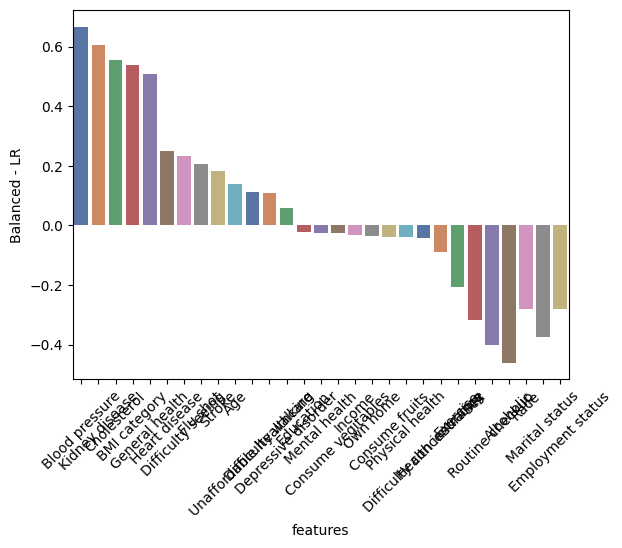

In [ ]:
x = df['features']
y = df['Balanced - LR']

sns.barplot(x=x, y=y, palette="deep")
plt.xticks(rotation=45)

# Temporary

In [5]:
c = 1
for i in range(1, 30, 5):
  print(i, "-", i+4, " days:", c)
  c+=1

1 - 5  days: 1
6 - 10  days: 2
11 - 15  days: 3
16 - 20  days: 4
21 - 25  days: 5
26 - 30  days: 6
